# ClusterAI 2020

# Ciencia de Datos - Ingeniería Industrial - UTN BA

# clase_08: Practica Text Mining / Sentiment Analysis: Movie reviews

### Elaborado por: Agustin Velazquez

# Cluster Clase 07: Text Mining con reseñas de películas

In [41]:
from sklearn.datasets import load_files
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

### 0.Importación del data set

La función <i> load_files </i> de Pandas permite importar archivos con el siguiente formato:
Carpeta con dos sub_carpetas: pos y neg. Estos datos tendrán sus etiquetas (Si el Review fue positivo o negativo).

Para que funcione, hay que decirle cuál es la carpeta madre.

#Descarga del dataset
https://ai.stanford.edu/~amaas/data/sentiment/

In [45]:
#del dataset original fueron removidos los comentarios que no eran ni positivos ni negativos

In [44]:
pwd

'C:\\Users\\avelazquez\\Documents\\ClusterAI\\Clase 07\\clase_07-master'

In [3]:
# leemos los datos de la carpeta train
data_tr = r"C:\Users\avelazquez\Documents\ClusterAI\Clase 07\clase_07-master\aclImdb\train"
revs_tr = load_files(data_tr)

In [4]:
# leemos los datos de la carpeta test
data_te = r"C:\Users\avelazquez\Documents\ClusterAI\Clase 07\clase_07-master\aclImdb\test"
revs_te = load_files(data_te)

In [5]:
#tipo de dato que obtenemos, se acceden como un diccionario
type(revs_tr)
#para extraer la infomarcion utilizamos revs_tr['target'] o revs_tr['data'] en cada caso

sklearn.utils.Bunch

Esta función nos devuelve un tipo de variable que es propio de sklearn. Como no podemos manipularla vamos a transformarla en un formato mas amigable.

In [6]:
# obtenemos las etiquetas y las features del set de entrenamiento
corpus_tr, label_tr = revs_tr.data, revs_tr.target

In [7]:
#nos fijamos los valores unicos de las labels
list(set(revs_tr.target))

[0, 1]

In [8]:
type(corpus_tr)

list

In [9]:
corpus_tr[0:3]

[b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.",
 b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many cli

In [10]:
type(label_tr)

numpy.ndarray

In [11]:
label_tr

array([1, 0, 1, ..., 0, 0, 0])

In [12]:
# obtenemos las etiquetas y las features del set de test
corpus_te, label_te = revs_te.data, revs_te.target

### 1. Wordcloud

Hasta ahora solo hemos dividido nuestro corpus de documentos aunque siguen estando en formato de texto. Necesitamos vectorizarlos para poder operar con algoritmos de machine learning.

Vamos a hacer un Word Cloud para observar de forma visual las palabras mas frecuentes 

In [13]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

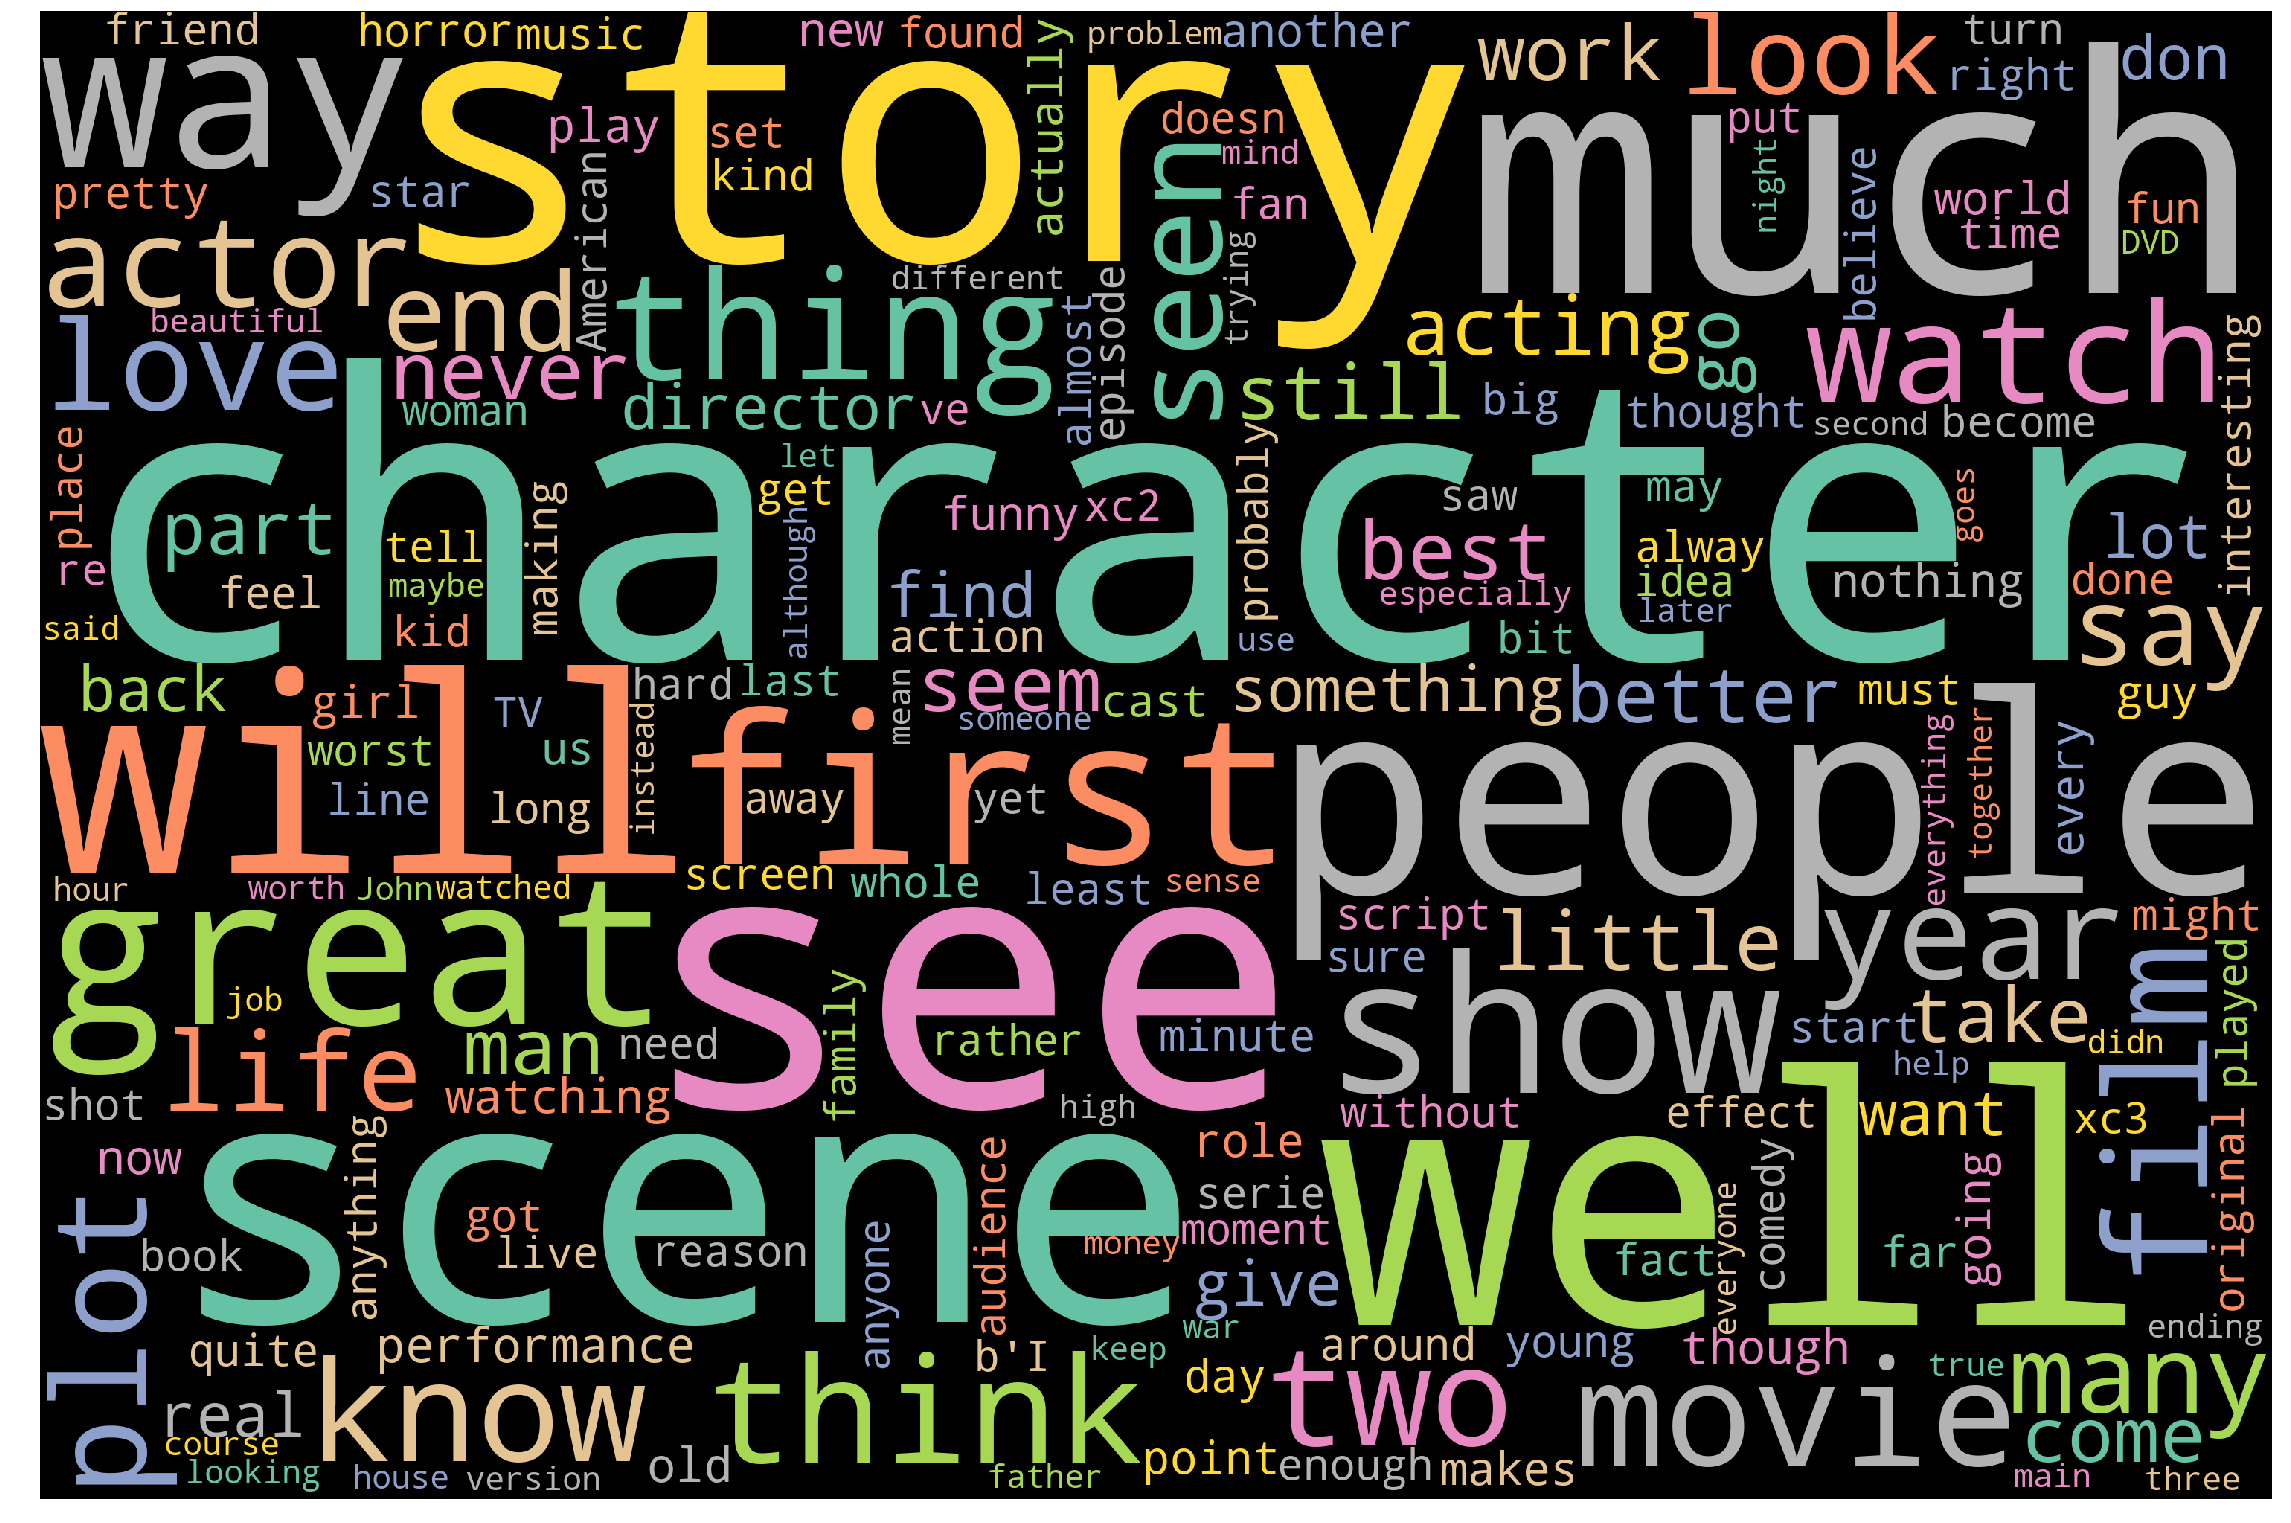

In [14]:
# Definimos una funcion para graficar el WordCloud
def plot_cloud(wordcloud):
    # Tamaño de la figura
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")# No axis details
    

listToStr = ' '.join([str(elem) for elem in corpus_tr])     

custom_stopwords = ['movie','film','br','make','made','really','even','one','time','good','bad']

STOPWORDS = STOPWORDS.update(custom_stopwords)

# Generamos el wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(listToStr)
# Plot
plot_cloud(wordcloud)

### 2. Pre procesamiento del texto

In [15]:
#Funcion de clean and preprocess texts
import re

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.decode('utf-8').lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

reviews_train_clean = preprocess_reviews(corpus_tr)
reviews_test_clean = preprocess_reviews(corpus_te)

In [16]:
#removemos stopwords
english_stop_words = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(' '.join([word for word in review.split() if word not in english_stop_words]))
    
    return removed_stop_words

no_stop_words_train = remove_stop_words(reviews_train_clean)
no_stop_words_test = remove_stop_words(reviews_test_clean)

In [17]:
#Lematization
def get_lemmatized_text(corpus):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

lemmatized_reviews_train = get_lemmatized_text(no_stop_words_train)
lemmatized_reviews_test = get_lemmatized_text(no_stop_words_test)

In [18]:
lemmatized_reviews_train[0]

'zero day lead think even think two boy young men would commit mutual suicide via slaughtering classmate capture must beyond bizarre mode two human decided withdraw common civility order define mutual world via coupled destruction perfect movie given money time filmmaker actor remarkable product term explaining motif action two young suicide murderer better elephant term film get rationalistic skin far far better film almost anything likely see flawed honest terrible honesty'

### 3. TF IDF vectorizer

Vamos a probar como podría funcionar un futuro modelo clasificador si vectorizamos el dataset de texto con TF IDF Vectorizer

In [19]:
# definimos el modelo TFIDF vectorizer
tfidfvec = TfidfVectorizer()

Transformamos "lemmatized_reviews" con "tfidfvec" para obtener una matriz numérica "xtrain". Tambien transformar "lemmatized_reviews" con el "tfidfvec" ya ajustado con los datos de train y así obtener "xtest" en formato numérico.

In [20]:
#fit transform para entrenar el modelo
tfidfvec.fit(reviews_train_clean)
X_train = tfidfvec.transform(lemmatized_reviews_train)
X_test = tfidfvec.transform(lemmatized_reviews_test)

In [21]:
X_train

<25000x92715 sparse matrix of type '<class 'numpy.float64'>'
	with 2472460 stored elements in Compressed Sparse Row format>

### 4. Clasificación de reviews positivas o negativas

Definimos como clasificador de Logistic Regression, entrenamos con "xtrain" para clasificar los datos de "xtest". Obtener el accuracy de la clasificación.

Para este caso Logistic Regression tiene la capacidad de entrenarse rapido y al ser un modelo lineal funciona relativamente bien en datos sparse

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train, label_tr, train_size = 0.75)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [23]:
for c in [0.01, 0.05, 0.25, 0.5, 1]: 
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print (c, accuracy_score(y_val, lr.predict(X_val)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.01 0.7976
0.05 0.83424
0.25 0.8656
0.5 0.8736
1 0.8832


In [24]:
final_model = LogisticRegression(C=1)
final_model.fit(X_train, y_train)
print(accuracy_score(label_te, final_model.predict(X_test)))

0.87688


In [25]:
final_model.coef_.shape

(1, 92715)

In [26]:
len(tfidfvec.get_feature_names())

92715

In [27]:
feature_results = {word: coef for word, coef in zip(tfidfvec.get_feature_names(),final_model.coef_[0] )}

In [28]:
#vemos las palabras mas influyentes para los comentarios positivos
for k, v in sorted(feature_results.items(), key=lambda item:item[1], reverse=True):
    print(k,v)

great 6.857935179185451
excellent 5.660108473235212
best 4.945387278627722
perfect 4.515909904977078
well 4.247761585080629
favorite 4.131086237070153
wonderful 4.105663028355316
love 3.8725792742844116
loved 3.8283292043520767
amazing 3.7745036178464417
fun 3.3791877878335916
today 3.3404150524979346
brilliant 3.2648863533650343
enjoyed 3.175461263090239
beautiful 3.0415273970997485
highly 2.914465529491082
also 2.8840006125815925
superb 2.8751748297474977
life 2.8051335948308362
still 2.7944087412757685
see 2.771480698797187
enjoy 2.7381075939118036
definitely 2.7051430526682827
rare 2.6847517085457206
classic 2.6453874556558783
performance 2.616310252000299
fantastic 2.6001409927797514
liked 2.551283573353063
enjoyable 2.5423305552442996
world 2.5072598197499665
true 2.430821612071082
good 2.366977655028582
bit 2.32102746787174
hilarious 2.3128913931645023
perfectly 2.299910881516839
heart 2.2962088159527934
unique 2.28443959666096
entertaining 2.2666241001260925
job 2.2541212309741

comfort 0.4317020995245164
trooper 0.43166521540376657
china 0.4316289336369924
breakdancing 0.4312369649858604
tire 0.4304094901657107
abhay 0.43006047129050096
outlook 0.42999047189215533
52 0.42980218340277293
mellisa 0.42936705422691407
muppets 0.42895769028550396
florida 0.42885781412747337
fawcett 0.42867751012961147
barbarian 0.42867291404085067
sir 0.4286605584428824
unseen 0.42846965601892356
gage 0.42839790541852035
sirk 0.4276741144346461
fridge 0.42752758580129224
empowerment 0.4271816048467998
shared 0.4269693639834586
yokai 0.4268168038097293
2005 0.4266923719682949
willing 0.4266608651913177
indie 0.4265662926778863
delightfully 0.42645304857963634
crazy 0.42616081845923814
glee 0.4259436415508592
hugo 0.42583965770124443
heartbreaking 0.4257646691933389
batwoman 0.4253112268443684
fortunately 0.4250718181685227
lupin 0.42496874950427216
unavailable 0.42492124881838444
round 0.42461196007094104
dumbland 0.424365216554651
easier 0.424289804959104
1996 0.4239997508918011
s

punishment 0.2806949167147039
concert 0.2805708173584291
sharply 0.28044913667916
conroy 0.2804416875796536
bsg 0.2804126623287303
longoria 0.28019977681445707
perception 0.28019743463424934
pakeezah 0.2801906775394449
massacre 0.27984461084171874
poisoning 0.2797601195007768
brisk 0.2796238207005146
youthful 0.2795905480666139
hlots 0.27951620982938585
viennese 0.27931217314360607
compare 0.2792729042794525
sci 0.2792667763699889
dennis 0.2791235271238459
implication 0.2789756451753569
loyal 0.27891241025143815
elam 0.27882107773959275
objection 0.27876991352653285
accustomed 0.27863165419448
accolade 0.2785321569563914
rukhs 0.2781051150806769
harlin 0.2780923229223758
tripod 0.2780631517857693
videostore 0.2780040854750474
continue 0.2779740369399007
golden 0.27784349065817415
1920 0.277722163362237
brown 0.2777031722394327
linger 0.2774007382850658
aware 0.2773465700736507
understands 0.27734532776689375
scorpion 0.27731845326971555
heroism 0.27724815571105793
smallville 0.27695764

diarrhea 0.20398940513327504
enabled 0.20385831031645152
berate 0.20384903198813667
laundering 0.20381922326254198
langs 0.20375005589925232
appologise 0.2037461316468406
madnes 0.2037461316468406
winfrey 0.2037157784524419
palsy 0.20367815075349774
qualm 0.20365446465969173
tank 0.20360719537584654
mandys 0.20356180218216438
undying 0.20354783237011878
enhances 0.20349573631356646
irani 0.2034370397271252
silva 0.2033748737482735
speechless 0.20327807703056333
longand 0.20320895529270436
polay 0.20320726440285994
aweigh 0.20317598878830972
disemboweled 0.20314910118774537
photograph 0.20296367247364186
allegory 0.20292802229489393
overnight 0.20285722966325911
movieit 0.2027960498834689
position 0.20277509166114852
underappreciated 0.20273666889193867
mere 0.20270165280730448
voicing 0.20267120295722085
richness 0.20266756908434067
burakov 0.20266692537510622
teenager 0.20262935510746072
blockbuster 0.20262817206614936
rosy 0.20261253029305845
samurai 0.20255292689004548
burgade 0.202

beek 0.17502363750831232
sends 0.17500255796693487
dub 0.17498320540761214
1928 0.17495768019448735
wes 0.174942292238325
usher 0.17494118037585127
miraculous 0.17491678673122094
unborn 0.17489451420563198
worldly 0.17489376670755835
undertone 0.17485032687707336
splashed 0.17480440695519878
blowup 0.17479596686660473
analyst 0.1746124473054992
agatha 0.174595234634676
tightening 0.17455985621807713
naval 0.17455840457454713
henderson 0.1745449971351157
magnum 0.17453154391347347
rabbit 0.1745274232061663
shogo 0.17437220305191026
busy 0.1743080610598907
7th 0.17429294837269185
spectrum 0.1742841100479211
madhvi 0.17426951650259503
became 0.174200241363263
imperial 0.17419823995551048
wistful 0.17418949752874052
mech 0.17414397709625998
voiced 0.17410770961573624
soppy 0.17399377931533633
cooky 0.17397410749269632
ebenezer 0.17391929930697791
unsurpassed 0.17391778941317365
abstraction 0.17383854788121783
excalibur 0.17380886682518049
freshest 0.17374125980631686
celeste 0.173739821970

rathbones 0.14058066204900413
overstatement 0.14056700831731886
spying 0.1405435824755942
whitey 0.14054008437763124
recite 0.14052910342107564
fitzgerald 0.14052764342912802
argentinian 0.1405126863891633
lynching 0.14050256785294774
lotus 0.1404997921467362
lingered 0.14045797874013397
trickery 0.14044623591162633
afterward 0.14042596302067104
trenholm 0.14042529143630036
shed 0.14042325995884622
choo 0.14041867367845223
crudeness 0.14036687575442894
doot 0.14035828670045317
farscape 0.14034686002049226
snatched 0.14029641016988284
suppress 0.1402624646888167
alta 0.14024112887349388
generated 0.1402380497870814
honorable 0.1402289279101719
vigos 0.14019676832937306
sogo 0.14018900075333407
joanne 0.14016327309243148
menial 0.14016108591675208
showcasing 0.14012779503707512
affectation 0.14011490302978769
countsthe 0.1401071078391635
eveningit 0.1401071078391635
lotthe 0.1401071078391635
movieive 0.1401071078391635
starsalso 0.1401071078391635
valuesit 0.1401071078391635
squire 0.140

border 0.12296348785971938
remy 0.1229254029594179
ethan 0.1229219024826207
rodder 0.12291466652712021
equipped 0.12291238228887469
ghillie 0.12288931383593006
apricot 0.1228725655031736
mandy 0.12282712510088155
psychiatry 0.12282505712864424
2017 0.12281897560801072
mumaris 0.12280693470665976
gianfranco 0.12280662108359644
exlusively 0.12280091394018829
speculation 0.12278945495280624
treating 0.12275632431185834
setback 0.12274469533835082
cgs 0.12273592067406407
maclean 0.12270571377849965
americanised 0.12270451623901502
2002 0.12270175947386089
nathaniel 0.12269569409078611
d2 0.12268874171757745
42 0.1226671352101107
fated 0.12265121614779406
daytime 0.12264991693316815
showerman 0.12264094192489115
costuming 0.12262338055229928
advantage 0.12254074940642089
intend 0.12252099400091411
appreciable 0.1225185534958259
adolescence 0.12245457591380192
coleen 0.12243262280229159
feckless 0.12243160174302842
actressthe 0.12242416444164707
eeeb 0.12242109701191671
compromised 0.1224013

heightens 0.10655641205498931
poise 0.10654612745103571
optional 0.10654420182206822
explodes 0.10654179246246617
videotaped 0.10654032656747246
eponymous 0.10652227109893055
gordone 0.1065156408075355
cantor 0.10650938650214202
giordano 0.1065047129045945
baumer 0.1064864217955744
sheehan 0.10645137801817739
voss 0.10644524677778511
cinematography 0.10644094743184804
michigan 0.10640944275060235
ager 0.10638702255279321
brutally 0.10635114954660221
pernell 0.10632823718813489
obsessiveness 0.10632184515882896
hypocrisy 0.10629524501635938
boundless 0.10628186991968956
ruthlessly 0.10628168105579504
culps 0.10624777558756375
approval 0.10619858709588964
périer 0.1061794752948838
advising 0.10617818152821865
czarist 0.10617681654434931
grigsbys 0.10615898986879847
balling 0.10615768192129539
everyman 0.10614674606339727
applauding 0.10613840539235565
clasic 0.10612554093248153
cranston 0.10612554093248153
lamonte 0.10612554093248153
pickier 0.10612554093248153
gaslight 0.106111661888588

fanshawe 0.09505337092172632
backed 0.0950390816484732
ugliness 0.09500734059263255
span 0.09500520952706923
mario 0.0950004511583164
brill 0.09499714145852338
anew 0.09499577973727369
manticore 0.0949837078295812
coolneß 0.09496817271824695
shortens 0.09495159256898233
seizes 0.09494165252341134
trifle 0.09494109752570203
peckinpaugh 0.09492199421002924
embezzlement 0.09488691111844168
danvers 0.09488071308076358
orcs 0.09487241660648207
thandie 0.09485393116920955
swapping 0.09484877549857185
anya 0.09484854860946329
tights 0.0948391983760012
faschist 0.09483785939820553
surpressors 0.09483785939820553
framework 0.09483608123631611
serlings 0.09483247767520321
renewal 0.09481058122201987
exchange 0.09478185572349257
complicit 0.09474709508701304
gullible 0.09474447591413342
characterless 0.09473023022158517
skateboard 0.09471982930004587
veteran 0.09470238914025701
superstardom 0.09468095572099473
silenced 0.09465890342610576
pres 0.09465775341144293
gaining 0.0946474026469941
capome

loomis 0.08477783436430214
pretender 0.08477513719911223
unsentimental 0.08476963250988871
hopetc 0.08476724632116535
huckaboring 0.08476724632116535
jerzee 0.08476724632116535
representin 0.08476724632116535
saint405s 0.08476724632116535
surprisedits 0.08476724632116535
yesbut 0.08476724632116535
marple 0.08473787337727964
regalbuto 0.08473396517815905
commitment 0.08473376346229801
annis 0.08472817828459114
detention 0.08471820130107625
greensleeves 0.0847116017429273
fallible 0.08470930073628603
gumption 0.08466115616597314
corin 0.08463555766677373
hawkes 0.08463055515006286
locke 0.08458508702274235
shoe 0.08458432626772983
trashed 0.08458258506646714
freeview 0.08458228277012679
pubes 0.08458228277012679
marblehead 0.08458162779751387
booklet 0.08457754815305715
funnyi 0.08457439743566524
deannas 0.08455771945472627
reed 0.08455256430655671
livin 0.08454740493677111
mourned 0.08452286139050762
puro 0.08451822828805577
scribe 0.08450400275881052
fex 0.08450286964819663
overemotes 

escher 0.07813411004105236
oknothing 0.07813094075515553
orkly 0.07810516513828249
makhmalbaf 0.0780982208571911
hanger 0.07808924912419257
undertaking 0.0780853408690836
impossibility 0.07808459758150901
bernal 0.07807527222493683
wields 0.07806312148163316
blended 0.07804269672272016
fume 0.0780322806624796
directness 0.07803000060473331
aboooot 0.07802919546435245
canadiansjazmine 0.07802919546435245
continuewhat 0.07802919546435245
headmuststop 0.07802919546435245
ooout 0.07802919546435245
singingdoodlebops 0.07802919546435245
songsnow 0.07802919546435245
founder 0.07802426587958129
evicting 0.07802393510202582
1910s 0.07801528754576431
healey 0.07799192879187623
kieslowski 0.07799123541679384
outbreaking 0.07799123541679384
psychoanalyzes 0.07799123541679384
remembereddogville 0.07799123541679384
brotherchris 0.07797657932529443
compound 0.0779734645236071
artur 0.07795331368183382
grown 0.07791298089531436
connely 0.07790211015085233
almodovar 0.07789001000412127
forthcoming 0.07

uccide 0.06924551734148787
tumbler 0.06924317879902568
fatally 0.06922737232736176
chocula 0.06922268182293831
posehn 0.0692120580043128
negotiate 0.06920942591762586
wyllie 0.06920593026266057
tovarish 0.06918311237003623
unstated 0.06918304543121893
summertime 0.06917869627482086
1931 0.0691712790536169
untypical 0.0691659768661927
recaptured 0.0691600349064143
aboutroy 0.06915372791471004
conspiraciesjfk 0.06915372791471004
fantasyif 0.06915372791471004
fewthe 0.06915372791471004
filmanyone 0.06915372791471004
historygod 0.06915372791471004
itinvestigate 0.06915372791471004
mcveighto 0.06915372791471004
mlkgwallace 0.06915372791471004
rfk 0.06915372791471004
shoulddont 0.06915372791471004
usbut 0.06915372791471004
paragon 0.06915062320993416
awaken 0.06914860655086659
registrar 0.06914541339190419
virtue 0.06910564376439375
camel 0.06909794212295955
suitcase 0.06908910060177584
auh 0.06908757595472238
overachieving 0.06908757595472238
jubilant 0.06908499177803411
loom 0.069081470779

delt 0.06420532313264972
evaluate 0.06419958577337158
dorian 0.0641865457828233
bandaur 0.06418645185199592
klause 0.06418645185199592
cloaked 0.06418094999711438
coholic 0.06416945264426147
levitt 0.06416733234938157
reid 0.0641642601560771
boltay 0.06415480871880518
kravitz 0.06415480871880518
snafuwell 0.06415480871880518
coozemans 0.06414720581863417
flockers 0.0641471821269276
chandelere 0.06413734569968725
disavows 0.06413734569968725
wether 0.06413734569968725
stuttgart 0.06412882159347065
archaeology 0.06412628603069961
herakles 0.06412296354404853
steakleys 0.06412296354404853
goodstephen 0.06411691189689678
henrydan 0.06411691189689678
mcintireversatile 0.06411691189689678
riflehas 0.06411691189689678
unearp 0.06411691189689678
justwow 0.06411610743809901
unsubdued 0.06411610743809901
cabal 0.06411020656266327
scriptsthe 0.06410431294779784
2k 0.06409030339194033
4k 0.06409030339194033
scarce 0.0640886805824307
choleric 0.06406885956166751
acquiescence 0.0640683289432842
kade

ulrike 0.05832643832036685
wormtong 0.05832643832036685
victorious 0.05832221194988814
trove 0.058316067656504406
onmyoji 0.058311303994116305
bischoff 0.058306196652674426
ponder 0.058305066988759466
henze 0.058288437488058197
bandes 0.05826664625772904
dessinées 0.05826664625772904
buenos 0.05826218046913055
rüdiger 0.05825208692305882
endeavoring 0.058252012697204904
lightheartedness 0.058248482162853346
calibans 0.058235848766514206
farman 0.058235848766514206
lieutentant 0.058235848766514206
huggable 0.05823295362414662
noltes 0.05821744727734088
conflictsso 0.05821132194717104
liveswhether 0.05821132194717104
misnomerit 0.05821132194717104
moodswhims 0.05821132194717104
relationshipssentiments 0.05821132194717104
resthong 0.05821132194717104
saluted 0.05821132194717104
titlekangwon 0.05821132194717104
warstroubles 0.05821132194717104
stronger 0.05818971093085294
knot 0.05818790683499468
envied 0.05818472548712541
constitutional 0.058172054053544434
unhellish 0.058170734007473336


rgb 0.055301783332887385
filmgoing 0.05530085787057643
lakei 0.055296606063082676
nonei 0.055296606063082676
digicorps 0.05529277212078491
digitech 0.05529267568104597
aniversy 0.055279489085787725
takeaway 0.055278861245336756
fishbone 0.055271774905174736
trainwrecks 0.055271774905174736
morgus 0.05526092779222054
coo 0.05523593513055716
echo 0.05523467118818992
corresponds 0.05522269420223668
assigns 0.05521669743298079
cunningly 0.055199845106873036
debasement 0.05519531104009438
synthetic 0.05518644007768283
rawest 0.05518524109958028
missi 0.05517464858551641
flyte 0.05516648890929253
toothy 0.055160941010952314
cathie 0.05515755965075073
finicky 0.05515705610019514
globalization 0.0551559106526793
batchler 0.05515096386077909
filmespecially 0.05515096386077909
_is_ 0.05514277443927956
marcie 0.055135731418209495
billiard 0.05512899101312765
vachon 0.05512295288942085
antecedent 0.05511651891338288
obliterate 0.055112106496312686
regroup 0.05510047793973364
wilke 0.05509995588422

arnald 0.05159920457857013
hillerman 0.05159920457857013
celaschi 0.05159025749733777
cremating 0.05159025749733777
horroryearbook 0.05159025749733777
myspacecom 0.05159025749733777
uncontaminated 0.05159025749733777
wwwhorroryearbookcom 0.05159025749733777
levenstein 0.051584107191223375
rubens 0.051582141040465816
southampton 0.051565620148396926
acedemy 0.05156108524187208
agrandizement 0.05155284359408513
stars 0.051549478489971226
skosh 0.05154369260427362
ducharme 0.051542630123403224
jutra 0.051542630123403224
lepage 0.051542630123403224
oreilles 0.051542630123403224
syvlie 0.051542630123403224
wwwarchambaultca 0.051542630123403224
bernarda 0.05153416451942744
doña 0.05153416451942744
schygula 0.051531024229746696
strolling 0.051525859128596786
daftardar 0.05152085863031586
renuka 0.05152085863031586
reluctant 0.05151930868666283
flown 0.051507644021679566
actorbut 0.0514983288857432
memento 0.051496287471202155
dramatist 0.051489055056116055
dixen 0.05148792997762182
mayalls 0.

initiating 0.048725916407711276
conference 0.048723293818687154
jrits 0.04872223013379502
melfis 0.048722170121721114
ernests 0.04871755910588254
wisbars 0.04870882144763166
1963the 0.04870504974758075
attentiontisserand 0.04870504974758075
audiencenot 0.04870504974758075
clouzots 0.04870504974758075
colleaguesone 0.04870504974758075
cynicalhaving 0.04870504974758075
effortwry 0.04870504974758075
entomologiststudying 0.04870504974758075
feu 0.04870504974758075
follet 0.04870504974758075
harels 0.04870504974758075
heroone 0.04870504974758075
herothe 0.04870504974758075
illusionsthe 0.04870504974758075
liveabsolutely 0.04870504974758075
maybebut 0.04870504974758075
noneestranged 0.04870504974758075
overone 0.04870504974758075
parisnow 0.04870504974758075
placenow 0.04870504974758075
preyall 0.04870504974758075
productionone 0.04870504974758075
racehe 0.04870504974758075
relationshipthe 0.04870504974758075
scientisthas 0.04870504974758075
townin 0.04870504974758075
yoshio 0.04869976206637

expressive 0.04527752808981664
joyfully 0.04527008907372641
downtime 0.04526968361694713
soooooo 0.04526945838146438
themthis 0.04526182923070277
oav 0.04525963202790698
rodrigo 0.04525923526595423
bungled 0.045257970213060425
chompers 0.045257970213060425
chowing 0.045257970213060425
nickelndime 0.045257970213060425
stalagmite 0.045257970213060425
stromberg 0.045257970213060425
bordens 0.045256267003060124
cinematographical 0.045233080580680735
escarole 0.04522794117484512
manicotti 0.04522794117484512
eraserhead 0.045221050798611086
torchon 0.045219864603127935
oui 0.045211025339562054
20perr 0.04520652511423816
20widow 0.04520652511423816
fastward 0.04520652511423816
war_widowhtml 0.04520652511423816
wwwjohntoppingcom 0.04520652511423816
skool 0.045204624949184424
thieving 0.04519427008126982
gravelly 0.04519210476668172
althe 0.04519116180876741
exelence 0.04519116180876741
honostly 0.04519116180876741
stinksbut 0.04519116180876741
theese 0.04519116180876741
jockey 0.04519072739058

tartntangy 0.04270445043968898
tatta 0.04270445043968898
theirrys 0.04270445043968898
viveca 0.04270445043968898
zandalees 0.04270445043968898
faheys 0.04270198274172112
quine 0.042698028142171426
brashears 0.04269711660736741
rebroadcast 0.042688707775659876
candleshoe 0.042683666866164593
169 0.04268004344053916
extrication 0.04267352688566163
stupidi 0.04267352688566163
surrealness 0.04267352688566163
batchelor 0.04266556957913573
pounce 0.04266168494873848
agamemnon 0.042660318454607354
10the 0.04265953797202183
actuallyi 0.04265953797202183
cutei 0.04265953797202183
himhes 0.04265953797202183
himseveral 0.04265953797202183
marins 0.04265953797202183
naivelearns 0.04265953797202183
otherwiseits 0.04265953797202183
parroti 0.04265953797202183
pauliewhos 0.04265953797202183
waspaulie 0.04265953797202183
cryer 0.04265246309016254
acutely 0.042652069878189564
indefatigable 0.04264869277016603
jessup 0.04264781261803722
recklessly 0.04264145225557332
anarchistic 0.04262695030021417
boin

guarantee 0.03952275231535663
revered 0.03952135264523551
nontheless 0.039515487043469896
stuntwoman 0.039515487043469896
barranco 0.03951528612179936
maruja 0.03951528612179936
feeb 0.03949924718314716
siodmaks 0.03949183884456665
martys 0.03949083905255133
anjis 0.03949054646914653
labeija 0.03949054646914653
wwwhowdoilooknycorg 0.03949054646914653
viscous 0.03948962564100133
costing 0.039478361123267955
multitask 0.03947754752514746
rho 0.03947023176820488
regimental 0.03946663439229896
tailoring 0.039444032442693504
pangborn 0.039440423581781306
oherlihy 0.039440225437037756
cranial 0.039436937998712465
millenial 0.03943677478452981
memorializing 0.03943551617003789
philadelphiathe 0.03943551617003789
infused 0.039425507062924706
carbon 0.03942538883673127
discriminatory 0.039421412934240146
nami 0.039421412934240146
rosswell 0.039421412934240146
errs 0.03942032823962337
thomsett 0.03940454817349981
toppled 0.039403526028398424
kleinman 0.03940274551897985
twentyish 0.0393938039929

onjanice 0.035615735335377326
whatsoeverthis 0.035615735335377326
phipps 0.035614537325350325
textual 0.035614537325350325
callahans 0.03561275756461899
dorleans 0.03561238617924531
sundae 0.0356115222848859
worf 0.03560774921082577
ardant 0.035599867187309106
welker 0.03559903631610372
armature 0.035597890329023635
synching 0.035591763774684954
renewed 0.035590104294015594
cuttingly 0.035583272880585076
reformatory 0.035583272880585076
pear 0.0355805748829702
correct 0.03557992819366419
californication 0.03556166593291798
muggy 0.03555654165512957
dirtier 0.03554909420106573
convulsed 0.035549081080402695
chomiak 0.03553982987177533
rectum 0.03553711691900208
beatbut 0.03553489637708507
itjim 0.03553489637708507
presentationoh 0.03553489637708507
supped 0.03553489637708507
surprisecharley 0.035534594153383066
jaguar 0.03553114567601029
tremell 0.03552814908135417
exemplify 0.03551616877811075
sobre 0.035515443431304916
beamed 0.03551472672728166
gardening 0.035503409913743636
yikes 0.

retentiveness 0.03276456003959837
deckard 0.03275773447123872
ilya 0.03275530704503427
2035 0.0327524728742703
retentively 0.0327524728742703
awaynot 0.03275061631485805
ensuesand 0.03275061631485805
reassembling 0.03275061631485805
superbespecial 0.03275061631485805
vexed 0.032750032958153485
impotency 0.0327489434867769
oconner 0.032745272694434384
patriarchy 0.03274222416872196
deville 0.03274147575251412
deepened 0.03273291130340424
threading 0.03272948024241641
shiftless 0.03270125921283463
enraging 0.03269407643741553
shakesperean 0.03269322017614654
tressa 0.03269320260147496
omelet 0.0326787378003127
approporiately 0.03267124802207343
cataloging 0.032662696288026156
dresdel 0.032662696288026156
iowa 0.03266121398890131
fixating 0.03265856323085339
rating9 0.03264468894316644
herersatisfaction 0.032644229236836936
interspecial 0.032644229236836936
seeingwelleverything 0.032644229236836936
nicholsons 0.03263513960544947
ayda 0.0326266835085537
farmani 0.0326266835085537
golnaz 0.

longevity 0.029653590422922083
elitism 0.02965312946377086
wreaks 0.029651197269170145
practicly 0.02964534310176414
houselessness 0.029639271606589645
disrupting 0.029638685132558858
clinique 0.02963537041995682
markie 0.02963537041995682
poulain 0.029634585071395103
poetically 0.029624752647393175
deadliest 0.029622532909164438
animatronic 0.029614071529069794
snls 0.029610291657074083
americana 0.029602185717172973
doorman 0.02959653052329152
grisbys 0.029595732501419662
commending 0.0295880625448688
sayeth 0.0295880625448688
frontyard 0.029583391884346718
greetednot 0.029583391884346718
louisthe 0.029583391884346718
extroverted 0.029579612915628134
cléo 0.02956759115798095
galli 0.02956759115798095
stavrosluigi 0.02956759115798095
alyce 0.029566106778387814
avuchella 0.02956410543046974
tosti 0.02956410543046974
occaisional 0.02956288743161053
ctomvelu 0.029559612717944387
lineage 0.029558881187953898
factvirgin 0.029543289002472266
famousby 0.029543289002472266
inspecially 0.02954

emmai 0.027785328872530136
kiya 0.027778711603857024
knightlety 0.027772622621180385
rheyes 0.027772622621180385
rhyes 0.027772622621180385
immaturity 0.027771550880486818
shampoo 0.027768439734628548
kitanos 0.027765613609716043
shinjukus 0.027765613609716043
sonatine 0.027765613609716043
invite 0.027762169361701956
chomet 0.02776020235708137
sylvain 0.02776020235708137
unenthusiastic 0.027746213751597585
neversoft 0.027745477289200862
storymode 0.027745477289200862
crazily 0.02774115192053276
somethin 0.02774107775272046
michalakis 0.027740030595613432
roadkorina 0.027740030595613432
unfaith 0.027740030595613432
pioneered 0.027738209761808765
1839 0.027733950032863986
jun 0.027732376566000555
brokenhearted 0.0277297243642223
vindicated 0.027717408468820405
centralized 0.02771476124922019
moviewith 0.027713453710960928
passe 0.027712833825133076
yak 0.027707060333118583
zoltan 0.02769836768812981
entertainingand 0.027698274669815712
apes 0.027698088969250738
appoach 0.0276936230409704

norbert 0.024714944810829743
reincarnate 0.024712858697454838
biosphere 0.024709425801925027
linclon 0.02470865054560209
nez 0.02470865054560209
perce 0.02470865054560209
yellowstone 0.02470865054560209
klingons 0.0247056648889141
spewed 0.024699808861635468
tink 0.024698602823467097
alchemy 0.024696525352252866
brownyet 0.024694899183143094
cluny 0.024694899183143094
itwhich 0.02469104224416812
scorecomposed 0.02469104224416812
versionbut 0.02469104224416812
inconsolable 0.024682223131718056
pane 0.02467933992267034
bluntness 0.02467444548603114
saturation 0.02467263438997101
absentee 0.024671639741586468
1948s 0.024668498230946082
1956s 0.024668498230946082
comradely 0.024668498230946082
andys 0.024665443474676974
defrost 0.024654707293332977
icewater 0.024654707293332977
cuddling 0.02465284594303744
kelvin 0.02465003694499868
showpiece 0.02464790752397375
farrels 0.024647492310025488
sysnuk3r 0.024647492310025488
unmindful 0.024645297048704086
onstage 0.024644275718144086
belenshe 0

furnishes 0.022263924963867046
pussed 0.022263924963867046
relevantly 0.022263924963867046
mosquito 0.022260626648469395
rediscovering 0.022259370803205475
brotherbriangoes 0.02225541844119571
fightwhat 0.02225541844119571
girlfriendsarahmichaels 0.02225541844119571
guywhat 0.02225541844119571
happybut 0.02225541844119571
hippyhis 0.02225541844119571
michaela 0.02225541844119571
poorfather 0.02225541844119571
proteststhe 0.02225541844119571
speakergravywhat 0.02225541844119571
surprisehe 0.02225541844119571
surprisemichaels 0.02225541844119571
votethe 0.02225541844119571
wavywoodstock 0.02225541844119571
artsthe 0.022248711987896734
fantasycomedyromancehorror 0.022248711987896734
fightsi 0.022248711987896734
tonguetruly 0.022248711987896734
footballer 0.02223666208067065
smarttech 0.022235829370773154
jonesing 0.02222991453270977
lordly 0.022227332640014415
zeus 0.022214350534745693
ahlstedt 0.022211173824573455
bjore 0.022211173824573455
celebre 0.022211173824573455
embodying 0.022211

jiggs 0.020608000204542665
aphoristic 0.020604655958005574
abbreviated 0.02060421955013483
pawing 0.020600076197531972
enlightens 0.020593131706356058
banu 0.02059081351798373
bsm 0.02059081351798373
nosher 0.02059081351798373
padarouski 0.02059081351798373
gaggle 0.02057603568297297
entacted 0.02057209538150979
rabbitbear 0.02057209538150979
randysampson 0.02057209538150979
unaccpectable 0.02057209538150979
wwwafrovideoorg 0.02057209538150979
shani 0.020571033206136492
kimmy 0.020570968039763066
narrowed 0.020565376608107058
seine 0.020564085621522444
nietszchean 0.020562851518893907
shyly 0.020562851518893907
alcott 0.020554901460909526
saruman 0.02055022224101203
ariana 0.02053730110103898
atreides 0.02053730110103898
flightsuit 0.02053730110103898
ghostbuster 0.02053730110103898
starfighter 0.02053730110103898
negligee 0.02053705690460263
landscaped 0.020534291714800302
customized 0.020528647292989817
wished 0.020521861929240003
actionthere 0.020520137981028832
himalayan 0.02051759

viability 0.01869048968020841
kashue 0.018678554024862012
shiris 0.018678554024862012
pj 0.018675412659199215
cam 0.018673739671413413
underdone 0.01867314582482099
pasqualino 0.018671311200454375
bouyant 0.01867023595650903
gwynnes 0.018666008624531757
t4 0.01866572928785965
aguila 0.018659578698646446
goldust 0.018659578698646446
mero 0.018659578698646446
deboo 0.01865944805673173
hirjeesaurabh 0.01865944805673173
kurush 0.01865944805673173
razdanmrsnoble 0.01865944805673173
tehmul 0.01865944805673173
akinmira 0.018655887248466493
athensgreece 0.018655887248466493
bloomethan 0.018655887248466493
caancloris 0.018655887248466493
castfeaturing 0.018655887248466493
englishbut 0.018655887248466493
flyand 0.018655887248466493
hawkiand 0.018655887248466493
kapuretcand 0.018655887248466493
knownanthology 0.018655887248466493
labeoufchristina 0.018655887248466493
leachmaneli 0.018655887248466493
nairnatalie 0.018655887248466493
parisdeals 0.018655887248466493
portmanshakher 0.0186558872484664

criedi 0.016382270902344818
snyder 0.016380401120419757
madhuri 0.016379361438946798
allyou 0.01637868130991531
andlike 0.01637868130991531
dinthey 0.01637868130991531
epicsis 0.01637868130991531
quadrilateral 0.0163779361501768
unambiguously 0.0163779361501768
raunchiness 0.01637508044682055
mcgiver 0.01637415198454994
charishma 0.01637409248720521
duguay 0.01637409248720521
apallonia 0.0163740382914292
appallonia 0.0163740382914292
mixture 0.01636672667229593
jefferey 0.016363874824207914
mixer 0.01635792041773469
cinematographe 0.016356472621868266
galles 0.016356472621868266
venerate 0.016356472621868266
rehibilitation 0.016355706935915933
astronomical 0.016354431388943578
grabovsky 0.016350504356152155
amazinggood 0.01634660130073748
tressas 0.01634660130073748
willam 0.016343805226539027
spellbut 0.01633789113635506
hensema 0.01633741535983703
huêt 0.01633741535983703
wagter 0.01633741535983703
1987all 0.01632965658355903
antoniettesophia 0.01632965658355903
fascistjohn 0.0163296

sympatheticall 0.015300081997584782
hanzô 0.015295062806131987
zipper 0.015294142940782608
klendathu 0.015293459908459496
exerted 0.015291486432092972
thr 0.015288352600868313
alligatorspaul 0.015284842241489427
armstrongtanny 0.015284842241489427
authorlittlehammer16787 0.015284842241489427
baddieis 0.015284842241489427
brownhis 0.015284842241489427
castrationbut 0.015284842241489427
connerylaurence 0.015284842241489427
convoked 0.015284842241489427
daughternow 0.015284842241489427
detestssullivan 0.015284842241489427
discriminationthat 0.015284842241489427
earlconfessing 0.015284842241489427
flordia 0.015284842241489427
focusarmstrong 0.015284842241489427
girlwhen 0.015284842241489427
goodvirtuous 0.015284842241489427
grandmotherthe 0.015284842241489427
hazed 0.015284842241489427
herolaurence 0.015284842241489427
himwhen 0.015284842241489427
infamouspsychotic 0.015284842241489427
introducedhe 0.015284842241489427
lawmensentenced 0.015284842241489427
liberalthough 0.015284842241489427

unrushed 0.013651609325347796
hyenasthere 0.013651330110808692
iisimbas 0.013651330110808692
characterises 0.01364775303228518
daker 0.01364775303228518
drablows 0.01364775303228518
holman 0.01364775303228518
ryall 0.01364775303228518
shets 0.013646630215028972
unfurls 0.013646630215028972
wirework 0.013645130589831194
musicthere 0.013643412092279622
undercurrentsjust 0.013639707220666595
bootroman 0.013638162441115036
forecaster 0.013638162441115036
rocksstone 0.013638162441115036
moviethen 0.013637369982148073
lucinennes 0.01363563971259782
nai 0.01363563971259782
quun 0.01363563971259782
grabber 0.013632428255410136
schizophrenia 0.013630833875118608
overstated 0.013627602116146609
finneys 0.01362724771286756
culpable 0.013625274374966072
itchys 0.013620937443613803
geare 0.013618054829781318
iwai 0.013618054829781318
seamlessness 0.013618054829781318
shunji 0.013618054829781318
contention 0.013616474704723405
converting 0.013613629587273614
sandells 0.013611492817680678
wunderbar 0

hercolmans 0.01269089133514494
krolls 0.01269089133514494
lasker 0.01269089133514494
laskers 0.01269089133514494
nightso 0.01269089133514494
othellowhen 0.01269089133514494
stagetwo 0.01269089133514494
teal 0.01268777009182785
warranted 0.012686068630366323
hooded 0.012684020564287581
burgeoning 0.012683369957002628
frost9 0.012681919330083412
fresco 0.0126805914244138
mentalist 0.012676508441622294
manoeuvers 0.012675477991774434
rêve 0.012675477991774434
chakotay 0.012671889990027259
actedblah 0.012665513250563361
childrendid 0.012665513250563361
lukasdear 0.012665513250563361
epigrammatic 0.012661831967923408
fantastico 0.012655613190403807
50 0.012654062103193657
benign 0.012652429516747107
curate 0.012651526234345426
rescore 0.012651359858790337
teenage 0.012649903024417545
dutched 0.01263201695815977
mindel 0.01263201695815977
delaying 0.012631113616405138
manfredi 0.01263092393949368
birdszizek 0.012626227079819587
cinmeamostly 0.012626227079819587
dentatta 0.012626227079819587


kingsleys 0.011059792074645339
stillborn 0.011058447122375019
chemistryalso 0.011057852468488425
edelmanroydavid 0.011057852468488425
fieldermurray 0.011057852468488425
friendshipwith 0.011057852468488425
hainesafter 0.011057852468488425
happenedfelix 0.011057852468488425
joyshighslows 0.011057852468488425
lemmonand 0.011057852468488425
matthauwho 0.011057852468488425
policemanherbert 0.011057852468488425
sheinerand 0.011057852468488425
speedlarry 0.011057852468488425
telegramshe 0.011057852468488425
ungerjack 0.011057852468488425
vinniejohn 0.011057852468488425
halflovely 0.011057638403616805
workbut 0.011057638403616805
sporadic 0.011053747802026968
everlastingly 0.011052585690645452
passworthys 0.011052585690645452
rebuilder 0.011052585690645452
theotocopulos 0.011052585690645452
credits 0.011050956751233229
iron 0.011049713674146894
ranier 0.011047652842489214
malleable 0.011046606811183425
consiglieri 0.011046499643978337
greying 0.011046499643978337
movieon 0.011045454211111968
c

connellys 0.009773613443556615
msmoss 0.009773613443556615
tarman 0.009773613443556615
presume 0.009772986833496679
publishing 0.00977199922527711
coulais 0.009763156251357624
cyncial 0.009758582118334922
unkillable 0.009758582118334922
beingwell 0.009758278728976536
counterattack 0.009758278728976536
leaderleading 0.009758278728976536
pgwodehouse 0.009758278728976536
pinfold 0.009758278728976536
prouder 0.009758278728976536
psmith 0.009758278728976536
romfords 0.009758278728976536
uckridge 0.009758278728976536
carrel 0.009755571741743805
gaspard 0.009752812366474597
geroge 0.00974734888043997
boardwalk 0.009739563180399992
hummel 0.009731404906594672
duchy 0.009729459124161888
titfield 0.009729459124161888
unpopularity 0.009729459124161888
viscously 0.009728395032366161
kleptomaniac 0.009723270821361542
strada 0.009720540794140769
revelatory 0.009714457830714097
appelonia 0.009704053518497764
musicprince 0.009704053518497764
linklaterss 0.009703964690550916
acropolis 0.009699104854569

bobbie 0.008097645867613
presides 0.008090710939050118
_the_ 0.00808864429958134
exported 0.00808864429958134
grap 0.00808864429958134
includingas 0.00808864429958134
mishima 0.00808864429958134
multilayered 0.00808864429958134
seascape 0.00808864429958134
shinbei 0.00808864429958134
ultranationalist 0.00808864429958134
yukio 0.00808864429958134
infact 0.008067917641223818
imbecile 0.008065975561202433
confides 0.00805982240370985
hf 0.00805408750710815
prettiest 0.008049293974648541
disproportionately 0.008041112566449066
fickleness 0.008036091191424873
flinging 0.008036091191424873
inconstancy 0.008036091191424873
woodcraft 0.008036091191424873
pepe 0.00803439797583503
indianvalues 0.008032660449981422
invigorates 0.008032660449981422
calamari 0.008028500911752676
dagobah 0.008028500911752676
378 0.008022621898036228
kalser 0.008022621898036228
loyally 0.008022621898036228
runmanian 0.008022621898036228
insincere 0.008021562196640398
angering 0.00801892318076782
xizao 0.0080160514362

triedntrue 0.0068954097462257625
updyke 0.0068954097462257625
majulie 0.006893355499739272
meercats 0.006893355499739272
sydows 0.006889184371353374
grits 0.006886901530791237
jaques 0.006868382082041369
bie 0.006860138723216474
lexington 0.006847508717803607
pint 0.006846423899140921
muchit 0.006846123598793392
hindi 0.006839870847946028
suo 0.006830312175354
hoisting 0.006830015724521032
oconors 0.006830015724521032
soto 0.006824378618458346
frankin 0.00682350679496103
timescapturing 0.00682350679496103
deterred 0.00681617898015663
shamefully 0.0068131234537053805
64and 0.006796080721900041
againthe 0.006796080721900041
ageid 0.006796080721900041
alliancesi 0.006796080721900041
baywhich 0.006796080721900041
bowserare 0.006796080721900041
castleeach 0.006796080721900041
castlewhere 0.006796080721900041
challnges 0.006796080721900041
charactersmario 0.006796080721900041
colorsgreat 0.006796080721900041
effectsi 0.006796080721900041
gamegrowing 0.006796080721900041
gamerand 0.0067960807

outweighs 0.004641741226487931
brotherwho 0.004640463880973815
filmvery 0.0046387216061099315
fuchs 0.004633827335037213
christover 0.0046332652024583445
gagnon 0.004632418617527659
courseromanticism 0.004628513131478347
queensbury 0.004628513131478347
pleasants 0.0046271631612326575
presumption 0.004618604942388368
andhis 0.00461825184714786
christenssen 0.00461825184714786
classicism 0.00461825184714786
appollonia 0.004612008564791676
sexshooter 0.004612008564791676
marton 0.004605298216663468
darby 0.004600572470474526
cenas 0.004597279384291098
quickness 0.004597279384291098
sprawl 0.004597279384291098
barrier 0.004588563242855823
structuralist 0.00457796995856992
berridi 0.00457359281123122
bingen 0.00457359281123122
galicia 0.00457359281123122
lucina 0.00457359281123122
mendizábal 0.00457359281123122
roldán 0.00457359281123122
sardà 0.00457359281123122
álvaro 0.00457359281123122
ángel 0.00457359281123122
amusingand 0.004572874611852906
collinshogiempho 0.004572874611852906
dicker

impaler 0.0033275904814656396
wilkerson 0.0033256661507513473
quixote 0.0033201677329073942
unspeakable 0.003318597527490967
ua 0.003318159084440669
fitzsimmons 0.0033146047586915315
keenly 0.0033133791710039367
gualtieri 0.0033086864968616277
tron 0.003303663611261825
undressed 0.003301096380297358
dtv 0.003299509203453968
encapsulation 0.0032965195501940435
encumbering 0.0032965195501940435
eshkeris 0.0032965195501940435
vallées 0.0032965195501940435
roth 0.0032935537686407577
fictionalizing 0.0032931426035330722
civilisation 0.003287506919787145
reworked 0.003287305247580294
restructuring 0.0032820416622516796
kundrys 0.0032749817410151604
145 0.003271643971941778
subconsciousness 0.003270457622716556
halsey 0.0032670658711520867
downing 0.0032665957114136803
brosans 0.0032650690713802457
extirpate 0.003264950517090995
irrefutably 0.003264950517090995
lundegaard 0.003264950517090995
dought 0.0032553761527656573
dvid 0.0032553761527656573
infests 0.003234805711455753
databanks 0.0032

madgemarilyn 0.0002389257048738004
pleading 0.00023560944282869509
hocus 0.00022810762672687183
pocus 0.00022810762672687183
rout 0.00021196471708454325
tpm 0.00021167215845762155
stix 0.00020629156383226584
sawing 0.00020444125327898533
350 0.00019875474781239343
clausens 0.00018269473794272853
klaras 0.00018178746792866957
creamed 0.0001767315664515755
darned 0.00017060170770462091
nra 0.00017043041529166882
trapper 0.00016247215051400283
rafiki 0.00015797981004470477
yipee 0.00015191870476897974
larceny 0.00014571427513826189
fer 0.00013282138777263674
infringement 0.00011485828199643742
leery 0.00011402116835587653
picchu 0.00011366687279673403
hernyree 0.00011121542448146274
wellchristopher 0.00011121542448146274
golmaal 0.00010700469814805144
applicability 9.925343492527903e-05
connectedness 9.532615555164183e-05
accompanying 9.487077281782478e-05
welfare 9.083562507789528e-05
rebounded 8.364444248725681e-05
wah 8.207597868381182e-05
enticement 8.176077817678354e-05
instigation 7

antibodies 0.0
anticompetitive 0.0
antics 0.0
antidepressants 0.0
antidotes 0.0
antiheroes 0.0
antionioni 0.0
antionionis 0.0
antipodes 0.0
antiques 0.0
antiquities 0.0
antisemitic 0.0
antlers 0.0
antoni 0.0
antonyms 0.0
antowne 0.0
antrax 0.0
ants 0.0
antònia 0.0
anually 0.0
anulka 0.0
anuses 0.0
anwers 0.0
anxieties 0.0
anybodies 0.0
anybodyhe 0.0
anybodythey 0.0
anynomous 0.0
anywayand 0.0
anywaybut 0.0
anywayhe 0.0
anywayhere 0.0
anywayto 0.0
apaches 0.0
apartheids 0.0
apartheidthough 0.0
apartments 0.0
apatows 0.0
apcs 0.0
apel 0.0
aphrodesiacs 0.0
apidistra 0.0
apocalypseseriously 0.0
apollonian 0.0
apologies 0.0
apologises 0.0
apologists 0.0
apostles 0.0
appaerantly 0.0
appalachia 0.0
appalachians 0.0
appall 0.0
appaloosa 0.0
apparitions 0.0
appeals 0.0
appearances 0.0
appearences 0.0
appelation 0.0
appellation 0.0
appendages 0.0
apperance 0.0
appereantly 0.0
appetites 0.0
appetizers 0.0
appetizing 0.0
applauses 0.0
apple_ 0.0
applebloom 0.0
applebythe 0.0
appleit 0.0
apples 0.0

bindings 0.0
binds 0.0
bingleys 0.0
bingross 0.0
bins 0.0
biochemistry 0.0
biographers 0.0
biographys 0.0
biospheres 0.0
bioweapons 0.0
bipeds 0.0
bippity 0.0
birdman 0.0
birds 0.0
birnley 0.0
birnleys 0.0
biros 0.0
birthdays 0.0
birthdaysee 0.0
births 0.0
birtwhistle 0.0
bis 0.0
biscuits 0.0
bishops 0.0
bismarck 0.0
bismark 0.0
bitches 0.0
bites 0.0
bitsoo 0.0
bitthe 0.0
bitzers 0.0
bizare 0.0
bizets 0.0
bjdont 0.0
bjs 0.0
blacheres 0.0
blackbuster 0.0
blackenstein 0.0
blackfriars 0.0
blackhat 0.0
blackhawk 0.0
blackhawks 0.0
blackmailers 0.0
blackmails 0.0
blackouts 0.0
blacks 0.0
blacksmiths 0.0
blacksnake 0.0
blackthank 0.0
blackwoods 0.0
bladck 0.0
bladders 0.0
blades 0.0
blag 0.0
blahblah 0.0
blahit 0.0
blahwhen 0.0
blains 0.0
blairs 0.0
blakes 0.0
blames 0.0
blancs 0.0
blandingmelvyn 0.0
blandishments 0.0
blandman 0.0
blanka 0.0
blanketing 0.0
blankets 0.0
blankly 0.0
blanks 0.0
blares 0.0
blase 0.0
blasters 0.0
blasts 0.0
blat 0.0
blatch 0.0
blazers 0.0
blazes 0.0
blaznee 0.0
b

castouch 0.0
castrati 0.0
castrationflavia 0.0
castrol 0.0
castron 0.0
castros 0.0
casts 0.0
castulo 0.0
casualties 0.0
cataclysms 0.0
catacombs 0.0
catalogs 0.0
catalogues 0.0
catalonia 0.0
catalunya 0.0
catalytically 0.0
catapulting 0.0
catastrophes 0.0
catastrophically 0.0
catboy 0.0
catcalls 0.0
catched 0.0
catchem 0.0
catchers 0.0
catches 0.0
catchier 0.0
catchphrases 0.0
catchylove 0.0
catchyproving 0.0
categories 0.0
categorizations 0.0
caterers 0.0
catfight 0.0
catfish 0.0
catharses 0.0
cathedrals 0.0
catherines 0.0
cathernine 0.0
catholics 0.0
catholique 0.0
catholiques 0.0
cathrine 0.0
catman 0.0
catos 0.0
cats 0.0
catss 0.0
cattlemen 0.0
cattrall 0.0
catwalks 0.0
catwatch 0.0
catwomans 0.0
caucasians 0.0
caudill 0.0
caudillos 0.0
caugh 0.0
cauldrons 0.0
causes 0.0
cautions 0.0
cavalcades 0.0
caveats 0.0
cavemen 0.0
caverns 0.0
caves 0.0
caviar 0.0
cavils 0.0
cavities 0.0
caw 0.0
cawley 0.0
cayenne 0.0
cbb 0.0
cbcs 0.0
cbe 0.0
cclock 0.0
ccthemoviemans 0.0
cds 0.0
cdwhich 0.0

contrastingly 0.0
contrasts 0.0
contraversy 0.0
contributions 0.0
contributors 0.0
contrivances 0.0
contrivers 0.0
controland 0.0
controls 0.0
controversially 0.0
controversies 0.0
conundrums 0.0
conveniences 0.0
conventionallymore 0.0
conventions 0.0
convents 0.0
conventshe 0.0
conversations 0.0
converses 0.0
conversions 0.0
converts 0.0
convicting 0.0
convictions 0.0
convicts 0.0
convictswho 0.0
convincedness 0.0
convolutions 0.0
convoys 0.0
convulsions 0.0
cookers 0.0
cookes 0.0
cookies 0.0
cooks 0.0
cooling 0.0
coolios 0.0
coolonce 0.0
cooluntil 0.0
coool 0.0
coooofffffffiiiiinnnnn 0.0
coopers 0.0
coopersingeryou 0.0
cooperthe 0.0
coops 0.0
coordinates 0.0
coordinators 0.0
coos 0.0
cooter 0.0
cootie 0.0
coots 0.0
copain 0.0
copes 0.0
copiedvery 0.0
copiers 0.0
copies 0.0
copolla 0.0
coppers 0.0
coppolas 0.0
coprophilia 0.0
coptic 0.0
copycats 0.0
copyrights 0.0
copys 0.0
coquette 0.0
coquettish 0.0
corbets 0.0
corbetts 0.0
cordless 0.0
cords 0.0
corine 0.0
corinthians 0.0
corks 0.0

devistation 0.0
devloping 0.0
devons 0.0
devotees 0.0
devotions 0.0
devourer 0.0
devs 0.0
dew 0.0
dewaana 0.0
dewaeres 0.0
dewanna 0.0
deweypaul 0.0
dexploitation 0.0
deyniacs 0.0
dhanno 0.0
dhéry 0.0
diabolism 0.0
diabolists 0.0
diage 0.0
diagetic 0.0
diagnoses 0.0
diahann 0.0
dialectics 0.0
dialects 0.0
dialoghokier 0.0
dialogs 0.0
dialogsalso 0.0
dialoguebecause 0.0
dialogueits 0.0
dialogues 0.0
dialoque 0.0
dials 0.0
diamondlast 0.0
diamonds 0.0
dianaas 0.0
dianas 0.0
diapers 0.0
diaries 0.0
diarrhoeic 0.0
dias 0.0
diatribes 0.0
diazes 0.0
diazs 0.0
dickenss 0.0
dickeys 0.0
dickeythe 0.0
dickinsonher 0.0
dickinsons 0.0
dicks 0.0
dickson 0.0
dictates 0.0
dictators 0.0
dictatorships 0.0
did 0.0
didnta 0.0
dieand 0.0
diehards 0.0
diehis 0.0
dies 0.0
diesels 0.0
dieseven 0.0
dieterles 0.0
dietrichesque 0.0
dietrichs 0.0
differences 0.0
differentactuallybullock 0.0
difficulties 0.0
difficultywhich 0.0
difford 0.0
diffring 0.0
difranco 0.0
diggers 0.0
dighton 0.0
digicron 0.0
digitised 0

eisensteins 0.0
eisley 0.0
eislins 0.0
eissenman 0.0
eitherand 0.0
eitheras 0.0
eitherit 0.0
eithier 0.0
ejaculations 0.0
ejs 0.0
eko 0.0
ekta 0.0
elams 0.0
elapse 0.0
elas 0.0
elbaorating 0.0
elbows 0.0
eldard 0.0
elders 0.0
eldon 0.0
eleanora 0.0
eleanoras 0.0
elections 0.0
electrically 0.0
electricians 0.0
electrics 0.0
electrocuteda 0.0
electrolytes 0.0
electrons 0.0
elects 0.0
elefant 0.0
elemental 0.0
elements 0.0
elementsthere 0.0
eleni 0.0
elephants 0.0
elevators 0.0
elias 0.0
eliason 0.0
eliminations 0.0
eliots 0.0
elisabeths 0.0
elites 0.0
elitists 0.0
elivates 0.0
elixirs 0.0
elizabeths 0.0
elizbethan 0.0
elkaïm 0.0
ellendunaway 0.0
ellingtons 0.0
ellipses 0.0
ellis 0.0
ellisons 0.0
elly 0.0
elman 0.0
elmes 0.0
elmess 0.0
elms 0.0
elopement 0.0
els 0.0
elseeither 0.0
elseoh 0.0
elses 0.0
elsewherealmost 0.0
elsewise 0.0
elsewow 0.0
elusions 0.0
elusiveness 0.0
elves 0.0
elvia 0.0
elvidge 0.0
elviss 0.0
elysee 0.0
emails 0.0
emancipator 0.0
embalmers 0.0
embarasing 0.0
embark

faracy 0.0
faraday 0.0
faramir 0.0
farcealong 0.0
farcelike 0.0
farces 0.0
farell 0.0
farells 0.0
fares 0.0
farfella 0.0
farina 0.0
farinacci 0.0
farino 0.0
farkus 0.0
farligt 0.0
farlinger 0.0
farmers 0.0
farmhouses 0.0
farms 0.0
farmworker 0.0
farmzoid 0.0
farra 0.0
farrady 0.0
farradys 0.0
farrakhan 0.0
farrells 0.0
farrely 0.0
farscapes 0.0
farse 0.0
farso 0.0
farts 0.0
fartsys 0.0
fascinatingand 0.0
fascists 0.0
fashionlike 0.0
fashions 0.0
fashionthat 0.0
fasso 0.0
fastballs 0.0
fatalistically 0.0
fatalities 0.0
fateless 0.0
fates 0.0
fateyou 0.0
fath 0.0
fatherbens 0.0
fathergetting 0.0
fatherlands 0.0
fatherless 0.0
fatherraymond 0.0
fathers 0.0
fathersrichard 0.0
fatherstill 0.0
fathertired 0.0
fatherwife 0.0
fathoms 0.0
fatigues 0.0
fats 0.0
fattened 0.0
fattish 0.0
fattys 0.0
fauke 0.0
faulknerthe 0.0
faultline 0.0
faults 0.0
faultthe 0.0
fausts 0.0
favorat 0.0
favorites 0.0
favoritesand 0.0
favoriteschristopher 0.0
favors 0.0
favortie 0.0
favourites 0.0
favours 0.0
favre 0.

fs 0.0
fsb 0.0
ft13th 0.0
ftagn 0.0
fuchsbergerand 0.0
fuchsias 0.0
fudges 0.0
fuels 0.0
fufill 0.0
fugards 0.0
fugitives 0.0
fukasakus 0.0
fullers 0.0
fullmoondirectcom 0.0
fulls 0.0
fulltime 0.0
fultons 0.0
fumbles 0.0
fumes 0.0
fumigators 0.0
functions 0.0
fundamentalists 0.0
fundamentals 0.0
funds 0.0
funerals 0.0
fungicide 0.0
funjatta 0.0
funkions 0.0
funnierand 0.0
funniercomedy 0.0
funnychance 0.0
funnycontinuing 0.0
funnyso 0.0
funnythat 0.0
funnyyou 0.0
funt 0.0
funthough 0.0
furdion 0.0
furies 0.0
furlough 0.0
furnaces 0.0
furnishings 0.0
furs 0.0
further 0.0
furtherance 0.0
furtilized 0.0
furys 0.0
fusanosuke 0.0
fuses 0.0
futher 0.0
futon 0.0
futterman 0.0
futuramafan1987 0.0
futurebut 0.0
futureistic 0.0
futurelive 0.0
futures 0.0
futurescape 0.0
futurise 0.0
fuurin 0.0
fuzziness 0.0
fying 0.0
fyodor 0.0
förflutet 0.0
g8s 0.0
gabba 0.0
gabfests 0.0
gables 0.0
gabriellawhy 0.0
gabrielleitalian 0.0
gabriels 0.0
gadda 0.0
gadding 0.0
gaddis 0.0
gadg 0.0
gadgets 0.0
gads 0.0


harmonies 0.0
harmoniously 0.0
harmonise 0.0
harmonized 0.0
harms 0.0
harnesses 0.0
harpers 0.0
harpies 0.0
harpos 0.0
harps 0.0
harpsichord 0.0
harpys 0.0
harrass 0.0
harridan 0.0
harriers 0.0
harrisons 0.0
harriss 0.0
harristhen 0.0
harriswho 0.0
harrods 0.0
harrowinghe 0.0
harrows 0.0
hartford 0.0
hartfords 0.0
hartleys 0.0
hartmenswho 0.0
harvards 0.0
harvests 0.0
harveys 0.0
hashes 0.0
hass 0.0
hassadeevichit 0.0
hasselhof 0.0
hassles 0.0
hastening 0.0
hatches 0.0
hatchets 0.0
hatchway 0.0
hatefully 0.0
haters 0.0
hates 0.0
hatfield 0.0
hatley 0.0
hatosy 0.0
hatreds 0.0
hats 0.0
hatta 0.0
hatted 0.0
hatters 0.0
hauergary 0.0
haughtily 0.0
haugland 0.0
hault 0.0
haunts 0.0
hautefeuille 0.0
havarti 0.0
havens 0.0
haverford 0.0
havers 0.0
haves 0.0
havin 0.0
hawai 0.0
hawaiis 0.0
hawked 0.0
hawker 0.0
hawkings 0.0
hawks 0.0
hawkss 0.0
hawthornes 0.0
hayesa 0.0
hayess 0.0
hayle 0.0
hayman 0.0
hays 0.0
hayseeds 0.0
haywagon 0.0
hazards 0.0
hazels 0.0
hazenut 0.0
hazlehursts 0.0
hazmat 

ignominiously 0.0
igors 0.0
iguanas 0.0
ihave 0.0
iia 0.0
iiis 0.0
iiithe 0.0
iijima 0.0
iis 0.0
ij 0.0
ikuru 0.0
ilenia 0.0
iliada 0.0
iliads 0.0
ilkka 0.0
illicitly 0.0
illigal 0.0
illiterates 0.0
illlinois 0.0
illnesses 0.0
illogicalities 0.0
illonas 0.0
illor 0.0
ills 0.0
illuminations 0.0
illusions 0.0
illustrations 0.0
illustriousness 0.0
ilses 0.0
ilyena 0.0
imagemrs 0.0
imageryone 0.0
imagerys 0.0
imagesthings 0.0
imaginably 0.0
imaginaryhe 0.0
imaginations 0.0
imagines 0.0
imaginingsand 0.0
imam 0.0
imbeciles 0.0
imbibe 0.0
imbibed 0.0
imbue 0.0
imc6 0.0
imean 0.0
imitations 0.0
imitators 0.0
immigrants 0.0
immigrating 0.0
immorally 0.0
immortalitythe 0.0
immortals 0.0
immutable 0.0
imodium 0.0
imom 0.0
impactful 0.0
impacts 0.0
impairments 0.0
impalements 0.0
imperatives 0.0
imperfectionist 0.0
imperfections 0.0
imperialisms 0.0
imperialists 0.0
impersonations 0.0
impersonators 0.0
implantation 0.0
implants 0.0
implausibilities 0.0
implements 0.0
implicates 0.0
implications 0

lattes 0.0
lattices 0.0
laturi 0.0
laturis 0.0
latvias 0.0
laudanum 0.0
lauen 0.0
laughalthough 0.0
laughers 0.0
laughfest 0.0
laughok 0.0
laughsthe 0.0
laughswhat 0.0
laughters 0.0
laughtons 0.0
laughtracks 0.0
laughworthy 0.0
launchers 0.0
launches 0.0
laural 0.0
laurasjeff 0.0
laure 0.0
laurels 0.0
laurens 0.0
laurentis 0.0
laus 0.0
lauuughed 0.0
lavishly 0.0
lavitz 0.0
lavoura 0.0
lawgiver 0.0
lawmen 0.0
lawns 0.0
lawrences 0.0
lawrenceville 0.0
laws 0.0
lawsuits 0.0
lawyerly 0.0
lawyers 0.0
laxatives 0.0
laxitive 0.0
layabouts 0.0
layed 0.0
layers 0.0
laymans 0.0
layouts 0.0
lays 0.0
laz 0.0
lazer 0.0
lazslo 0.0
lazzarin 0.0
lbs 0.0
leaches 0.0
leaderless 0.0
leaders 0.0
leaderships 0.0
leadperiodically 0.0
leads 0.0
leadss 0.0
leaflets 0.0
leafs 0.0
leaguecompletely 0.0
leagues 0.0
leaks 0.0
leanings 0.0
leans 0.0
leaps 0.0
learnfrom 0.0
learys 0.0
leas 0.0
leashes 0.0
leasti 0.0
leastits 0.0
leathal 0.0
leatherheads 0.0
leathermen 0.0
leaver 0.0
leaves 0.0
lechers 0.0
lectures 0

mandelas 0.0
mandels 0.0
mandibles 0.0
maneater 0.0
manero 0.0
manes 0.0
maneuvers 0.0
manfredor 0.0
manfreds 0.0
manfree 0.0
manges 0.0
manghattan 0.0
mangles 0.0
mangoes 0.0
manhattans 0.0
manhunter 0.0
maniacs 0.0
maniai 0.0
manifestations 0.0
manifesting 0.0
manifests 0.0
manikins 0.0
maninto 0.0
manipulations 0.0
manis 0.0
manji 0.0
manjohn 0.0
mankinds 0.0
manley 0.0
manmade 0.0
mannequins 0.0
manneri 0.0
mannerisms 0.0
manners 0.0
manns 0.0
mannys 0.0
manoeuvres 0.0
manokay 0.0
mans 0.0
mansions 0.0
mansons 0.0
mantegnas 0.0
mantels 0.0
manthis 0.0
manticores 0.0
mantough 0.0
mantraps 0.0
manuals 0.0
manuccie 0.0
manufacturedbut 0.0
manufacturers 0.0
manufactures 0.0
manuscripts 0.0
manyand 0.0
manzano 0.0
maoris 0.0
mapboards 0.0
mapes 0.0
maples 0.0
mappo 0.0
maps 0.0
maraglias 0.0
marahuana 0.0
marano 0.0
marathons 0.0
marauders 0.0
marauding 0.0
marauds 0.0
marbers 0.0
marbles 0.0
marcels 0.0
marchers 0.0
marches 0.0
marchs 0.0
marconis 0.0
marcs 0.0
marcys 0.0
marenghis 0.0

missiles 0.0
missionaries 0.0
missionarys 0.0
missions 0.0
mississipi 0.0
missourians 0.0
misspelled 0.0
misspelling 0.0
misspellings 0.0
misstepped 0.0
missteps 0.0
missyjennifer 0.0
missys 0.0
mistakensomehow 0.0
mistakes 0.0
mistrals 0.0
mistranslation 0.0
mistresses 0.0
mists 0.0
misumis 0.0
misunderstandings 0.0
mitchells 0.0
mitchplayed 0.0
mitchums 0.0
miteita 0.0
mites 0.0
mitigating 0.0
mitropa 0.0
mitts 0.0
mixers 0.0
mixes 0.0
mixtures 0.0
miyagis 0.0
miyako 0.0
mizs 0.0
mizu 0.0
ml 0.0
mmb 0.0
mmt 0.0
mned 0.0
moans 0.0
moats 0.0
mobiles 0.0
mobilized 0.0
mobs 0.0
mobsters 0.0
mocha 0.0
mockeries 0.0
mocks 0.0
models 0.0
moderated 0.0
moderators 0.0
modernisms 0.0
modernists 0.0
modernizations 0.0
moderns 0.0
modes 0.0
modestys 0.0
modifications 0.0
modot 0.0
mods 0.0
modulating 0.0
moeurs 0.0
moggies 0.0
moguls 0.0
mohabbatein 0.0
mohammedan 0.0
mohanlalmukesh 0.0
mohicans 0.0
moines 0.0
molars 0.0
moldiest 0.0
moldings 0.0
molds 0.0
molecules 0.0
molemen 0.0
molieres 0.0


nsyncer 0.0
ntire 0.0
ntr 0.0
nuances 0.0
nubb 0.0
nudes 0.0
nudges 0.0
nudists 0.0
nuditys 0.0
nuevo 0.0
nugent 0.0
nuggets 0.0
nui 0.0
nukes 0.0
nukkin 0.0
numar 0.0
numars 0.0
numbers 0.0
numerical 0.0
numerically 0.0
numskulls 0.0
nunchaku 0.0
nunchuks 0.0
nunezwriting 0.0
nunnery 0.0
nuns 0.0
nunsploit 0.0
nunsploitationthe 0.0
nuristan 0.0
nuristanis 0.0
nurseries 0.0
nurses 0.0
nurturer 0.0
nurtures 0.0
nutcases 0.0
nutrients 0.0
nuts 0.0
nutsack 0.0
nutters 0.0
nuttiest 0.0
nutz 0.0
nuveau 0.0
nva 0.0
nwhere 0.0
nyberg 0.0
nymphet 0.0
nymphets 0.0
nymphomaniacs 0.0
nymphs 0.0
nyugen 0.0
nyugens 0.0
oafs 0.0
oafy 0.0
oakleys 0.0
oaks 0.0
oatess 0.0
oaths 0.0
oats 0.0
obamas 0.0
obannons 0.0
obbsessed 0.0
obeisances 0.0
ober 0.0
obituaries 0.0
objections 0.0
objectives 0.0
objectivistic 0.0
objectors 0.0
objects 0.0
obligations 0.0
obliging 0.0
obs 0.0
obscenities 0.0
obscurities 0.0
obsequious 0.0
observably 0.0
observances 0.0
observations 0.0
observers 0.0
obsess 0.0
obsesses 

pentagrams 0.0
penthouses 0.0
peopleas 0.0
peoplefew 0.0
peoplefind 0.0
peopleits 0.0
peoplelike 0.0
peopleone 0.0
peoplepresented 0.0
peoplepusses 0.0
peoples 0.0
peoplethey 0.0
pepins 0.0
pepperday 0.0
pepperoni 0.0
peppers 0.0
perabos 0.0
peracaula 0.0
perc 0.0
percentages 0.0
perceptional 0.0
perceptions 0.0
percepts 0.0
percys 0.0
peregrinations 0.0
perfects 0.0
perfetta 0.0
perforamnce 0.0
performancechunky 0.0
performanceher 0.0
performancein 0.0
performanceperhaps 0.0
performances 0.0
performancesnowlets 0.0
performancespullmans 0.0
performancethe 0.0
performancetim 0.0
performeri 0.0
performers 0.0
perfumes 0.0
perico 0.0
perils 0.0
perimeters 0.0
periodand 0.0
periodicals 0.0
periodlate 0.0
periodmichael 0.0
periods 0.0
periodthis 0.0
perishes 0.0
perked 0.0
perkiness 0.0
perkinss 0.0
perkinsvincent 0.0
perks 0.0
perma 0.0
permanence 0.0
permissions 0.0
permits 0.0
perms 0.0
permutations 0.0
peromichael 0.0
peros 0.0
perpetrators 0.0
perplexities 0.0
perryhas 0.0
perryof 0.0


prompts 0.0
proms 0.0
pronouncements 0.0
pronunciations 0.0
proofs 0.0
proogs 0.0
propagandic 0.0
propagandists 0.0
propagandizing 0.0
propagates 0.0
propane 0.0
propeganda 0.0
propellers 0.0
propensities 0.0
properlyadds 0.0
properness 0.0
properties 0.0
propertys 0.0
prophecies 0.0
prophecys 0.0
prophets 0.0
propitious 0.0
proportions 0.0
proposals 0.0
propositions 0.0
proprietary 0.0
proprietorhere 0.0
proprietors 0.0
pros 0.0
proscriptions 0.0
prosecutions 0.0
prosecutors 0.0
prospectors 0.0
prospects 0.0
prosperos 0.0
pross 0.0
prosthesis 0.0
prostitutes 0.0
prostration 0.0
protagonists 0.0
protectori 0.0
protectors 0.0
proteins 0.0
protestants 0.0
protestations 0.0
protesters 0.0
protests 0.0
protiv 0.0
protocols 0.0
protoplasms 0.0
prototypes 0.0
proudest 0.0
proustian 0.0
prousts 0.0
proverbs 0.0
proves 0.0
providers 0.0
provinces 0.0
provincesnada 0.0
provincialism 0.0
provisional 0.0
provisions 0.0
provocations 0.0
provos 0.0
prowls 0.0
prowse 0.0
proxys 0.0
proyas 0.0
prsone

returnand 0.0
returnapparently 0.0
returns 0.0
reubens 0.0
reunification 0.0
reunifying 0.0
reunions 0.0
revelations 0.0
revelers 0.0
revelry 0.0
revels 0.0
revengebrutal 0.0
revengenow 0.0
revenues 0.0
reverberations 0.0
reveres 0.0
reveries 0.0
reversals 0.0
reverses 0.0
reves 0.0
reviewafter 0.0
reviewers 0.0
reviews 0.0
revisionists 0.0
revisions 0.0
revitalizes 0.0
revivals 0.0
revivify 0.0
revolta 0.0
revolutionaries 0.0
revolutionise 0.0
revolutionists 0.0
revolutions 0.0
revolvers 0.0
revs 0.0
revues 0.0
revved 0.0
rewards 0.0
rewinded 0.0
rewording 0.0
rewrites 0.0
rexes 0.0
rexs 0.0
rextasy 0.0
reymond 0.0
reynauds 0.0
reynoldsboogie 0.0
reçue 0.0
rfs 0.0
rhapsodies 0.0
rhee 0.0
rhet 0.0
rhetorics 0.0
rhett 0.0
rhinestones 0.0
rhinoceroses 0.0
rhinos 0.0
rhondas 0.0
rhymer 0.0
rhymes 0.0
rhythms 0.0
rhythymed 0.0
ria 0.0
rias 0.0
ribbons 0.0
ribs 0.0
ricansbut 0.0
ricardos 0.0
rices 0.0
richarddennis 0.0
richardlet 0.0
richardsons 0.0
richardss 0.0
riches 0.0
richs 0.0
ricki 

seemsthe 0.0
seenthey 0.0
seers 0.0
segall 0.0
segals 0.0
segments 0.0
segregationist 0.0
segues 0.0
seguin 0.0
segun 0.0
segways 0.0
seiing 0.0
seijun 0.0
seizures 0.0
selbst 0.0
selbys 0.0
selections 0.0
selfbut 0.0
selfpity 0.0
selick 0.0
sellars 0.0
sellers 0.0
sellerss 0.0
sells 0.0
selve 0.0
selves 0.0
selzer 0.0
selznicks 0.0
semantic 0.0
sematarty 0.0
seminarians 0.0
seminars 0.0
semis 0.0
semisubmerged 0.0
semperes 0.0
senators 0.0
sences 0.0
sendak 0.0
seniors 0.0
senki 0.0
sennetts 0.0
sensations 0.0
senses 0.0
sensibilities 0.0
sensitises 0.0
sensitivities 0.0
sensors 0.0
sensoy 0.0
sensualists 0.0
sensuously 0.0
sentences 0.0
sentencesin 0.0
sententious 0.0
sentient 0.0
sentimentalising 0.0
sentimentalizing 0.0
sentiments 0.0
sentinels 0.0
senza 0.0
separates 0.0
sepoys 0.0
seppukaand 0.0
septej 0.0
septuagenarian 0.0
sepukka 0.0
sequelae 0.0
sequels 0.0
sequelwhy 0.0
sequences 0.0
sequency 0.0
sequenes 0.0
sequins 0.0
sequiter 0.0
sequiteurs 0.0
sequoia 0.0
sera 0.0
serap

smacks 0.0
smallerthe 0.0
smallness 0.0
smalls 0.0
smarmiess 0.0
smartness 0.0
smarts 0.0
smashes 0.0
smears 0.0
smells 0.0
smiles 0.0
smileys 0.0
smirks 0.0
smithjohn 0.0
smithonites 0.0
smithor 0.0
smiths 0.0
smithsonian 0.0
smiting 0.0
smittened 0.0
smokers 0.0
smokes 0.0
smolders 0.0
smooshed 0.0
smooths 0.0
smotheri 0.0
smothers 0.0
smothershe 0.0
smudges 0.0
smugglers 0.0
smuttishness 0.0
snacks 0.0
snafus 0.0
snags 0.0
snails 0.0
snakebite 0.0
snakes 0.0
snaps 0.0
snapshots 0.0
snares 0.0
snarls 0.0
snarly 0.0
snatchers 0.0
snatches 0.0
snaut 0.0
snazzily 0.0
sneakpreview 0.0
sneaks 0.0
sneek 0.0
sneers 0.0
sneezes 0.0
snickered 0.0
snickers 0.0
snicks 0.0
sniffles 0.0
snifflin 0.0
sniffs 0.0
snigger 0.0
snipers 0.0
snipes 0.0
snipess 0.0
snippets 0.0
snips 0.0
snitch2 0.0
snivelling 0.0
snobs 0.0
snockered 0.0
snog 0.0
snoopers 0.0
snoops 0.0
snoozes 0.0
snorts 0.0
snowballs 0.0
snowdude 0.0
snowhite 0.0
snowmans 0.0
snowmen 0.0
snowmobiles 0.0
snowmoonstruck 0.0
snows 0.0
snub

strikebreakers 0.0
strikes 0.0
strindbergas 0.0
stringers 0.0
strings 0.0
stripes 0.0
strippers 0.0
strippingi 0.0
strips 0.0
stripteases 0.0
striven 0.0
strivings 0.0
strobes 0.0
strock 0.0
stroheims 0.0
strokes 0.0
strolls 0.0
strongaka 0.0
strongholdand 0.0
strouse 0.0
structuralists 0.0
structures 0.0
struggles 0.0
struthers 0.0
struts 0.0
strutters 0.0
stuarts 0.0
stubble 0.0
stubly 0.0
stubs 0.0
stuckeys 0.0
studding 0.0
studentone 0.0
students 0.0
studies 0.0
studios 0.0
studiosits 0.0
studmuffins 0.0
studs 0.0
studyso 0.0
stuffs 0.0
stuggles 0.0
stumbles 0.0
stumping 0.0
stumps 0.0
stunker 0.0
stunners 0.0
stunts 0.0
stuntsps 0.0
stuntswhich 0.0
stupidities 0.0
stutters 0.0
stuttgarts 0.0
stuyvesant 0.0
stvs 0.0
stying 0.0
styler 0.0
styles 0.0
stylethat 0.0
stylites 0.0
stylizations 0.0
störtebeker 0.0
subaltern 0.0
subaru 0.0
subdivisions 0.0
subduing 0.0
subgenera 0.0
subiaco 0.0
subject2 0.0
subjection 0.0
subjectit 0.0
subjectivebut 0.0
subjects 0.0
sublimate 0.0
submarine

tholomyes 0.0
thomass 0.0
thomilson 0.0
thomps 0.0
thompsons 0.0
thomsen 0.0
thomsons 0.0
thongs 0.0
thoongadae 0.0
thornberrys 0.0
thornbury 0.0
thorns 0.0
thorntons 0.0
thoroughfare 0.0
thors 0.0
thorsens 0.0
thoses 0.0
thothe 0.0
thoughit 0.0
thoughout 0.0
thoughtbefore 0.0
thoughteh 0.0
thoughthis 0.0
thoughts 0.0
thousands 0.0
thousandsif 0.0
thrace 0.0
thrashes 0.0
thrashings 0.0
threads 0.0
threadthe 0.0
threats 0.0
threefold 0.0
threes 0.0
threesomes 0.0
thresholds 0.0
thrillers 0.0
thrillingif 0.0
thrills 0.0
throats 0.0
throbs 0.0
throes 0.0
thrones 0.0
throngs 0.0
throttles 0.0
throughin 0.0
throughline 0.0
throughs 0.0
throughtrue 0.0
throwaways 0.0
throwbacks 0.0
throwers 0.0
throws 0.0
thrusts 0.0
thses 0.0
thst 0.0
tht 0.0
thuds 0.0
thuggees 0.0
thugs 0.0
thumbs 0.0
thumbtacks 0.0
thumper 0.0
thumps 0.0
thunderbirds 0.0
thunderclaps 0.0
thundercloud 0.0
thunderdome 0.0
thunderjet 0.0
thunders 0.0
thunderstorms 0.0
thundiiayils 0.0
thurber 0.0
thursdays 0.0
thusly 0.0
thw

undergrounds 0.0
underhanded 0.0
underlays 0.0
underlie 0.0
underlines 0.0
underlings 0.0
underpasses 0.0
underpins 0.0
underpopulated 0.0
underratedthis 0.0
undersand 0.0
underscores 0.0
undershorts 0.0
understandings 0.0
understandwho 0.0
understate 0.0
understatements 0.0
understudies 0.0
undertakers 0.0
undertakings 0.0
undertitles 0.0
undertonehk 0.0
undertones 0.0
underuse 0.0
underwoods 0.0
underworlds 0.0
undesirables 0.0
undestand 0.0
undirected 0.0
undiscriminating 0.0
undistinguishable 0.0
undnoinand 0.0
undocumented 0.0
undresses 0.0
undulations 0.0
uneasily 0.0
unequally 0.0
unexpectedlyhis 0.0
unfaltering 0.0
unfamiliarity 0.0
unfavorably 0.0
unflashy 0.0
unflatteringly 0.0
unflyable 0.0
unfoldings 0.0
unformulaic 0.0
unfortenately 0.0
unfortunates 0.0
unfortuntaely 0.0
unfortuntately 0.0
unfourtunatly 0.0
unfriendlyhas 0.0
unfun 0.0
unfunnyits 0.0
ungainliness 0.0
ungarjack 0.0
ungenerous 0.0
ungifted 0.0
unglued 0.0
unhooking 0.0
unhousebroken 0.0
unhurt 0.0
unico 0.0
u

wellalsothe 0.0
wellboth 0.0
welless 0.0
wellhighly 0.0
wellill 0.0
wellingtonian 0.0
wellingtons 0.0
welll 0.0
wellsorta 0.0
wellss 0.0
wellstill 0.0
wellwell 0.0
wencher 0.0
wendel 0.0
wenderss 0.0
wenn 0.0
wentit 0.0
wentyou 0.0
weoponry 0.0
werdegast 0.0
werebasically 0.0
werecat 0.0
wereheeroduorelenatreizelady 0.0
weres 0.0
wereso 0.0
werewhat 0.0
werewolfs 0.0
werewolve 0.0
werewolves 0.0
wesendock 0.0
westbridbe 0.0
westbridge 0.0
westcourt 0.0
westerners 0.0
westerns 0.0
westland 0.0
westmore 0.0
westons 0.0
wests 0.0
wetbacks 0.0
wets 0.0
wetters 0.0
weverka 0.0
wexlers 0.0
wgbh 0.0
whaaa 0.0
whaaaaa 0.0
whacks 0.0
whaddayagonndo 0.0
whalberg 0.0
whalers 0.0
whales 0.0
whap 0.0
wharfs 0.0
whatch 0.0
whateverjust 0.0
whateverness 0.0
whathaveyous 0.0
whatshisface 0.0
wheaton 0.0
whedonettes 0.0
wheedle 0.0
wheelchairs 0.0
wheelchairthis 0.0
wheelers 0.0
wheelies 0.0
wheels 0.0
whelming 0.0
whichwith 0.0
whiffs 0.0
whigs 0.0
whiles 0.0
whimpered 0.0
whimpers 0.0
whims 0.0
whine

greer -0.0019374961720492712
swartzenegger -0.0019409993755235557
signifies -0.0019516185433865647
costco -0.0019528869680401316
shopgirl -0.001954062916008984
spoilerish -0.001955626596666821
alllily -0.001955769381271162
channeloverall -0.001955769381271162
cinematographyyes -0.001955769381271162
islily -0.001955769381271162
jion -0.001955769381271162
jonesowen -0.001955769381271162
machinethere -0.001955769381271162
missedthe -0.001955769381271162
neesoncatherine -0.001955769381271162
plotridiculous -0.001955769381271162
unexplainedthe -0.001955769381271162
wilsonare -0.001955769381271162
standstill -0.0019588301542829653
apologise -0.0019688842585836855
bod -0.00197559204068261
untouched -0.0019849085500132724
booming -0.001999350044459255
shipmate -0.0020185879862361328
prashant -0.002025422239417925
toooo -0.0020259430901793745
wayeven -0.0020259430901793745
shiva -0.0020356734693421346
megaladon -0.0020401592926639384
lexs -0.00204481145915713
tt -0.0020461211773734
budgetness -

consumes -0.004341745822759828
talledega -0.004342789381703741
shelter -0.004343328028231326
speedily -0.004343806331218116
bulova -0.004344502555954184
misfocused -0.004344502555954184
chatter -0.004349970600044245
pudgy -0.004351720871082147
sence -0.004354620784980937
manila -0.004356039165864642
apartit -0.004357157752218465
breakaway -0.004357157752218465
retreated -0.004357157752218465
confines -0.0043606363599157085
subjugated -0.004370714537865366
conchita -0.00437453615325743
medallist -0.004376749099031935
but -0.004379109432626195
intl -0.004379117703779661
crepe -0.004398982884357419
hedron -0.004398982884357419
dank -0.00440069574006693
dashthe -0.004401949594130947
fashionwhat -0.004401949594130947
timeyoull -0.004401949594130947
impersonates -0.004409061959417054
entei -0.0044095898634450015
terra -0.004411196781271148
sunsheriff -0.004419441755012037
broadcasted -0.00443295552638706
shanghainese -0.004438899784550966
bellowsor -0.004442836275132901
boooooooo -0.00444283

simple3 -0.006872593747250565
yeo -0.006874018821406802
chekovian -0.006880995182288311
flotilla -0.006880995182288311
hoberman -0.006880995182288311
smoggy -0.006880995182288311
raved -0.006882478392949187
_inspire_ -0.006885562673707456
insightfully -0.006887286973758562
fluently -0.006892537426699211
goon -0.006896059469530991
trashiest -0.006897623799676145
discursive -0.006916529285257529
rumination -0.006917518817801555
tremaine -0.006917583035305687
theological -0.006917698390344642
melonie -0.00693163964975773
aplus -0.006932401841417122
horrortitles -0.006932401841417122
prettymuch -0.006932401841417122
werewolfworld -0.006932401841417122
chiaroscuro -0.006940718364682479
videoasia -0.006953074783978972
flourishing -0.006953519036009298
sustains -0.006964862645964415
laryngitis -0.006965612475637657
sensai -0.006965612475637657
palances -0.006968503762751298
businessimages -0.0069718126032985725
uncomfortable -0.006975084896679966
subversive -0.006981605659103081
distillery -0

débutante -0.008857057630239192
unmystied -0.008862993770202452
knows -0.008865131280000927
peddler -0.008870160883573034
buttercream -0.008873970358977638
subfunctions -0.008873970358977638
thuglife -0.008873970358977638
yucca -0.008873970358977638
predominance -0.008875921930799247
stanislavski -0.008875921930799247
thudnerbirds -0.008875921930799247
titling -0.00887650070264577
progeny -0.008883603076914635
fabricate -0.00888689243417982
actra -0.00888768689576533
ceeb -0.00888768689576533
qaeda -0.00889123397806406
anticipatory -0.00890736013244159
pistoning -0.00890736013244159
stiletto -0.00890736013244159
trachea -0.00890736013244159
starting -0.008908138361780544
grishams -0.00891188200527997
marksman -0.008913641784922054
sufferer -0.008914074346050854
summarizing -0.008914481100171515
whatevers -0.008916238912813092
lawlessness -0.008918287328717125
holliday -0.008921066560738038
dependant -0.008927292520599862
foiling -0.00892746096768525
transplantation -0.00892860126108626

halfbaked -0.01068414316614505
smokling -0.01068414316614505
sanguisuga -0.010684652696175991
c3 -0.010692021950039267
bushco -0.010693829867989658
conspiracists -0.010693829867989658
disjunct -0.010693829867989658
elucidate -0.010693829867989658
huzzahs -0.010693829867989658
impregnation -0.010693829867989658
trilateralists -0.010693829867989658
deviance -0.010695422305271561
restrains -0.010697466045235112
coffeshop -0.010701239932084954
lackingunfortunately -0.010703292438011177
moreor -0.010703292438011177
okfinally -0.010703292438011177
onorwho -0.010703292438011177
relationshipetc -0.010703292438011177
pagoda -0.010705407035778762
venison -0.010705407035778762
unshakable -0.010708695147456935
nashville -0.010715720276700466
printing -0.010715723004557852
aperture -0.010721133999836322
crankers -0.010721133999836322
chauffeured -0.010723928806273531
garibaldi -0.010724494506407419
aankh -0.010735580507121038
shoehorned -0.010739843581411142
psychiatric -0.010740664959169388
malpla

triesand -0.013382790966430901
itthey -0.013385889998750617
witchfinder -0.013386814127097961
tinting -0.013388163717063627
brideand -0.013399701745083622
hightailing -0.013399701745083622
nocarriers -0.013399701745083622
shipka -0.013399701745083622
uglyhas -0.013399701745083622
vancamp -0.013399701745083622
mandel -0.013401212740357694
wheelsy -0.01340337341698992
mange -0.013406614450977794
slobbering -0.013413020926255063
uv -0.01341481549693718
beetleborgs -0.013417557806186857
timemuch -0.013421052624596006
fransisco -0.013424404904172998
bleeks -0.013429011835147203
editorializing -0.013429011835147203
happenin -0.013429011835147203
trifecta -0.013429011835147203
actorshe -0.013430928093673624
batsame -0.013430928093673624
beautifulits -0.013430928093673624
beautywe -0.013430928093673624
bodiesmaybe -0.013430928093673624
camerawe -0.013430928093673624
clunkersthis -0.013430928093673624
couldeveryone -0.013430928093673624
deadthen -0.013430928093673624
doghe -0.013430928093673624

racerunner -0.016267711776057327
scaley -0.016267711776057327
sinuous -0.016267711776057327
ohhow -0.016268590097935222
pedo -0.016268590097935222
vejigante -0.016268590097935222
yecchy -0.016268590097935222
fundamentalism -0.016270981611259352
laughablethere -0.016281816570398486
scoreyou -0.01628659620888986
frail -0.016287883638589743
slashed -0.016289356581788563
istvan -0.016292897889899707
szabo -0.016292897889899707
denfants -0.016296867470342993
jeux -0.016296867470342993
olderand -0.016296867470342993
ayres -0.016303406593025538
dispersement -0.016303770273958112
dumbo -0.016309680188947462
btwwhen -0.01631570819461181
dillute -0.01631570819461181
meekly -0.01631705574415349
projectile -0.016324186016587538
easel -0.016329223266084273
strafe -0.016329223266084273
unitcooking -0.016329223266084273
redo -0.01633237779583616
heralded -0.016332822066236517
propeller -0.01633520800439433
totality -0.016335558127558675
meditating -0.016337090049629757
disgracing -0.0163378326045814


22d -0.017684313444414197
23d -0.017684313444414197
annexed -0.017684313444414197
baldness -0.017684313444414197
chintz -0.017684313444414197
ductwork -0.017684313444414197
erred -0.017684313444414197
fukuoka -0.017684313444414197
limbaughs -0.017684313444414197
masonry -0.017684313444414197
megumi -0.017684313444414197
metalflake -0.017684313444414197
micki -0.017684313444414197
nonfunctioning -0.017684313444414197
nucyaler -0.017684313444414197
odaka -0.017684313444414197
shoah -0.017684313444414197
reasonthere -0.017684756238462832
shorterwhich -0.017684756238462832
weekid -0.017684756238462832
adversarial -0.017688135024519058
bloodthirstiness -0.017688135024519058
culpas -0.017688135024519058
deusexmachina529 -0.017688135024519058
lachmans -0.017688135024519058
mea -0.017688135024519058
mercilessness -0.017688135024519058
punji -0.017688135024519058
quaresma -0.017688135024519058
subgroup -0.017688135024519058
angrily -0.01768815049837967
furnace -0.017690619087215306
maschocists 

ivana -0.019178005773327452
soupçon -0.019178005773327452
californiacomes -0.01917801543426762
shuddering -0.019185181906255355
youngish -0.01918622727920353
revisited -0.019190539600107404
filmfare -0.01919177283787508
davidtz -0.01919935086099159
traditionalist -0.019202537253113827
digestive -0.019206609766932073
armands -0.019207071111004212
trevissant -0.019207071111004212
renees -0.019210060741173075
toughest -0.019212033154494997
crayon -0.019214543696892256
forgo -0.01921549470053268
resuscitate -0.01921894517065
squatting -0.01922279554491292
soilders -0.01922903877102219
ipod -0.01923404654248636
besmirching -0.019237932112774723
insensately -0.019237932112774723
opprobrious -0.019237932112774723
pak -0.019243461735299273
homegrown -0.01924419150545951
jaundiced -0.0192547827572888
bandaged -0.01926130820482902
industrialization -0.019261464096694356
goad -0.019262451005394247
forsyths -0.0192668642478894
misrepresent -0.01927822006566612
glaswegian -0.019283029006119824
furb

solidarity -0.020722512696888202
batfan -0.02072476411042318
beak -0.02072476411042318
katzman -0.02072476411042318
refurbishing -0.02072476411042318
tentatives -0.020740227280204148
preppie -0.020742011794083654
falsifying -0.020745001827612616
pacified -0.020745001827612616
cavemanhahaha -0.020747294370316832
reckon -0.020749988962029276
tagawas -0.02075068242152507
ameteurish -0.020750957077968965
cem -0.020750957077968965
erbil -0.020750957077968965
gani -0.020750957077968965
karaca -0.020750957077968965
mujde -0.020750957077968965
sumer -0.020750957077968965
tilmac -0.020750957077968965
yilmaz -0.020750957077968965
dimple -0.020753186869235548
versatile -0.02075529597100175
flahertys -0.020757756764070812
chickenpox -0.02076775489954721
salted -0.02076775489954721
unearthly -0.02077818915114407
adrien -0.02077956754106664
tweaking -0.02078787176177786
chutzpah -0.020790725222797426
aitd -0.02079423846414853
wwwcinemablendcom -0.02079423846414853
jeepchevy -0.020795527470871183
tra

juns -0.022310606712162916
scenesters -0.022310606712162916
luciano -0.02232646477981812
indefinitely -0.022331644468839607
hymer -0.022334420997288336
suggestion -0.022338140408464772
outsmart -0.022343463608543654
aribert -0.022346175631613768
balwin -0.022347331269549228
transsylvanian -0.022347355237263496
biding -0.022351124979278103
covets -0.022351124979278103
beeping -0.02236167250098801
whatis -0.022364139678537644
andalusian -0.022365445991356384
flakiest -0.022365445991356384
headroom -0.022365445991356384
twizzlers -0.022365445991356384
woodmobile -0.022365445991356384
laras -0.02237063043055292
floater -0.02237846483088101
beefheart -0.022394414609758745
resistible -0.02239568469543359
orchestrated -0.02239738282369151
camazotz -0.022397835128357062
chevys -0.022398003151523356
mainstay -0.022402957595296966
sixpence -0.022404376677051717
helpfuls -0.022410051997726898
impersonated -0.02241235833071194
rychard -0.02241436861186793
loa -0.02242467631443629
fickman -0.022427

deathof -0.023876535764663066
givenor -0.023876535764663066
lyricsi -0.023876535764663066
meyet -0.023876535764663066
notto -0.023876535764663066
preachyit -0.023876535764663066
sortbut -0.023876535764663066
specialsonly -0.023876535764663066
stellarthough -0.023876535764663066
talentedbut -0.023876535764663066
whatthere -0.023876535764663066
withon -0.023876535764663066
likewell -0.023878018240625194
newsflash -0.02388011353738328
tainting -0.02388187113988572
debate -0.023883723613388235
clownish -0.02388757409886107
svengali -0.02388981538348403
gruesomeness -0.023889865202740976
biting -0.023894072564378276
changeling -0.023898812088881612
aww -0.02390421224400166
sugary -0.0239048741062099
bothand -0.0239089141516411
meditteranean -0.023909002138269665
continuously -0.02391105369661876
brigham -0.023911989862669132
chiefarrrgghhh -0.023913430945141985
cutbig -0.023913430945141985
familywhat -0.023913430945141985
isthomas -0.023913430945141985
mobius -0.023913430945141985
palermoth

gardenernicolis -0.026797822816882946
hudsonand -0.026797822816882946
husbandjohn -0.026797822816882946
mickeyalex -0.026797822816882946
monsterfest -0.026797822816882946
nicolwho -0.026797822816882946
weberhaunted -0.026797822816882946
wifepeggy -0.026797822816882946
dinosaurserrsabretooths -0.02679934372203094
jurraoopsprimal -0.02679934372203094
parkerrzoo -0.02679934372203094
ythere -0.02679934372203094
debie -0.026799403490167243
pandemic -0.026799403490167243
acceptation -0.02681440302260679
roh -0.026815580927220483
farrahs -0.026818195768403535
gse -0.026826549457279594
greener -0.026832308441741063
douche -0.026834191375337327
theyr -0.026835115612373714
navada -0.026837091437337455
perishable -0.026837091437337455
reaves -0.026837091437337455
tvanything -0.026837091437337455
offhandgreat -0.026837372815521836
cuteness -0.02683917602282019
obese -0.026840387994575284
karan -0.02684329319281124
yielded -0.026846188532594344
bennet -0.02685275468891407
unengineered -0.0268540280

squirmgone -0.028642690310033886
apps -0.028645958414156097
monorail -0.02865191620261851
appollo -0.028662250792073664
lykis -0.028667147812650826
jrotc -0.02866850004842547
entertainmentwhich -0.028670077804742775
leguizamos -0.028677890075709818
rizzuto -0.028677890075709818
keillor -0.028692564656264522
sarcinello -0.028692564656264522
supervirus -0.028692564656264522
organzation -0.02870571189294258
margarine -0.0287066653973273
annivesery -0.028708638728907436
rickshaw -0.028714883517569303
coneheads -0.028715548082029668
aufschnaiter -0.028716438720507043
mandala -0.028716438720507043
tailorthat -0.028716438720507043
timesorry -0.028716438720507043
mamoru -0.02871705499854816
preetam -0.028720865042742637
verbally -0.028721159561049453
vaginal -0.02872124043065126
simulates -0.028724067297013302
earliermike -0.028725533402560323
furthermoreheavens -0.028725533402560323
gateboth -0.028725533402560323
largessewhereas -0.028725533402560323
putit -0.028725533402560323
secretonly -0.

expurgated -0.03211192087506468
gymkatas -0.032119652002504114
halarity -0.032119652002504114
yakmallah -0.032119652002504114
yamashita -0.032119652002504114
aloofness -0.0321236666972853
beau -0.032123918503407525
9lbs -0.03212838332060214
apocalypto -0.03212838332060214
deriguer -0.03212838332060214
goodseveral -0.03212838332060214
parkthe -0.03212838332060214
boldness -0.032133531574966345
wallach -0.03213675757354585
sebastain -0.032140451783945874
legalized -0.03214257690129321
juggler -0.03214335952283533
flinch -0.03214454664296912
baddy -0.032148249972057695
ramboesque -0.03215270284758159
isthe -0.032161611086008894
cocoran -0.03217268432835285
blackmores -0.03217598934152625
doones -0.03217598934152625
dugal -0.03217598934152625
ensor -0.03217598934152625
faggus -0.03217598934152625
gillens -0.03217598934152625
preferand -0.03217598934152625
ridd -0.03217598934152625
someway -0.03218347829931351
cedrics -0.032189511572708426
monday -0.032190017894801665
solipsism -0.032195063

acquiring -0.034772584574715784
wackyland -0.03477720537267018
ironed -0.034777964718559054
nicgolas -0.034784180281446586
excution -0.03478430135339723
thanskip -0.03478430135339723
falken -0.03478916063648815
wiped -0.03478998692561217
earps -0.034792409628101095
lanka -0.034793151586566255
legitimates -0.03479407582687551
fro -0.034796265532002366
robe -0.03479660372200801
mincemeat -0.03479715530954028
rehabilitate -0.03479715530954028
scummy -0.034798699993204965
rebuked -0.03480652941016415
footprint -0.03480798432811774
paperboy -0.03481538035059034
movethat -0.03481834919145971
movieclips -0.03481834919145971
storiesit -0.03481834919145971
morisette -0.03482090601717242
mailbox -0.03482703509727116
brussels -0.034827442554816436
turntable -0.03483090721001478
jarman -0.034836030620233716
dialoguesbut -0.034836577457944655
dialoques -0.034836577457944655
miserablyit -0.034836577457944655
partsthe -0.034836577457944655
phonebooth -0.034836577457944655
database -0.0348369566397090

divorcedand -0.03713977864240779
dofor -0.03713977864240779
embarrassedbut -0.03713977864240779
emptyshallow -0.03713977864240779
episodesas -0.03713977864240779
extremeshe -0.03713977864240779
federline -0.03713977864240779
federlineokay -0.03713977864240779
himwhere -0.03713977864240779
imaginationi -0.03713977864240779
ofa -0.03713977864240779
partbut -0.03713977864240779
thoughonly -0.03713977864240779
yesfor -0.03713977864240779
el -0.03714147402125116
normality -0.0371444958409202
pon -0.03714601792897946
ordeal -0.037146768705775664
nuthin -0.037146810612865115
gambit -0.037147186424714256
melton -0.037154992667902516
mushed -0.037158090450806015
kinkade -0.037164516229897276
degenerative -0.037167774014783224
celluloidal -0.03717039087874873
charleson -0.03717039087874873
jobbing -0.03717565362227944
lemesurier -0.03717565362227944
handyman -0.03717885373130124
boringin -0.03718882698050219
charactersif -0.03718882698050219
filmdirectorthe -0.03718882698050219
guyfor -0.0371888

squirt -0.03974306484307631
kaira -0.03974520881401593
induces -0.03974869179330525
mitochondrial -0.03975045803268905
gifted -0.0397522210884678
draughtswoman -0.03976514518545166
luxor -0.03976514518545166
recordist -0.03976514518545166
refracting -0.03976514518545166
shaffner -0.03976514518545166
swern -0.03976514518545166
keppel -0.03976987821195699
bole -0.03977106015791895
tawdry -0.03977740013063474
balky -0.0397892585761964
croaziera -0.039790261449038695
cursa -0.039790261449038695
festivism -0.039790261449038695
glissando -0.039790261449038695
legiunea -0.039790261449038695
microfon -0.039790261449038695
mundi -0.039790261449038695
negativism -0.039790261449038695
perniciously -0.039790261449038695
positivism -0.039790261449038695
proba -0.039790261449038695
sträinä -0.039790261449038695
vulpi -0.039790261449038695
vânätoarea -0.039790261449038695
tinos -0.03979503756737123
decoder -0.03979644209802096
gordito -0.0398021567510956
klumps -0.0398021567510956
egyptianas -0.03980

poil -0.044154327512169064
predecessorsovernightjulien -0.044154327512169064
renoircarnégrémillonduvivier -0.044154327512169064
resnaiss -0.044154327512169064
sauvage -0.044154327512169064
saymaurice -0.044154327512169064
serge1958 -0.044154327512169064
significancetruffaut -0.044154327512169064
stiffjean -0.044154327512169064
truffauthis -0.044154327512169064
uncompromizing -0.044154327512169064
vagueyou -0.044154327512169064
vardas -0.044154327512169064
vivement -0.044154327512169064
wylergeorges -0.044154327512169064
zinemann -0.044154327512169064
gretzky -0.0441620210012878
alderich -0.04416700112187792
poverty -0.04416831782051287
moustache -0.044175847407211186
hopefulness -0.0441785483564792
refresher -0.044179204728512965
empathizing -0.04418754431584914
sanity -0.044201187990700976
leatherfaces -0.044203106500583164
assed -0.044206856110684846
moonbase -0.044209894214474944
dished -0.04421117035150864
bailout -0.044212486569219396
chertkov -0.04421628483989137
sonya -0.0442197

dunbar -0.04725482269333686
overglamorize -0.04725482269333686
patented -0.047259990330912244
deadlock -0.04727032436158075
napoli -0.047276325432089525
wallowing -0.047301201226434816
conflictive -0.0473059710465212
ekland -0.04731179533770371
cateress -0.04731502444884256
meshugaas -0.04731502444884256
sworn -0.047322381485701136
lockjaw -0.04732715975434394
squash -0.04733001971285856
crybaby -0.04735205705528882
peacefully -0.0473566329517136
baffel -0.047357609514810606
chabert -0.047357609514810606
janemaria -0.047357609514810606
exiting -0.04736403664710143
deceive -0.04736500535574061
ewwww -0.047370205896761684
ferrell -0.047375934325277584
ey -0.04737914131052624
bradyputs -0.04738003430399699
cassidykacia -0.04738003430399699
collectedshes -0.04738003430399699
dibler -0.04738003430399699
dorajill -0.04738003430399699
doranot -0.04738003430399699
heryou -0.04738003430399699
nealjason -0.04738003430399699
smallher -0.04738003430399699
cheapest -0.04738067406088151
trailerafter

choreographedliterally -0.05106655265042161
cloys -0.05106917818598518
abode -0.05107376009478902
crotchy -0.05108150624814254
ef -0.05108150624814254
sequencessuch -0.05108150624814254
stacie -0.05108517149697629
bffs -0.05109325231847949
longorias -0.05109451299949582
bulletin -0.05109615504492878
supplier -0.0510975857961392
disposable -0.05110150628627646
thurman -0.05110170579631081
drunkenly -0.051103753436799126
squelched -0.05110566200928489
retentive -0.0511078502629651
circulation -0.0511101916694221
rigg -0.051110392051840654
arousal -0.05111121212971019
evolved -0.05111212671590383
mil -0.05111275733565089
sharif -0.05111751180556309
coz -0.051124940804666494
fardeen -0.05114046154532033
permed -0.05114166321494061
splashdown -0.05114207936419319
nova -0.051144231534397545
distracts -0.05114671481564706
metropolitan -0.05114888261377585
spruce -0.05115358715852355
avin -0.051163971822065696
draine -0.051163971822065696
famewanders -0.051163971822065696
forthand -0.051163971

whattitillating -0.05669857740561995
host -0.056706929946444495
engendered -0.05670816853589103
unsatisfactory -0.056716465672155734
shimmying -0.05672105380255852
caras -0.056721878674868616
mcilroy -0.056721878674868616
proletarian -0.05673212258929285
encyclopidie -0.056739227655664276
luckly -0.056739227655664276
lieutenant -0.05677336731821576
enslaved -0.056774408347235406
postapocalyptic -0.05678341843061771
viral -0.05678755362423122
housekeeper -0.05679526193126846
becuz -0.05680960047408037
hollerin -0.05681867294025811
hoopin -0.05681867294025811
clarified -0.0568228746830214
nunns -0.056825971052481175
peroxide -0.056830834346379144
lybbert -0.05683398472530577
invigorate -0.05683601420327161
volatile -0.05684356193261764
mutate -0.056846195917916065
revist -0.05684700525312602
patting -0.05684869084758752
accommodating -0.056854854266189775
boondocks -0.05686840073666008
cardigan -0.05686840073666008
muscial -0.05686840073666008
streed -0.05686840073666008
timewarped -0.05

pilfered -0.05908328134921076
woodenly -0.059091593782515044
obscurity -0.05911415472506027
1235 -0.05913541091908401
loughed -0.05913541091908401
cris -0.05915069328506869
vilmos -0.059167513283874866
zsigmond -0.059167513283874866
dreamin -0.059172383138956605
recklessness -0.05917754973599481
proto -0.059184720745091866
smilodon -0.059186130161773993
orally -0.059186349484360995
5539pdf -0.059186860294257904
abductee -0.059186860294257904
conspir -0.059186860294257904
klass -0.059186860294257904
posner -0.059186860294257904
refutation -0.059186860294257904
strieber -0.059186860294257904
whitley -0.059186860294257904
ziering -0.05918698055846355
ev -0.0591933700468466
crewson -0.059211935172130685
silencer -0.05921286374775113
offs -0.05921288089793767
subterranean -0.05922268211395507
flapper -0.059238810516288806
electro -0.059239593559446524
pumpkinhead -0.059243225471370065
talliban -0.05925066373389218
torenstra -0.05925066373389218
lodged -0.05925393670635442
kfc -0.05926468115

frightworld -0.06396954838804131
loders -0.0639729908146568
validated -0.06397699801981009
radical -0.06400137864934083
69so -0.06401219481721715
authorty -0.06401219481721715
hedonic -0.06402853060887428
storyok -0.06402853060887428
flex -0.0640293594707572
pansy -0.06403176539232201
touchstone -0.06403482885611254
gravel -0.06404138748822623
highlander -0.06404486702396509
satan -0.06406874968306236
teresa -0.06407169932701103
commendably -0.06409392398009789
betray -0.06410352388210985
pocket -0.06410603198203457
bukowskis -0.0641153422197289
crumple -0.06411608853297743
sadomasochism -0.06411753721510156
thatthere -0.06412061789294275
katyn -0.06413791480362158
vae -0.06413791480362158
victis -0.06413791480362158
shoemaker -0.06413854288033816
pitted -0.06415394962262685
ravaged -0.0641642359682159
asumi -0.06417049832673954
ryoo -0.06417049832673954
seung -0.06417049832673954
interprets -0.06417350712954743
observing -0.0641799613108406
forego -0.0641833722461967
macauley -0.06418

fleischer -0.06921411415059611
pataki -0.06923285154048532
lennys -0.06924068551857562
butterworth -0.06924209548065127
adman -0.06926711782584394
trademark -0.06930614043142629
unpunished -0.0693082684935623
aa -0.06932068682579777
transatlantic -0.06932572253334644
stingray -0.06933927179930488
cortese -0.06934816963067907
manipulates -0.06934890918606194
jōbs -0.06935019712107926
demeans -0.06935694394617511
dora -0.06935842974244001
phantom -0.06938949779271171
mandingo -0.06939545333540506
clinching -0.06940329529947725
misnomered -0.06940732348426429
kool -0.06941039064570172
sprinkle -0.06941114596737528
mach -0.06941892860274393
optimistically -0.06943555613218058
raiser -0.06944079652796928
pronounced -0.0694854542932308
ingest -0.06950276548162093
patterned -0.0695064428302025
extracted -0.06950962269790657
doorstop -0.06951766364377217
waaaaay -0.06952264922866391
colorfulbut -0.06952272172743612
ravenous -0.06952277747211161
overdub -0.06952597684503885
perversion -0.069534

amen -0.07957967871154037
1995 -0.07957973242552575
vainly -0.07958203222092386
businesslike -0.07958412222953823
movieis -0.07959919595881021
simmered -0.07960009460664723
lyndon -0.07960835258037334
deserting -0.07962727318738541
condo -0.07963371862090497
whoop -0.07963806353660202
beiser -0.07963944875403507
anwar -0.07964055196551302
channing -0.07965590981693191
vinegar -0.07966153987196109
angelopoulos -0.07966422726840448
booke -0.07968075039677763
deployed -0.07968414514089184
livesthey -0.07968810449325674
lascivious -0.07969514943993346
budgeted -0.07969546637938578
rodding -0.07970798928575605
dum -0.07970984624194075
cramped -0.0797198520386841
transmit -0.07973103148092235
noticeably -0.07973438329459857
handcuffed -0.07973679008033548
drove -0.07974343106642563
porridge -0.07974410033132216
typo -0.07974458394618918
privilege -0.07975286813174394
cheeseball -0.07975677984598538
hordern -0.07976151675094799
revisits -0.07976535854659332
repel -0.07978246859175667
overdubb

withdrawal -0.08891533450073025
bhhaaaad -0.08892519894246052
predeccesors -0.08892519894246052
vest -0.08901239330062133
lanter -0.08903013591084612
maturation -0.08903791452614924
dannypaul -0.08904584432413894
ronniebobbe -0.08904584432413894
wheelerseann -0.08904584432413894
varmas -0.08905286026656681
lk -0.08907047568285727
outerspace -0.08907134236099389
chronic -0.08908195581502877
stuffy -0.08908241658405755
overstates -0.08908967982029815
daraar -0.0891035006658849
avenges -0.08910407473331608
70th -0.08910578179904423
cohens -0.08911155043865482
garda -0.08911477266755616
republican -0.08911550610707954
angkor -0.08912519193381453
kou -0.08913605696087709
illogic -0.08916369451581102
sliver -0.08916847976622697
venerable -0.08916966051438906
anniston -0.08917333325789925
planner -0.08917446728307853
battlecry -0.08918260368759051
chika -0.08918260368759051
teamo -0.08918260368759051
woopa -0.08918260368759051
celina -0.08920100817307645
flannery -0.08920353669453741
muldayr 

enforces -0.09814691165377716
perpetuates -0.09817986556550805
overdubs -0.09818046918938556
neagles -0.09819141504398704
plump -0.09821949239995442
narsimha -0.09823633166969746
edmonton -0.09825684862712378
patchwork -0.09826840541178396
atwood -0.09831202527530923
teer -0.0983232880522918
uphill -0.09832807605409064
losey -0.09833932449162944
symptomatic -0.09837710315447454
alongwith -0.09839188046867756
spousal -0.09839387646196003
1973s -0.0984000426254808
appetite -0.09840053495406231
gook -0.0984522549936078
surpassed -0.09845371807650805
lous -0.09845806052396922
roddys -0.09845922821233971
showbiz -0.09848221326171429
pulled -0.09848751791446113
fillmore -0.0984905904043614
snorer -0.09852369176505012
folded -0.0985367549064861
rumoured -0.09854449597459056
1903 -0.0986043606764562
fork -0.09860459879887434
reggie -0.09860739310625825
peel -0.0986102162998113
deflected -0.09865111891246384
ayesha -0.09865207064117824
funded -0.09866543414488911
dagger -0.09868071250430245
red

bushy -0.11251428915844174
aimee -0.11254967079295694
aldrich -0.11255156629273672
contemplated -0.11255907538252742
obtained -0.11259851757214505
pons -0.11261763106493793
releasedit -0.11264415921362007
mayer -0.11266920390379377
drilling -0.1126764572262256
underacts -0.11270402058617342
tn -0.11272804929014082
brandon -0.11276811703525087
letterbox -0.11276883345721067
socializing -0.112782980699354
vaughn -0.11280108949689838
void -0.11281144879805988
inefficient -0.11281186618061657
ishibashi -0.11283079735481448
modicum -0.11290224072954318
chica -0.11291830872813356
muttering -0.11294466393058832
chant -0.11298429643943358
unconvincingthe -0.1129886301880041
shutting -0.11300225688544269
nortons -0.11300829559312182
snoozer -0.11301060132084761
bannon -0.11302437819274315
plotholes -0.11302437819274315
quinnn -0.11302437819274315
dirtbag -0.11303742939275273
pattern -0.11303748299377003
ringmaster -0.11304191814520531
graf -0.1130499535374833
trouser -0.11306913920310868
revenu

walton -0.12237622118661626
reefer -0.12238895811173225
pret -0.12239058814486095
industrialist -0.12241512667411303
initiate -0.12241828157875498
walthall -0.12242968665619644
undeniably -0.12245333415279147
alohalani -0.12250500587072945
garb -0.12254148564352972
offscreen -0.12255240069479999
sing -0.1225612643881556
chadwick -0.1225911971304794
argento -0.12260421018348498
gonzalo -0.12263297435769033
rhode -0.1226598255925143
marxist -0.12270660130685726
neglectful -0.12277437997717211
selfishness -0.12279254208138445
capable -0.1227997865935223
canteen -0.12281301688705318
cab -0.12283323232746335
alfredo -0.1229051578103457
corvette -0.12295799460074386
fetishistic -0.12296435898534186
plank -0.12297069551368298
akim -0.12299223644628572
soubrette -0.12299223644628572
tamiroff -0.12299223644628572
dax -0.12301573078141721
medically -0.12304902963846348
purgatory -0.12314643409247855
styrofoam -0.12314726292572399
hardware -0.12318596957738442
overman -0.12319069864439916
onj -0.

constipated -0.13655950602477016
29 -0.13657564155305266
roddy -0.13657629114679679
sneer -0.13661138148153024
countdown -0.1366267471185575
glamorizes -0.13669354185456148
demongeot -0.1367323713312777
filmits -0.13674861418361173
liam -0.13675277074676662
2pac -0.13686443067139178
bjork -0.13688873412434624
kay -0.13694268422705835
foxx -0.13695597248324964
robbery -0.13696395548941218
demy -0.1369800604759697
inanity -0.13702505080028166
destroys -0.13702891728363134
97 -0.13703220319171053
unctuous -0.13705428068728107
badbut -0.13706031510917835
fluke -0.13706281202950304
transcendent -0.13711086753505547
extensively -0.13715805546343363
groaned -0.1371984250380904
dynamite -0.13722155511177253
sorter -0.13722550728983515
niros -0.13722949272228593
baloney -0.13723124191143518
jeffries -0.1372417347946996
yield -0.13725791078426486
specifically -0.1372600727790192
blowing -0.1372976816986693
cliver -0.1373211641804643
spoiler -0.13740716806222453
vegeburgers -0.13740887495788706
s

eruption -0.17714222561205245
chasing -0.1771972428870984
wrecking -0.1772240960795719
wolfe -0.17726515505256504
kothari -0.17731196663065052
wynn -0.17734116614336198
actuality -0.17734215828682917
recipient -0.17752321592773085
pillaging -0.17754000851348398
dive -0.17757541999546383
altogether -0.17758744808755478
ac -0.17762178868586995
lit -0.17764949777093494
vaugier -0.17772448842444133
pakistani -0.1777309676251913
cure -0.17781793122455133
beth -0.17789390984334633
motivational -0.17790585378872753
dusty -0.17794711410712155
125 -0.17798460860639642
weston -0.1779897262363198
word -0.17799419349750853
solemn -0.17806487919047181
piercing -0.17809342610577752
misery -0.17813965577249374
unconvincingly -0.1781554529215494
maudlin -0.1782232459640903
intro -0.17824458510978336
lovebird -0.17826159330802002
unrealistically -0.17838179237523502
allied -0.17840744574226663
wheeler -0.17842611424750252
manhattan -0.17843998790227064
1610 -0.17844606193408408
iswell -0.17845202922752

unprofessional -0.20061859580291452
frollo -0.20069177091873247
lassie -0.20073455126704537
manchu -0.20076002716710437
thirdly -0.20093260476646777
yeung -0.20095853955938597
fishtail -0.201029167754069
advisory -0.2011416082605995
sale -0.20115629050051848
knowles -0.20118781880392908
preconceived -0.20125782120373875
anatomy -0.2012630948401741
crazed -0.20129936688234415
waaay -0.2013404153716751
dribble -0.2013662050381958
port -0.20139695705495164
ksxy -0.2014862427468259
arturo -0.2015010094924219
700 -0.20153648967543963
harvard -0.20156492681671923
disapproval -0.2015783315255595
mayo -0.20160004838445128
manifestation -0.2016085950927739
enders -0.20171827229275682
leroy -0.20178752070295766
villainess -0.20186197427083885
backdrop -0.20191920121703183
agenda -0.20194010154381375
muddy -0.2019476533885574
lava -0.2019974491290398
scratch -0.2020458376522262
provoked -0.20208270080971322
harmed -0.20208778054719742
lo -0.202089900956433
dismal -0.2021013927842129
gazing -0.202

coffin -0.2578582082319479
constable -0.2580045979729142
plausibility -0.2581244267478289
glum -0.2581637173839668
gathered -0.25822832697613973
babban -0.2583648216208424
bare -0.25838636035769413
rickman -0.2583928853687722
vovochka -0.2584314829720311
hunter -0.258443947933892
hyping -0.2584562359397981
sleepwalker -0.25866935615621345
researcher -0.25871791021350843
mismatched -0.25883733768560524
technically -0.25900958891443365
carnosaur -0.2590764353826579
russia -0.25915970312725434
terrorizing -0.25917466656942106
shuffle -0.25927721714311625
devoted -0.2593372315108727
tomlin -0.25936615974234567
doubt -0.2594153474683671
hippie -0.2594437180370634
il -0.25956945722064295
lugia -0.25961181386219495
sohail -0.2597238580357074
included -0.2597628900081441
chore -0.25985400381143864
clout -0.25985750962627696
reptile -0.25995192219166763
qualified -0.259952239341777
nobel -0.2600063762890275
copycat -0.26000778509758227
protest -0.2602744281797744
committee -0.2603078843065184
e

unattractive -0.3381273486616631
mexican -0.3381626478952512
mumbo -0.3384866809674679
acclaimed -0.338601443124105
animator -0.3386569431224895
argue -0.33869015607102715
irritated -0.3387447357152191
cheating -0.3387772909129991
reb -0.3388939608423643
tasteless -0.3390671855914041
hick -0.33913050638725495
hooper -0.33914697195435173
confusion -0.33935954799304346
beyonce -0.339983111752144
spoof -0.3401704742007105
kattan -0.34025670796824986
hank -0.34029418389586846
dumped -0.34037190101148224
gossett -0.34083362726279215
beggar -0.34083931540916557
unmemorable -0.3409549286901403
perlman -0.3411618281121028
putting -0.3411752222105917
dalai -0.34118887961477906
surgery -0.34129306884064825
300 -0.34139433864398266
somewhere -0.34146613438237344
lorna -0.3414705184082308
stopped -0.34173580634843953
aztec -0.34185068444845346
kidnapper -0.3420265814975
function -0.3424293643203419
ripoff -0.3424601382891346
invisibility -0.3424701218980671
adopted -0.3426230828459812
upa -0.34286

properly -0.48535144824626836
serb -0.4857479491416223
pie -0.48583285378784674
whiny -0.48584082659136196
claiming -0.48657793922830445
rotten -0.48677268149349856
swap -0.4870449510591224
wrist -0.48708530580349535
greenman -0.4871242441125821
pretty -0.4872491641240464
root -0.4876968078036273
gray -0.48781028110763386
ninja -0.488037846120215
resume -0.48816903488318947
arquette -0.48885327789381705
kramer -0.4895171159310061
imdb -0.4899356797863081
snooze -0.49013203861803323
guillotine -0.49029352023366607
tremor -0.49089054490137224
lane -0.4911420837507579
rod -0.4912195944190413
mom -0.4915905742140943
rewrite -0.4918124110233033
headache -0.4919941478101264
illogical -0.49248915045904074
vapid -0.4927653902440207
dysfunctional -0.4929838487290162
hardy -0.49298933144691715
preposterous -0.49311797695755005
rape -0.4932260605055091
filth -0.493956519613076
bell -0.49401109260250414
rodney -0.49412654794876587
lou -0.4942075571093072
gimmick -0.49438484358027457
incomprehensib

In [29]:
#vemos las palabras mas influyentes para los comentarios negativos
for k, v in sorted(feature_results.items(), key=lambda item:item[1], reverse=False):
    print(k,v)

worst -8.171468363685754
bad -7.241332930029765
waste -6.154484661668031
awful -6.04203541937474
poor -5.015525991089356
boring -4.964185463244448
nothing -4.738689825429822
worse -4.316916827894367
terrible -4.09213023512213
horrible -3.9951699481904095
unfortunately -3.705419000354234
poorly -3.5288976194491317
supposed -3.5257891587925063
script -3.5008620665561567
dull -3.476923332852334
instead -3.3939569963967733
lack -3.3417559254194287
even -3.315264511579444
oh -3.2225090537764065
stupid -3.2154983938149337
annoying -3.1606503037136187
minute -3.1369190607652024
disappointment -3.1046665717536035
would -3.0447886360548218
fails -3.041332846369934
mess -3.0324816883224606
ridiculous -2.9728260269041127
save -2.971590728029107
avoid -2.9381528743144067
attempt -2.937936060371326
lame -2.868897315524174
pointless -2.841362347163749
crap -2.818646730642103
money -2.789179623915395
badly -2.762467883075462
plot -2.7281780911113196
weak -2.640376128849788
unless -2.607363698586067
d

headlight -0.37703391889728305
prank -0.3765726246435095
conceived -0.3763691844972
welch -0.37627372377599083
winstone -0.3760489287539658
penis -0.37602489534183176
distracting -0.3758861550194524
galactica -0.37581801943183374
unclear -0.37575629678063294
voodoo -0.37533399113241295
contribute -0.3750501544056116
refer -0.3749569642258287
darn -0.37489663338706486
claimed -0.3748372844999833
cheaply -0.3747968348297016
curse -0.37459565193487226
whichever -0.3744908135735439
western -0.3743650928825667
sexually -0.3743151488522168
hard -0.374275801433886
rubell -0.37421502753517827
duck -0.3741767352255805
disliked -0.37402978056616404
bogart -0.37378123891600723
lloyd -0.3734699299428069
90 -0.37259902204164946
homosexual -0.37250536737229756
filipino -0.37250100486361004
unsympathetic -0.37232619682867085
zadora -0.37222964734665354
conclude -0.3721501604462974
haphazard -0.37173526614202435
nomad -0.3717180276576101
completist -0.37161610879070006
charisma -0.3713159659870176
sen

blooper -0.2766950548485209
ironside -0.27666088614761014
edgerton -0.27664217854983025
sants -0.27662942521868317
compel -0.27651633669304154
unrelated -0.2764747090420063
vincente -0.27644381803804613
jenni -0.2757610117683449
rudolph -0.2754115171769402
found -0.27535824278526955
mediocrity -0.275123384687975
amelia -0.2750560618592696
weather -0.27505583645593606
disgruntled -0.27481768038567456
pollack -0.27481604947037697
tempted -0.2747980516307265
3000 -0.2744315527680974
angela -0.2744204531958601
battery -0.27440189696730066
connerys -0.27439724986306585
paltrows -0.27438109597071925
patently -0.2743408429443297
presentational -0.2742429648288848
monotonous -0.27418359700821404
luc -0.2741129656436698
bikini -0.2737432816567051
spader -0.2737178124533472
lucrative -0.2736869993657751
optimus -0.2734748919481939
delineation -0.27345202731635854
min -0.273430897829019
throat -0.27342161020623157
plate -0.2733488663195454
zhang -0.273346241932887
bmws -0.2732675618125832
cemeter

mush -0.23085627770002715
yadda -0.23084261548359808
tepid -0.23076957644092577
phil -0.23074009374336468
respectively -0.23067445743465345
seinfeld -0.23056586704550855
unfaithful -0.23051403793573289
747 -0.23050959180131345
stolen -0.2304099370130278
pix -0.23035923158240826
fanciful -0.23030052561583042
neff -0.2302923494552442
kidnap -0.23028837501760227
modernized -0.23026488251155727
drape -0.23020404200320885
southern -0.2300703208050328
faction -0.23002506814935275
casted -0.22984141211147682
blocked -0.2297615094262487
exorcism -0.22972637562738168
hind -0.22966450161144678
kirby -0.22964807929219858
hewitt -0.22956992008443736
sterile -0.22954204473931722
sinclair -0.2294548316012531
baffled -0.22940346333038245
pink -0.22933408246574197
acceptable -0.2293099398158359
dolph -0.22921122732678045
brake -0.2291769178963882
evidence -0.22913608429881255
ordinarily -0.2291002598744119
insultingly -0.2290252482923192
ahab -0.22898431591460133
antichrist -0.22885356371492227
1952 -

escapade -0.18831748125142192
pia -0.1882873310053349
homicide -0.18819317584926337
ndour -0.18819309516162827
exaggerated -0.1881845931406448
oldman -0.18815148406004759
build -0.1880978904526574
cort -0.18809236472479174
retellings -0.18807808110527013
nemesis -0.18805822974405004
gigli -0.18799520343337742
client -0.18799186227576917
charnier -0.18782189752010917
stinkeroo -0.18768949221215947
hornblower -0.18766315182835758
brinke -0.18764781604779618
bilal -0.18764539610826744
glitzy -0.1876247034555973
taste -0.18762056106798886
dirt -0.18758092610416083
porn -0.18745739862985097
mulletrific -0.18733942252804583
reformed -0.18733074963869076
drab -0.18730465621577871
kimmell -0.18729204515936954
undemanding -0.18726818465420833
mulcahy -0.18720812913107937
indistinguishable -0.18718828453722847
demonstrative -0.18711183271150064
sorvinos -0.18710567399208458
afghanistan -0.1870331554698829
lunohod -0.1869463396182119
chunky -0.18690686568620143
schoolmate -0.18682573298088134
tec

painted -0.15927684584312748
potts -0.1592766442287844
goth -0.15921715652267404
hallo -0.15916915550123809
anglos -0.15912558782649452
abbott -0.1590736808349343
discussion -0.15906735136651615
fosse -0.1590473474450168
morally -0.1590379013197021
instalment -0.1590300597621048
nappy -0.15901717008734337
experimenting -0.15898048654660263
cbs -0.15890915525546545
hypercube -0.15885955855539993
druid -0.15884780342818913
nz -0.15884667508858302
redline -0.15883778057937564
neighboring -0.15881789411579283
drivelmeant -0.1588000945240094
drawl -0.15878769045871285
marine -0.15876544409137272
distributed -0.15876074992602263
vow -0.1587265965439108
souvenir -0.15866895840244358
arcati -0.158643174217848
likeable -0.15863447326330102
dalmatian -0.15863202206778412
fabric -0.15857057633758745
fecal -0.15854124401343936
talkwhich -0.1585185216357947
improved -0.15850611805500847
springfield -0.15847400272551757
chicken -0.15840669718957776
manor -0.1584021630055059
smirk -0.1583769648408093

percy -0.1258985581854323
rig -0.1258705018399709
burr -0.12586987319511497
caffeine -0.1258631735090442
oz -0.12585069621496442
buck -0.12584265811697623
guessed -0.12584024766876328
corley -0.12584017529005043
duttons -0.12584017529005043
piznarski -0.12584017529005043
bucatinskys -0.12583976601467717
angelique -0.1258390913930521
woos -0.12582540748935425
phrasing -0.12575394800889034
valium -0.12574536457363683
unspeakably -0.12573893485362617
marci -0.12573050011089928
joshs -0.1256905812991349
celebrated -0.12568154347138144
pubic -0.12566161454529776
prairie -0.1256430554717431
hipster -0.1256245322930206
baiting -0.12561971095757404
zuniga -0.12558004278800633
edison -0.12557463975589023
doormat -0.1255667827254606
elf -0.12554771348824736
homecoming -0.1255080669278555
starve -0.12550495271588666
nugget -0.12547449504932312
arabia -0.12542571783648943
somegoro -0.12540309555422371
draining -0.1253999048154152
intellectuality -0.1253970736707131
hairy -0.12534524826774812
mick 

tiomkin -0.11121302347304099
lurks -0.11119874528795598
beyonces -0.11119600695391078
mist -0.11119119818351107
seldomly -0.11119105038706664
cosgrove -0.11118730929907188
educated -0.11118607370244322
ammanda -0.11117866424929786
shellen -0.11117866424929786
eyeliner -0.1111642970589392
perpetrator -0.1111573622132865
deconstructed -0.1111514054674397
ronnies -0.11113308232959607
incrediably -0.11111828167835897
sandwich -0.11111493091585325
resurface -0.11110390535963688
gall -0.11108146148661309
spoon -0.11107999646486352
violates -0.11103279352960564
broach -0.11102976990268586
luana -0.11101435216676557
dangles -0.11100666816519722
thaxter -0.11100400392519141
dictionary -0.11099205178843301
ogling -0.11094463575471639
ergo -0.11093177401369324
roughly -0.11092871669622299
luxurious -0.11092443718169703
swung -0.11089955383006435
irby -0.11086862789231197
loudmouth -0.11079521015791248
dependence -0.11078924076143859
mondo -0.11078752712717144
relative -0.11076493979450135
orang -

mated -0.10195040997469547
comparative -0.10194138687739751
ashleylake -0.10192600519388736
chloelindsay -0.10192600519388736
henrypaul -0.10192600519388736
mclendon -0.10192600519388736
sloaneis -0.10192600519388736
wendi -0.10192600519388736
pole -0.10190526215832733
restricting -0.1019026287911001
curtin -0.10189904192666725
intrepid -0.10189673813456158
invited -0.10189146602028781
milne -0.10185271618165408
niamh -0.10185271618165408
glaring -0.10184887561144078
grunberg -0.1018467870528347
thatd -0.10184316234011945
pitchfork -0.10183381132072204
cornier -0.10179968460321923
amenable -0.10179320900714803
114 -0.10179032227271181
xmas -0.10177924353211873
jobson -0.10175884009948487
uncool -0.10175739246548514
flamethrower -0.10173311726070641
elizabethan -0.10167420187617475
swill -0.10166011821459858
induced -0.101637317305985
fedex -0.10159358634943914
thanx -0.10156962330649358
hamer -0.10156838648900053
wold -0.10156090689211364
inadvisable -0.10154702115699911
tashlins -0.10

thorough -0.09194343161965117
mane -0.09193463868407385
wellin -0.09193460031845699
signalling -0.09192474362851713
artefact -0.09192150808615417
venus -0.09192123549420035
institutionalization -0.09192033725611498
kickboxing -0.09190756742539107
ponders -0.09190327660353853
exploring -0.09189327639498167
girldfriends -0.09188358421754132
subsequenet -0.09188358421754132
mattress -0.0918572455171548
1997 -0.09183955549907477
goa -0.09182345249691827
beaton -0.09177226369852737
enervating -0.09176613474860687
shaving -0.09176162876586531
balinese -0.09175618828187695
sridevi -0.0917410718614029
receptacle -0.09173844154430168
prose -0.0917183685795972
romania -0.09170495337818879
leibman -0.09170109756418533
mma -0.09169256870011554
borchers -0.09167740631350065
torin -0.09167740631350065
artifact -0.09166853322883958
craptacular -0.09165883100235538
brokeback -0.09163764357771449
locale -0.09160990129519207
raliegh -0.09160316105822766
knappertsbusch -0.09159293109179484
rottweiler -0.

brace -0.08515027900059964
european -0.08514400517651756
limbed -0.0851411693362359
rijn -0.08513947199085446
sow -0.08510763106574276
geronimo -0.08509117291145107
exploitational -0.08508484777006696
process -0.08505746459805989
flutter -0.08505445950018962
verse -0.08504624691985635
paedophile -0.08504610555199531
wispy -0.08504357317566383
employ -0.0850395927086891
upn -0.08503770449116702
clutch -0.08503061852836209
armscene -0.08502785771949789
kinghtly -0.08502785771949789
convulsive -0.08499185347409324
decider -0.08499185347409324
gwb -0.08499185347409324
minorhoot -0.08499185347409324
smirker -0.08499185347409324
strutter -0.08499185347409324
upfront -0.08498451395163184
ojs -0.08498441862566243
outwitted -0.08498203262484187
simpleminded -0.08497656410003747
borges -0.08497176752747536
bedford -0.08496272816377698
tumor -0.08495958850199878
svendsens -0.08495476874436096
homosexuality -0.08494321990040991
wrestle -0.08494258398417522
racing -0.08493767980596771
misdrawing -0

deployed -0.07968414514089184
booke -0.07968075039677763
angelopoulos -0.07966422726840448
vinegar -0.07966153987196109
channing -0.07965590981693191
anwar -0.07964055196551302
beiser -0.07963944875403507
whoop -0.07963806353660202
condo -0.07963371862090497
deserting -0.07962727318738541
lyndon -0.07960835258037334
simmered -0.07960009460664723
movieis -0.07959919595881021
businesslike -0.07958412222953823
vainly -0.07958203222092386
1995 -0.07957973242552575
amen -0.07957967871154037
willett -0.07956842980207701
berkinsale -0.07956226915663739
censorious -0.07956226915663739
palimpsest -0.07956226915663739
poste -0.07956226915663739
pruned -0.07956226915663739
beckettian -0.0795584173002719
oldmans -0.0795584173002719
favorably -0.07954256105666985
undertext -0.07953773834399162
forming -0.07950802826891466
toke -0.07950454415543598
emotionality -0.07950414017051577
egghead -0.0794976087054455
biangle -0.07949645452525286
immaturely -0.07949645452525286
calf -0.07949623442502524
sham

telekinetic -0.07397162771741858
13 -0.07397070747435748
karin -0.07396904332609573
spokesman -0.07396730678000449
dumblands -0.07395661342764612
posh -0.07394539414898471
larrys -0.07393690630934194
abject -0.07393473574179339
auto -0.07393457123252488
insufferably -0.07393224090800854
pollyanna -0.07392894420439848
coca -0.07392435240382077
leone -0.07392314345007352
reliquary -0.07392114159142348
socialistic -0.07392114159142348
absolutley -0.07391628261033854
lebrock -0.07391322238173333
picturing -0.07387867381332555
herring -0.07386635583820302
polemize -0.07386109362553446
attains -0.07385723721641918
paedophilia -0.0738569746416551
overarching -0.07384459259147853
mare -0.07384300648731174
rothschild -0.073841951908917
makeem -0.07384186716962202
barkin -0.07384091872537521
gaspingly -0.07383266310697212
puppeteer -0.0738318960886458
overabundance -0.07383040560059136
rewatch -0.0738274612522194
guttenburg -0.07381775922652856
paulsens -0.07380863194099152
liveand -0.0738021934

vaughns -0.06517400951949412
unassured -0.0651692907855415
inescapeable -0.06516135373240993
barbi -0.0651502422088436
heed -0.06514229918131369
aegerter -0.06514131823996797
bluntschi -0.06514131823996797
preadolescent -0.06514131823996797
winiger -0.06514131823996797
47 -0.0651379201793228
rebecca -0.06513381032650528
logistics -0.065118587475494
embry -0.06511620186281877
sweetthis -0.06511620186281877
amerian -0.06510154797777677
clashthere -0.06510154797777677
factsthe -0.06510154797777677
finestthey -0.06510154797777677
hopefulthat -0.06510154797777677
hoteli -0.06510154797777677
ideathe -0.06510154797777677
listenand -0.06510154797777677
placeit -0.06510154797777677
sentencebut -0.06510154797777677
shapedand -0.06510154797777677
spt11 -0.06510154797777677
stupiditybecause -0.06510154797777677
tenbut -0.06510154797777677
thishow -0.06510154797777677
truthits -0.06510154797777677
romcom -0.06509955947326183
inlay -0.06509849417349595
stoppable -0.06509849417349595
narcolepsy -0.06

renji -0.06043004570487529
saimin -0.06043004570487529
amara -0.060424948230216685
bhat -0.060424948230216685
jayant -0.060424948230216685
kaikini -0.060424948230216685
madhura -0.060424948230216685
murthy -0.060424948230216685
onde -0.060424948230216685
ondu -0.060424948230216685
preeti -0.060424948230216685
tyaga -0.060424948230216685
yograj -0.060424948230216685
racer -0.060423892950412124
unexperienced -0.06042132650730493
keyser -0.06040670131593672
tarred -0.060397118139163465
chestnut -0.06039622750934549
schedule -0.06039590575233243
shard -0.0603938102271363
conversant -0.06037970635824354
nfa -0.06037970635824354
hobbs -0.06037943840303696
1h40m -0.06037730417381843
sarge -0.06037526304736877
dissipates -0.060369631748812685
substituting -0.0603680257937837
banshee -0.06036053309632333
kodak -0.06035696217996835
barger -0.06034999884758121
bashingif -0.060340325538484556
dimensionshe -0.060340325538484556
headachestoo -0.060340325538484556
lauter -0.060340325538484556
moreed 

againgive -0.05616246980885036
coherrent -0.05616246980885036
gollam -0.05616246980885036
indiania -0.05616246980885036
morbidly -0.05615907175824274
deejay -0.056152172013416726
skating -0.05613842571467699
rehashing -0.05612514562507877
colombian -0.05611598635062557
tutsi -0.0561142037997555
utilizing -0.056113658721254046
deprivation -0.05610360737833636
gopher -0.05609718937919014
lucian -0.05609380283078471
pedal -0.056092525922468814
flagstaff -0.05609240942384986
comediant -0.05609192186457654
demo -0.05608262834358064
paragraphby -0.05607834616600831
smithee -0.05607814586830018
bayridge -0.056075192585550424
calabrese -0.056075192585550424
cbgbomfug -0.056075192585550424
gumbas -0.056075192585550424
italianespecially -0.056075192585550424
leguizemo -0.056075192585550424
sega -0.056055207368897825
realised -0.05605178833796117
liftoff -0.05604170443960982
tensed -0.056040934407692686
beginspretty -0.056024624895824
bentleyeliza -0.056024624895824
decentunfortunately -0.0560246

fender -0.04952335734123199
receive -0.0495151222977983
cussack -0.04951368614009483
imposter -0.049508725554563045
alecky -0.049505601070384014
breckinridges -0.049499042166828336
degeneracy -0.0494987270220853
structuralism -0.049481671155527436
easywith -0.04947259918402366
supportwhat -0.04947259918402366
biking -0.04947201756849975
starsand -0.049457575361679294
hutchence -0.04945576044394658
moscow -0.04945337239981749
somnath -0.04945277263382943
francesco -0.049451973376511804
fortified -0.049451809536253596
celebrating -0.049450657074167945
rtl -0.04944604006563573
phile -0.04944416377532403
darwell -0.04943658488121392
enlargement -0.04943658488121392
marginalize -0.04943658488121392
purify -0.04943295806815987
charecter -0.0494287914636116
fraudster -0.04941775280645229
surrey -0.04941775280645229
thorne -0.04941493416487881
bbc2 -0.049403237680637174
zenda -0.0493956363382178
aleopathic -0.04938682178338063
diva -0.04937564969594526
pere -0.04936466416228984
wishman -0.0493

wiliam -0.04572956642523255
dealit -0.04572891830366445
lorer -0.04572891830366445
sorrytracy -0.04572891830366445
soundtrackwhen -0.04572891830366445
oed -0.04571089320415406
sotd -0.04571089320415406
yeahhey -0.04571089320415406
poundswell -0.04570944488861696
reverent -0.04569936988109795
hammock -0.045695626397867097
deluca -0.045690123675635456
remix -0.045687757458997
ryder -0.04567891294069986
infection -0.045673127523807436
montgomery -0.04566856213588666
directorship -0.04566785987324628
wooster -0.04566775111255121
duhs -0.045667639123249094
forelock -0.045661809416359694
lithuanian -0.045661809416359694
subors -0.045661809416359694
slag -0.0456582971661986
sulk -0.04565646473453507
viciente -0.04565213048743844
bloss -0.04564255798504819
reburn -0.04562988904377646
postino -0.045621115141430066
deliberately -0.04562065862222928
latrine -0.04560640557389784
etching -0.04560591483658705
compensates -0.045595430435969496
campest -0.045592565732810356
disasterous -0.045592565732

10lines -0.04199887417350356
hostel2 -0.04199887417350356
stine -0.04199887417350356
terriblecliché -0.04199887417350356
yearsomg -0.04199887417350356
nance -0.041994648945276256
scat -0.04199440444749631
survivable -0.041987329834557684
saidtoo -0.0419851616513979
hbos -0.04198470245018481
frío -0.04198463263034883
invierno -0.04198463263034883
soad -0.04198463263034883
fumiko -0.04198463144779733
deference -0.04197661690961175
duvals -0.04197661690961175
forcefulness -0.04197661690961175
unspenseful -0.041968236287441195
goodgfellas -0.0419468619244213
way1993 -0.0419468619244213
ferrerjohn -0.04194005420655255
friedberg -0.04193579679046576
yellowing -0.04192843103654607
vale -0.041911370258028276
questionwhy -0.04189372212539526
foreshadowing -0.041892063884526244
firgens -0.041891915093121596
236 -0.041885851216576626
erbas -0.041885851216576626
darlington -0.041883563595851186
stinkbombs -0.041871878277581306
tbere -0.041871878277581306
undersold -0.041871878277581306
lowlight -0

makersi -0.038900919431541094
shirtcouldnt -0.038900919431541094
suitshirt -0.038900919431541094
themehard -0.038900919431541094
grope -0.038900571094595986
mcg -0.03889553098315875
unlighted -0.03889553098315875
beatrice -0.03889431714672768
crumbled -0.0388884609371578
lotto -0.03887123819010757
redirected -0.038870651476775174
arte -0.038865279688636546
loonatics -0.0388634162916329
grilling -0.03885882643026018
aintthe -0.03885808895459629
choicemaybe -0.03885808895459629
direi -0.03885808895459629
genreit -0.03885808895459629
quelling -0.03885808895459629
stilteda -0.03885808895459629
suspensein -0.03885808895459629
unbelievablelacking -0.03885808895459629
sat1 -0.038848497445130005
dedede -0.038848386618346636
ageof -0.03884035231142895
polarizes -0.03884035231142895
morks -0.038823236730575084
peices -0.038823236730575084
piquer -0.038823236730575084
simón -0.038823236730575084
darkside -0.03880809232015454
chevalier -0.03880707129428178
25million -0.038807024657463024
disapprov

woodardor -0.03603370177588373
clift -0.03603277486391037
iiawesome -0.03602916456064445
iiiermterrible -0.03602916456064445
phatasms -0.03602916456064445
centaur -0.03602859666277802
slashings -0.03602159839969871
waverly -0.03601678771486744
moviesi -0.03601399277266567
jovovich -0.036010241836653197
rossis -0.036009146733657814
charlsten -0.03599686003066276
pallance -0.03599686003066276
tavern -0.03599426194495103
aahhh -0.03599341974392951
fantasticfantasticfantastic -0.03599341974392951
massaccesi -0.03599341974392951
sed -0.03599115246746213
blainsworth -0.035974033692225044
bugaloos -0.03597342589266692
glamorizing -0.03597342589266692
noveland -0.03597342589266692
reedited -0.03595741885250771
mrsavage -0.035951800656395035
worstits -0.035951800656395035
groundless -0.03595102625470978
goldsboro -0.035950470930067396
stinger -0.03594864936642785
wean -0.03594682142008777
exponential -0.03594576672403492
woodwork -0.035944354729302797
neseri -0.035942312388132114
fistful -0.035

fending -0.0337821003488425
cinemanot -0.033781352110424746
hardline -0.033781352110424746
bachans -0.03377326481207139
accountthe -0.03377269938145095
akte -0.03377269938145095
albin -0.03377269938145095
anteroom -0.03377269938145095
boldts -0.03377269938145095
debriefed -0.03377269938145095
gerhard -0.03377269938145095
musmannos -0.03377269938145095
ppk -0.03377269938145095
skoda -0.03377269938145095
skodas -0.03377269938145095
politely -0.033769711973125845
bijomaru -0.033766275967198986
rampaged -0.033766275967198986
unimpressiveness -0.033766275967198986
bedazzled -0.033766227658391726
hearby -0.03376622560056949
birthing -0.03376105664228954
civics -0.03375126212959304
gadgetinis -0.03373909196209627
decency -0.03373695001331482
sure -0.03372825902964731
holocaust -0.033727586870512895
dooget -0.033725564760509336
2001s -0.033714525657678115
clipping -0.03371034318781092
infantalising -0.03370724566447979
orientalist -0.03370724566447979
roué -0.03370724566447979
dey -0.033707148

analyse -0.031038914810488386
vietnamese -0.031037785141533138
evilly -0.031032477684861882
specialty -0.03102418125735459
nutzo -0.03101872634773468
mathew -0.03101789735774894
frazetta -0.031015088267225623
astronomically -0.03101235780829729
poehlers -0.031003589980505904
shiraki -0.031003589980505904
mancini -0.03100187712326278
steadicams -0.03099407037105533
baleful -0.030993332654191345
mishra -0.030986466509535897
perplexing -0.030985271727155504
hitter -0.030985093484922874
supremes -0.03096633952708466
incorrigible -0.030965930523442757
wunderkind -0.03095341851894426
toga -0.030953294292914057
shortly -0.03095134045405389
preform -0.0309506850630293
howlingly -0.030947440449997563
dourifs -0.030946167335842864
ingemar -0.030939121611477514
sheepishness -0.03093178606866311
putdowns -0.030926660895447544
saloncom -0.030926660895447544
samharrisorg -0.030926660895447544
godly -0.030917004765560578
sausage -0.03091693865623472
autonomous -0.030913824803199277
sheperd -0.0309023

hovering -0.027075698749066086
plainer -0.027075662853380242
4500 -0.027073878468523913
lambada -0.027073878468523913
luciferian -0.027073878468523913
mies -0.027073878468523913
pullover -0.027073878468523913
roeh -0.027073878468523913
schwartzeneggar -0.027073878468523913
stuntpeople -0.027073878468523913
strategist -0.027067534675463568
broaden -0.02705685540557051
acl -0.027053051104810124
calibration -0.027050713362101807
morter -0.027050713362101807
1980ies -0.02704844933686598
mown -0.02704844933686598
dietrickson -0.02704572630623212
interfered -0.027044589053162562
knbs -0.027044359823917147
sweetswith -0.02704233830952557
numers -0.027038900492833882
thanklessly -0.027038900492833882
hellbored -0.027038522317428502
hellspawn -0.027038522317428502
diurnal -0.027030819927095887
hicksville -0.027030819927095887
approves -0.027021131800131094
judeo -0.027021131800131094
misapplication -0.027021131800131094
nourishes -0.027021131800131094
oversimplification -0.027021131800131094
po

swelled -0.024780910688512642
afghani -0.02476155502318501
amphetamine -0.02476155502318501
chocco -0.02476155502318501
lateesha -0.02476155502318501
mvd -0.02476155502318501
doesand -0.024752476933224847
filmwell -0.024752476933224847
bullcrap -0.02474757519137394
booting -0.02472788022197329
patheticness -0.02472788022197329
copter -0.024727535669327824
moviedo -0.0247194334299349
milligan -0.02471433120395439
macphearson -0.02471247204553746
plowrights -0.02471247204553746
sweeten -0.02471247204553746
pinta -0.02471166184809955
pixelated -0.024706964615524872
meanderingand -0.02470518832595902
rumblefish -0.02470518832595902
stotz -0.02470518832595902
asserting -0.02470371759976893
fanned -0.02469699763150063
kostner -0.02469699763150063
bekmambetov -0.024696867684660274
dcreasy2001 -0.024691620898275392
cumming -0.024691053432230357
medevil -0.02468639327900702
satuday -0.02468639327900702
wheatley -0.02468639327900702
wheatlry -0.02468639327900702
gondola -0.024676151189614137
vee

genealogy -0.02291101191897292
lauder -0.02291101191897292
phesht -0.02291101191897292
thirtysomething -0.02291101191897292
dismisses -0.02290581428892195
machiavellian -0.022901678526973984
atoned -0.022899367270407353
excretable -0.022899367270407353
golina -0.022899367270407353
junker -0.022899367270407353
macluhen -0.022899367270407353
podunksville -0.022899367270407353
schlussel -0.022899367270407353
soulfulness -0.022899367270407353
stater -0.022899367270407353
torching -0.022899367270407353
fiona -0.022898917433352425
deprave -0.022897985723278287
strongpoints -0.022897985723278287
clumsily -0.022896341534485738
goodso -0.022891191138937367
cassetti -0.02288696530333272
slezak -0.022886197447951697
knarl -0.022875424552591096
teat -0.022875424552591096
eerier -0.0228707458973408
haplessly -0.022868732267915613
fertility -0.022863766391143386
experiental -0.022861147254364656
forma -0.022861147254364656
frameline -0.022861147254364656
overdoses -0.02285795679618136
brutalised -0.

homies -0.021132785086213166
kristenkristy -0.021132785086213166
remmy -0.021132785086213166
tarynjennifer -0.021132785086213166
socio -0.021128399095007692
glancing -0.021126464455988817
fuselage -0.021112866759313925
jacky -0.021109104224277205
uterus -0.021107343938484718
grated -0.021107017769847407
25out -0.021104580298384287
directorto -0.021104580298384287
isneeds -0.021104580298384287
openingto -0.021104580298384287
mohawk -0.02109809882344062
chesty -0.02109708384239103
fastforwarding -0.02109616087052912
3o -0.0210951502570149
261k -0.021089490067606725
datedness -0.021079495968068632
ooze -0.02107761666513043
janowski -0.021072632838913218
millards -0.021072632838913218
moly -0.021072632838913218
hahn -0.021070193178764574
kueis -0.021063604881884246
sickies -0.021063604881884246
suspiciouly -0.021063604881884246
hilarys -0.021063314959303314
rankin -0.021061829448756265
meteoric -0.021061105399522176
cartwheel -0.021056302447670473
meanderings -0.021053840336203097
croatia 

coursed -0.018426209275125265
handyyoure -0.018426209275125265
slunk -0.018426209275125265
whooped -0.018426209275125265
worrisome -0.018426209275125265
hookup -0.018422021395022786
cannom -0.018420435475387405
ginelli -0.018420435475387405
gooledyspook -0.018420435475387405
hallecks -0.018420435475387405
hex -0.018420435475387405
lemke -0.018420435475387405
sagacity -0.018420435475387405
taduz -0.018420435475387405
yeasty -0.018420435475387405
cassius -0.018399267067101058
eramus -0.018399267067101058
nexs -0.018399267067101058
supposer -0.018399267067101058
shook -0.018398175945376755
gateshead -0.018396947797734244
curleys -0.018391559425441264
dogie -0.018391559425441264
oxymoron -0.01838942817377133
unformed -0.01838840811315675
devilry -0.01838544917452681
hammish -0.01838544917452681
corrupted -0.018385018767934014
everywhereno -0.018383046450127047
peopletwo -0.018383046450127047
ravethey -0.018383046450127047
asif -0.01838096073211343
crucify -0.01838096073211343
nispels -0.01

majelewski -0.016647901883187436
kardasian -0.016645975521675675
eminem -0.016638483497723525
beckon -0.01663613210707105
47s -0.01663184013601242
insane -0.016626038977630438
staunton -0.01662437918823971
sphere -0.016619013868629347
auds -0.016611827518773905
jyada -0.016611827518773905
movieman -0.016611827518773905
problemos -0.016611827518773905
modelled -0.016610829672813927
rollins -0.01660994204600907
singular -0.016602586315813704
longish -0.016601788178420004
zsa -0.016599236415271196
875 -0.01659838374808328
chariot -0.016596976281343656
avail -0.016596437551931593
2more -0.016592247886367442
hillbilles -0.016592247886367442
lameass -0.016592247886367442
shity -0.016592247886367442
groundswell -0.016592205415405667
manufacturer -0.016590155677567643
decisions -0.016589975448757177
deluise -0.016589147166628494
harboring -0.016586509215514095
royalist -0.016586509215514095
spiky -0.016586009991980274
westlakes -0.01657488414192549
restauranteur -0.016574706031560887
slump -0.

sacrilegious -0.015107772704140602
burghoff -0.015103973904642465
begins -0.015101324244748648
convert -0.015089571563182507
sated -0.01507598624962979
millie -0.01507493293012951
acturly -0.015074797176648641
orks -0.015074797176648641
shooked -0.015074797176648641
clearing -0.015073307851962621
complication -0.015069948819172466
gmorks -0.015069815542721696
overmuch -0.015069815542721696
babyhood -0.01506799682847285
delfont -0.01506799682847285
dosh -0.01506799682847285
dreichness -0.01506799682847285
fob -0.01506799682847285
laundress -0.01506799682847285
madelyn -0.01506799682847285
plunt -0.01506799682847285
rooming -0.01506799682847285
ruges -0.01506799682847285
saloshin -0.01506799682847285
semon -0.01506799682847285
maitland -0.015067574872590021
kormans -0.015064566795274695
deodatos -0.015061875912234181
untested -0.015061875912234181
coolidge -0.015059972479839947
germann -0.015059972479839947
sally -0.01505991949709813
grad -0.015058600326714747
2009 -0.015055396051062264


tarus -0.013519529655031956
unlearned -0.013519529655031956
rn -0.013518093354547128
davidsons -0.013511795246566016
nonono -0.013511795246566016
stylize -0.013511795246566016
unsteerable -0.013511795246566016
berklys -0.013511387558263449
precluded -0.013511387558263449
tutee -0.013511387558263449
neurotically -0.013508355734864502
whiteness -0.013501176246358807
tarintino -0.013500888023716679
tantalizing -0.013498187739254874
mashall -0.01348410895379839
exploitationer -0.013484035262242216
ayesh -0.013482051396733878
bhag -0.013482051396733878
bhagam -0.013482051396733878
cursorily -0.013482051396733878
esras -0.013482051396733878
neater -0.013482051396733878
pata -0.013482051396733878
takias -0.013482051396733878
unpardonably -0.013482051396733878
smooching -0.013479499144129095
pakulas -0.0134764888153889
plinky -0.013476345233583284
reasonability -0.013476345233583284
matronly -0.01347578011974185
portentous -0.01347578011974185
overburdened -0.013475381686109811
festering -0.01

rennys -0.011120895788295103
whitlow -0.011120895788295103
tenney -0.011111705826613973
believability -0.011103049933712058
unluckily -0.01110207261608107
gornick -0.011100979069042966
pecked -0.01108164660490519
pleb -0.011080494764147497
propel -0.011075955929926336
yowza -0.01107135712512212
tiredness -0.011070662676742964
pufnstuff -0.011064110911756915
bustle -0.011055015307747799
advertized -0.011052175567586149
porkys -0.011050083785098079
ians -0.011048846589873944
yammering -0.011048846589873944
320x180 -0.01103857904652781
downloadable -0.01103857904652781
ds12 -0.01103857904652781
ferengi -0.01103857904652781
isolytic -0.01103857904652781
ticonderoga -0.01103857904652781
grotesque -0.011037135284959086
mmmm -0.011035752225377964
adoring -0.01103525346603535
anathema -0.011032181228615275
clearest -0.011025903345143353
heaved -0.011022506483486353
tuff -0.011021037898241985
haggertys -0.011018396215568885
haurs -0.011016960804752462
hyperventilating -0.011016960804752462
oooo

viewmaster -0.008564009791868605
12383499143743701 -0.008558890460932734
stupifyingly -0.008558890460932734
scenarist -0.008558225034964463
crushed -0.008556657481019664
repetoir -0.008556575529046411
chemystry -0.008555693317095867
cryptozoology -0.008555693317095867
extincted -0.008555693317095867
unscience -0.008555693317095867
murderess -0.008554333906895235
armoured -0.008549719910603291
larroquette -0.008549719910603291
randomhe -0.008549719910603291
righto -0.008549719910603291
seargent -0.008549719910603291
warsaw -0.008549719910603291
gregor -0.008548935461592782
phillippes -0.008548472899279135
busteds -0.008545805051042951
montoya -0.008544768144544083
bopping -0.00853737174157449
pearson -0.008536522736464408
bueller -0.008530729881777482
decentalbeit -0.008526193462107253
unappealingunattractive -0.008526193462107253
67 -0.008522056664817498
linas -0.00851778560144423
wertmullers -0.00851778560144423
emphasis -0.008517743901330622
reasembling -0.008516107825479754
responsi

mise -0.007312040209506987
receipt -0.00730298892377922
siphon -0.007301541586126503
skye -0.0073015061176023195
chocos -0.007297691814679857
mosbey -0.007297691814679857
ofher -0.007297691814679857
ramírez -0.007297691814679857
storysort -0.007297691814679857
dancingive -0.007296929601149906
shi -0.007296654738342317
pummels -0.007291239199392964
steampile -0.007286620862486132
lacans -0.00728141386542495
cognition -0.007276892967293838
infuses -0.007267369630526121
plata -0.00726690747350566
grandfather -0.00726611689556836
moosic -0.007263802847958931
bloomin -0.007252944537388422
toros -0.007248925795472572
cheesefest -0.0072488741688758965
roadkill -0.007245607859570128
equality -0.007240030871556665
mayoral -0.007237981504420779
duality -0.007237628445281328
rae -0.007226689600973639
meanwas -0.007222458816077549
unprofessionals -0.007222458816077549
dummee -0.007216990856858037
parisien -0.0072114598442894326
widens -0.007206356614437711
rani -0.007200008723801934
olderstill -0.

addons -0.005253083198271879
fiascoi -0.005253083198271879
tongueless -0.005253083198271879
worseour -0.005253083198271879
unremittingly -0.005247782178526024
filmaking -0.005246479029538336
echoey -0.00523646075623494
synthed -0.00523646075623494
trini -0.005233582834687424
actressesalthough -0.005232957294788791
actthey -0.005232957294788791
filmingit -0.005232957294788791
itfingerlol -0.005232957294788791
ofjust -0.005232957294788791
posteryoull -0.005232957294788791
spoilersbut -0.005232957294788791
terrorthat -0.005232957294788791
upget -0.005232957294788791
voicesand -0.005232957294788791
whimperingso -0.005232957294788791
wordamateurish -0.005232957294788791
workit -0.005232957294788791
americanizing -0.005231437060640639
devincentis -0.005231437060640639
dobler -0.005231437060640639
gemmell -0.005231437060640639
lousier -0.005231437060640639
conceives -0.005223638704818874
woodworm -0.005223618889739677
zx81 -0.005223618889739677
thatched -0.005220864844779407
mentored -0.00521

sassafras -0.0016340993143172124
kilt -0.0016272842153707671
nicklodeon -0.001625032045784086
battled -0.00162102063473723
chancers -0.0016182428627201828
antimatter -0.001615932744250349
fazes -0.001615932744250349
mulling -0.0016133065530423798
doon -0.0016127974793348101
tribethats -0.0016112590746795847
throttle -0.0016110600401718603
electrolysis -0.001600053081263896
faggoty -0.001600053081263896
grossout -0.001600053081263896
actualy -0.0015940052423608264
adorned -0.0015927964056163867
salvageable -0.0015917814648056898
disassemble -0.0015852175968566972
refundable -0.0015852175968566972
allbut -0.0015804156392035052
resolving -0.0015730683715941155
vent -0.0015706929307497948
sienna -0.0015656530608054917
stacking -0.0015540202829058235
armless -0.0015524997767824462
spiffy -0.0015504863145590975
cannonball -0.0015480974247512186
embody -0.0015462964144409856
reeled -0.001545481955305584
lazed -0.001541909505371668
fixture -0.0015407577382396257
slurp -0.001537872201592456
isa

1969starring 0.0
197 0.0
1970ies 0.0
1974safari 0.0
1980if 0.0
1980sat 0.0
1981i 0.0
1982in 0.0
1983back 0.0
1983i 0.0
1986s 0.0
1990smore 0.0
19thc 0.0
1d 0.0
1h40 0.0
1h53 0.0
1monsoon 0.0
1prom 0.0
1story 0.0
2000ad 0.0
2001for 0.0
2001why 0.0
2002its 0.0
2005paul 0.0
2009s 0.0
200ft 0.0
200th 0.0
2015 0.0
204 0.0
20m 0.0
20s 0.0
20x 0.0
20yrs 0.0
211 0.0
212006 0.0
215 0.0
21s 0.0
225mins 0.0
231 0.0
233 0.0
2400s 0.0
242 0.0
2480s 0.0
249 0.0
24th 0.0
24years 0.0
25hrs 0.0
25s 0.0
25yo 0.0
25yrs 0.0
26102004 0.0
280 0.0
2carrie 0.0
2h30 0.0
2in 0.0
2inch 0.0
2johnny 0.0
2point4 0.0
2s 0.0
2x4 0.0
3000000 0.0
303 0.0
30s 0.0
30sif 0.0
31stfeast 0.0
32lb 0.0
330mins 0.0
3469 0.0
357 0.0
35mins 0.0
36000 0.0
3dvd 0.0
3dwell 0.0
3p 0.0
3s 0.0
3scream 0.0
3shiri 0.0
3who 0.0
400am 0.0
401k 0.0
40min 0.0
40mins 0.0
40mph 0.0
40s 0.0
411 0.0
425000 0.0
430pm 0.0
442nd 0.0
44yrs 0.0
45hrs 0.0
45minin 0.0
488 0.0
4any 0.0
4bad 0.0
4but 0.0
4cylinder 0.0
4o 0.0
4run 0.0
4s 0.0
50000000 0.0


balsamic 0.0
balthazar 0.0
baltimorean 0.0
baltimores 0.0
baltz 0.0
balzacs 0.0
bama 0.0
bamatabois 0.0
bamba 0.0
bambini 0.0
bambou 0.0
bamrha 0.0
bams 0.0
bamthey 0.0
bananas 0.0
bandages 0.0
bandai 0.0
bandais 0.0
bandannas 0.0
banding 0.0
bandits 0.0
bandolerofantastic 0.0
bands 0.0
bangers 0.0
bangs 0.0
bangster 0.0
banjoes 0.0
banjos 0.0
bankers 0.0
bankrolls 0.0
banks 0.0
bannedit 0.0
banners 0.0
bannings 0.0
bannisters 0.0
bans 0.0
banshees 0.0
bansihed 0.0
banters 0.0
baps 0.0
baptists 0.0
barabra 0.0
baranov 0.0
barataria 0.0
barbarians 0.0
barbarino 0.0
barbarossa 0.0
barbells 0.0
barbers 0.0
barbirino 0.0
barbooto 0.0
barbramusicians 0.0
barbs 0.0
barbwire 0.0
barcelonans 0.0
barcelonas 0.0
bards 0.0
barebones 0.0
bareks 0.0
barettas 0.0
bargains 0.0
bargearse 0.0
bargo 0.0
barings 0.0
barkers 0.0
barks 0.0
barmaids 0.0
barmans 0.0
barmen 0.0
barnet 0.0
barnwell 0.0
barnyardand 0.0
barometers 0.0
baronlands 0.0
barons 0.0
barracks 0.0
barrages 0.0
barreled 0.0
barrels 0.0
b

books 0.0
bookstores 0.0
boomerangs 0.0
boomers 0.0
boomon 0.0
booms 0.0
boones 0.0
boons 0.0
boooooo 0.0
booooooooooooooooooooooooooooooooooooooooooooooo 0.0
booooooooooooring 0.0
boooring 0.0
boormanexcalibur 0.0
boos 0.0
boosh 0.0
boosters 0.0
boosts 0.0
boothes 0.0
booths 0.0
bootleggers 0.0
bootlegs 0.0
boots 0.0
bootstraps 0.0
boppity 0.0
bops 0.0
borderlines 0.0
borders 0.0
bordoni 0.0
bores 0.0
borga 0.0
borgesian 0.0
borgnines 0.0
boriac 0.0
boricua 0.0
boricuas 0.0
boried 0.0
boriest 0.0
boringall 0.0
boringfor 0.0
boringlane 0.0
boringness 0.0
borodino 0.0
boroughs 0.0
borring 0.0
borroughs 0.0
borrowers 0.0
borrowings 0.0
bosh 0.0
bosoms 0.0
bosomy 0.0
bosox 0.0
bosses 0.0
bosss 0.0
bostons 0.0
boswells 0.0
botches 0.0
both 0.0
bothers 0.0
bothi 0.0
botkin 0.0
bots 0.0
bottacin 0.0
botticellis 0.0
bottles 0.0
bottoms 0.0
bouchemi 0.0
boudoir 0.0
bouffant 0.0
boulanger 0.0
boulders 0.0
boulevardier 0.0
boulevards 0.0
bouncers 0.0
bounces 0.0
boundaries 0.0
bounders 0.0
bound

centric 0.0
centrically 0.0
centrifugal 0.0
cents 0.0
centuries 0.0
centurys 0.0
ceos 0.0
ceramics 0.0
cereals 0.0
ceremonies 0.0
certificates 0.0
cesare 0.0
cess 0.0
ceta 0.0
ceuta 0.0
ceylonese 0.0
cfthe 0.0
cgied 0.0
chaberts 0.0
chacho 0.0
chacun 0.0
chadas 0.0
chadhas 0.0
chaeles 0.0
chafes 0.0
chagrined 0.0
chahiyye 0.0
chaining 0.0
chains 0.0
chainsaws 0.0
chainsmoking 0.0
chairmans 0.0
chairperson 0.0
chairs 0.0
chakkraphat 0.0
chaliapin 0.0
chaliya 0.0
chalks 0.0
challengers 0.0
challenges 0.0
chamas 0.0
chambered 0.0
chamberlaingot 0.0
chamberlains 0.0
chamberland 0.0
chamberlin 0.0
chambers 0.0
champions 0.0
championships 0.0
champmathieu 0.0
champs 0.0
chancefox 0.0
chances 0.0
chancesand 0.0
chandeliers 0.0
chandleresque 0.0
chandlers 0.0
chandrasekhar 0.0
chaneywhich 0.0
changefinal 0.0
changei 0.0
changes 0.0
changs 0.0
channels 0.0
chantings 0.0
chants 0.0
chapeaux 0.0
chaperoned 0.0
chaplains 0.0
chaplins 0.0
chappies 0.0
chapple 0.0
chaps 0.0
chapters 0.0
chapterwhich

conspiracies 0.0
conspirators 0.0
constants 0.0
constellations 0.0
constituents 0.0
constituting 0.0
constitutions 0.0
constraints 0.0
constrictions 0.0
constrictive 0.0
constructions 0.0
constructs 0.0
construe 0.0
consuelor 0.0
consultantanna 0.0
consultants 0.0
consulting 0.0
consumers 0.0
consummately 0.0
consummates 0.0
consumptive 0.0
contacts 0.0
containers 0.0
contaminants 0.0
contemplations 0.0
contemporaries 0.0
contemporize 0.0
contemptuously 0.0
contended 0.0
contenders 0.0
contentedly 0.0
contentions 0.0
contentment 0.0
contents 0.0
contentthe 0.0
contestants 0.0
contests 0.0
contexts 0.0
continents 0.0
contingency 0.0
continuations 0.0
continuities 0.0
continuitys 0.0
contort 0.0
contortions 0.0
contours 0.0
contraceptives 0.0
contracter 0.0
contractions 0.0
contractors 0.0
contracts 0.0
contraire 0.0
contraptions 0.0
contrastalsobecause 0.0
contrastingly 0.0
contrasts 0.0
contraversy 0.0
contributions 0.0
contributors 0.0
contrivances 0.0
contrivers 0.0
controland 0.0
co

dayto 0.0
dazza 0.0
dazzler 0.0
dazzles 0.0
db5 0.0
dbd 0.0
dbds 0.0
dcp 0.0
deadand 0.0
deadbeats 0.0
deadened 0.0
deadintruderis 0.0
deadlines 0.0
deadness 0.0
deadringer 0.0
deads 0.0
dealand 0.0
dealers 0.0
dealings 0.0
deals 0.0
deana 0.0
deangelis 0.0
deangelo 0.0
deans 0.0
dearies 0.0
dears 0.0
deasy 0.0
deathmatchonly 0.0
deaths 0.0
deathscythe 0.0
deathtraps 0.0
deathwatch 0.0
debacles 0.0
debates 0.0
debell 0.0
debi 0.0
debs 0.0
debtors 0.0
debts 0.0
debucourt 0.0
debutantes 0.0
debuts 0.0
decadents 0.0
decades 0.0
decadeson 0.0
decaffeinated 0.0
decapitations 0.0
decays 0.0
deceasedthat 0.0
deceitfulness 0.0
deceivingas 0.0
deceptions 0.0
deceptiveness 0.0
decibels 0.0
decimals 0.0
decipherable 0.0
decks 0.0
declarations 0.0
declines 0.0
decoded 0.0
decomposes 0.0
decompression 0.0
decorations 0.0
decorators 0.0
decors 0.0
decreases 0.0
decrees 0.0
decrescendos 0.0
dedications 0.0
dedicative 0.0
deduces 0.0
deebut 0.0
deeds 0.0
deeeeeep 0.0
deel 0.0
deeling 0.0
deen 0.0
deep

earley 0.0
earlobes 0.0
earls 0.0
earmarks 0.0
earnests 0.0
earphones 0.0
earplugs 0.0
earrings 0.0
ears 0.0
earsand 0.0
earthand 0.0
earthchris 0.0
earthlings 0.0
earthor 0.0
earthq 0.0
earthquakes 0.0
earths 0.0
eases 0.0
easilydont 0.0
easilyjealousyand 0.0
eason 0.0
easta 0.0
easterners 0.0
easthamptom 0.0
easthampton 0.0
eastmans 0.0
easts 0.0
easyit 0.0
easyrider 0.0
eaters 0.0
eaters_ 0.0
eattheblindsblogspotcom 0.0
eazy 0.0
ebbs 0.0
ebersole 0.0
ebola 0.0
ebonic 0.0
eburnes 0.0
eccelston 0.0
eccentricities 0.0
eccentrics 0.0
ecclesten 0.0
echelons 0.0
echoes 0.0
echos 0.0
eckart 0.0
eckland 0.0
eclipses 0.0
economies 0.0
economises 0.0
economists 0.0
ecosystems 0.0
ecstacy 0.0
eddiederek 0.0
eddies 0.0
eddington 0.0
eddys 0.0
edens 0.0
edera 0.0
edgars 0.0
edges 0.0
edhudsucker 0.0
edina 0.0
edinburugh 0.0
edisons 0.0
editingla 0.0
editions 0.0
editors 0.0
eds 0.0
edtv 0.0
educators 0.0
edwards 0.0
edwina 0.0
eeeeeeeek 0.0
eeeeeeevil 0.0
eeeww 0.0
eehaaa 0.0
eek 0.0
eels 0.0
ee

feminists 0.0
feminized 0.0
fencers 0.0
fences 0.0
fenders 0.0
feng 0.0
ferbers 0.0
ferdin 0.0
ferdinandvongalitzienblogspotcom 0.0
ferdos 0.0
ferhan 0.0
ferilli 0.0
ferment 0.0
fernandos 0.0
ferrara 0.0
ferraras 0.0
ferrets 0.0
ferries 0.0
ferrios 0.0
ferristheres 0.0
ferryman 0.0
ferrymanhe 0.0
fertilise 0.0
fess 0.0
festa 0.0
festers 0.0
festivals 0.0
festivities 0.0
festooned 0.0
fetches 0.0
fetchingly 0.0
fetes 0.0
fethard 0.0
fetishes 0.0
fetishists 0.0
fettle 0.0
fetuses 0.0
feuds 0.0
feux 0.0
fews 0.0
fia 0.0
fiancees 0.0
fiances 0.0
fiascos 0.0
fibbed 0.0
fibber 0.0
fibers 0.0
fibreglass 0.0
fibres 0.0
fic 0.0
fication 0.0
fictionalisations 0.0
fictionalising 0.0
fictionalizations 0.0
fictionalizedwhat 0.0
fictionhis 0.0
fictions 0.0
fictitional 0.0
fiddles 0.0
fidget 0.0
fidois 0.0
fie 0.0
fiefdoms 0.0
fielda 0.0
fields 0.0
fieldthe 0.0
fiends 0.0
fifths 0.0
fifties 0.0
fiftieth 0.0
figg 0.0
fightclub 0.0
fighters 0.0
fights 0.0
fightsand 0.0
figments 0.0
figuration 0.0
figur

garnier 0.0
garnishing 0.0
garofalos 0.0
garrick 0.0
garrisons 0.0
garter 0.0
garys 0.0
garysimon 0.0
garza 0.0
gases 0.0
gaskets 0.0
gasps 0.0
gass 0.0
gasses 0.0
gassing 0.0
gates 0.0
gateways 0.0
gatherers 0.0
gatherings 0.0
gathers 0.0
gatling 0.0
gato 0.0
gators 0.0
gatsby 0.0
gatto 0.0
gaudier 0.0
gauges 0.0
gauguin 0.0
gauleiter 0.0
gaunts 0.0
gauris 0.0
gautam 0.0
gautet 0.0
gautum 0.0
gavroche 0.0
gawk 0.0
gawkers 0.0
gawping 0.0
gayatritara 0.0
gaye 0.0
gayes 0.0
gays 0.0
gayson 0.0
gazelles 0.0
gazes 0.0
gazette 0.0
gazillion 0.0
gazzo 0.0
gbs 0.0
gcif 0.0
gday 0.0
ge 0.0
gearheads 0.0
gears 0.0
geddis 0.0
geeked 0.0
geeks 0.0
geeksray 0.0
gees 0.0
geese 0.0
geezers 0.0
gegen 0.0
gehrigs 0.0
geishas 0.0
gek 0.0
gelf 0.0
gellerphoebe 0.0
gelo 0.0
gels 0.0
gelziabar 0.0
gems 0.0
gemstones 0.0
genas 0.0
gendarme 0.0
genders 0.0
genemichael 0.0
genera 0.0
general1949 0.0
generales 0.0
generalities 0.0
generalizations 0.0
generals 0.0
generalthe 0.0
generationhis 0.0
generations 

hillsides 0.0
hilltop 0.0
hilta 0.0
himalayas 0.0
himhavent 0.0
himjack 0.0
himmelstoss 0.0
himmlers 0.0
himor 0.0
himselfwhich 0.0
himshe 0.0
himsunny 0.0
himwhile 0.0
hindley 0.0
hindleys 0.0
hindrances 0.0
hinds 0.0
hindsightappears 0.0
hindus 0.0
hindustaan 0.0
hindusthan 0.0
hinges 0.0
hinglish 0.0
hinterlands 0.0
hints 0.0
hipocresy 0.0
hipotetic 0.0
hippies 0.0
hippler 0.0
hippolyte 0.0
hippos 0.0
hips 0.0
hipsters 0.0
hiraizumis 0.0
hiralals 0.0
hires 0.0
hirohisa 0.0
hiroshimas 0.0
hirschshe 0.0
hisaichi 0.0
hisi 0.0
hispanics 0.0
hissed 0.0
hisses 0.0
histarical 0.0
historians 0.0
historicaly 0.0
histories 0.0
historyit 0.0
historyits 0.0
historymade 0.0
historys 0.0
historyso 0.0
hisyuki 0.0
hitchcocks 0.0
hitches 0.0
hitchhikers 0.0
hitchs 0.0
hitlers 0.0
hitmans 0.0
hits 0.0
hitters 0.0
hives 0.0
hj 0.0
hjalmar 0.0
hjejle 0.0
hjitler 0.0
hka4 0.0
hkp 0.0
hmacy 0.0
hmapk 0.0
hmmmits 0.0
hmmmmthis 0.0
hms 0.0
hoarded 0.0
hoarder 0.0
hoards 0.0
hoarsely 0.0
hobbies 0.0
hobbit

instalments 0.0
instances 0.0
instants 0.0
instantwhen 0.0
instigate 0.0
instigators 0.0
instincts 0.0
institutes 0.0
institutions 0.0
instructions 0.0
instructors 0.0
instrumentalists 0.0
instruments 0.0
insulation 0.0
insults 0.0
insupportable 0.0
insurgents 0.0
intel 0.0
intellects 0.0
intellectualised 0.0
intellectuals 0.0
intemperate 0.0
intendedat 0.0
intendedfor 0.0
intensethe 0.0
intensities 0.0
intentional_fallacy 0.0
intentionalspiced 0.0
intentions 0.0
intents 0.0
interacial 0.0
interactions 0.0
interbreed 0.0
interception 0.0
interceptors 0.0
intercepts 0.0
interchanges 0.0
intercoms 0.0
interconnectivity 0.0
intercontenital 0.0
intercourses 0.0
interdependent 0.0
interestall 0.0
interestedly 0.0
interestingconnecting 0.0
interestingits 0.0
interests 0.0
interfaith 0.0
intergender 0.0
interiors 0.0
interlopers 0.0
interludes 0.0
intermissions 0.0
internationales 0.0
interned 0.0
internets 0.0
interns 0.0
interpols 0.0
interpretations 0.0
interpreters 0.0
interrelations 0.0


laurels 0.0
laurens 0.0
laurentis 0.0
laus 0.0
lauuughed 0.0
lavishly 0.0
lavitz 0.0
lavoura 0.0
lawgiver 0.0
lawmen 0.0
lawns 0.0
lawrences 0.0
lawrenceville 0.0
laws 0.0
lawsuits 0.0
lawyerly 0.0
lawyers 0.0
laxatives 0.0
laxitive 0.0
layabouts 0.0
layed 0.0
layers 0.0
laymans 0.0
layouts 0.0
lays 0.0
laz 0.0
lazer 0.0
lazslo 0.0
lazzarin 0.0
lbs 0.0
leaches 0.0
leaderless 0.0
leaders 0.0
leaderships 0.0
leadperiodically 0.0
leads 0.0
leadss 0.0
leaflets 0.0
leafs 0.0
leaguecompletely 0.0
leagues 0.0
leaks 0.0
leanings 0.0
leans 0.0
leaps 0.0
learnfrom 0.0
learys 0.0
leas 0.0
leashes 0.0
leasti 0.0
leastits 0.0
leathal 0.0
leatherheads 0.0
leathermen 0.0
leaver 0.0
leaves 0.0
lechers 0.0
lectures 0.0
lederer 0.0
lederhosen 0.0
ledgers 0.0
leebut 0.0
leeches 0.0
leecurse 0.0
leelee 0.0
leeringly 0.0
leers 0.0
lees 0.0
leeswai 0.0
leewho 0.0
leflers 0.0
lefties 0.0
leftin 0.0
leftists 0.0
leftovers 0.0
leftthe 0.0
leftthis 0.0
legacyoy 0.0
legalistic 0.0
legalities 0.0
legends 0.0
lege

mariano 0.0
marias 0.0
marielles 0.0
maries 0.0
marietta 0.0
marinas 0.0
marinate 0.0
mariners 0.0
marines 0.0
marinescus 0.0
marionettes 0.0
maris 0.0
marischka 0.0
marishcka 0.0
marishka 0.0
marisol 0.0
marivaudage 0.0
marj 0.0
marja 0.0
marjas 0.0
marjoke 0.0
markel 0.0
markell 0.0
markers 0.0
marketability 0.0
marketers 0.0
marketingand 0.0
marketplaces 0.0
markets 0.0
markings 0.0
markland 0.0
markovs 0.0
marks 0.0
marksmanship 0.0
markup 0.0
marleys 0.0
marlins 0.0
marlons 0.0
marlyn 0.0
marmeladova 0.0
marmorstein 0.0
marni 0.0
maro 0.0
maroni 0.0
marquand 0.0
marquette 0.0
marriag 0.0
marriages 0.0
marriagethe 0.0
marriedand 0.0
marriedshe 0.0
marrows 0.0
mars 0.0
marsalis 0.0
marseilles 0.0
marshalhenry 0.0
marshalls 0.0
marshals 0.0
marshes 0.0
marshmallows 0.0
marss 0.0
marsupials 0.0
marthesheimer 0.0
martians 0.0
martina 0.0
martineau 0.0
martinets 0.0
martinis 0.0
martins 0.0
marts 0.0
martyrs 0.0
martywho 0.0
marvelousreading 0.0
marvels 0.0
marvik 0.0
marxists 0.0
marxs

moneyi 0.0
moneylots 0.0
moneymaking 0.0
moneypenny 0.0
moneys 0.0
moneyseriously 0.0
moneythose 0.0
mongers 0.0
mongkok 0.0
mongolians 0.0
mongoloids 0.0
mongols 0.0
mongooses 0.0
monikers 0.0
monitors 0.0
monkeys 0.0
monkeyshtml 0.0
monkeyss 0.0
monks 0.0
monograms 0.0
monoliths 0.0
monologues 0.0
monomaniacal 0.0
monopolies 0.0
monopolist 0.0
monopolized 0.0
monosyllables 0.0
monroes 0.0
monsalvat 0.0
monsignor 0.0
monsterand 0.0
monsterbut 0.0
monsterheavy 0.0
monsterjust 0.0
monsters 0.0
monstersand 0.0
monstrosities 0.0
montages 0.0
montagne 0.0
montagnes 0.0
montanas 0.0
montazuma 0.0
montel 0.0
montereal 0.0
montes 0.0
montesi 0.0
montezumas 0.0
montgomerys 0.0
months 0.0
monthsanywho 0.0
montmarte 0.0
montorsi 0.0
montossé 0.0
montplaisir 0.0
montrealers 0.0
montreals 0.0
montrocity 0.0
monuments 0.0
mooch 0.0
moodill 0.0
moods 0.0
moonlanding 0.0
moonlights 0.0
moons 0.0
moonshiners 0.0
moonshining 0.0
moonwalks 0.0
mooommmm 0.0
moores 0.0
mooress 0.0
moors 0.0
mopeds 0.0
mop

otherbut 0.0
othersalan 0.0
otherslisten 0.0
othersoddly 0.0
otherswho 0.0
otherthey 0.0
otherwisethe 0.0
othewise 0.0
otiss 0.0
otro 0.0
ottiano 0.0
ounces 0.0
ours 0.0
ourselves 0.0
out9 0.0
outages 0.0
outbackbadly 0.0
outbreaks 0.0
outbursts 0.0
outcasts 0.0
outcomes 0.0
outcroppings 0.0
outerbridge 0.0
outfits 0.0
outgrowing 0.0
outhoweveri 0.0
outings 0.0
outlaws 0.0
outlets 0.0
outlines 0.0
outlooks 0.0
outnow 0.0
outnumbers 0.0
outoverall 0.0
outposts 0.0
outputs 0.0
outrages 0.0
outragously 0.0
outriders 0.0
outrightly 0.0
outs 0.0
outshined 0.0
outsideabrahamthe 0.0
outsiders 0.0
outsides 0.0
outsinatra 0.0
outsize 0.0
outskirts 0.0
outtakes 0.0
outweight 0.0
ova 0.0
ovals 0.0
ovaries 0.0
ovens 0.0
overactingperiod 0.0
overalli 0.0
overallnot 0.0
overalls 0.0
overbearingly 0.0
overbite 0.0
overblow 0.0
overbroad 0.0
overcast 0.0
overcoats 0.0
overcranked 0.0
overdetermined 0.0
overdramatic 0.0
overdrives 0.0
overexciting 0.0
overextending 0.0
overflows 0.0
overgeneralizing 0.

plutos 0.0
plympton 0.0
pms 0.0
pneumaticaly 0.0
poachers 0.0
pocketbook 0.0
pocketbooks 0.0
pockets 0.0
podalydes 0.0
podalydès 0.0
poder 0.0
pods 0.0
poed 0.0
poelzig 0.0
poema 0.0
poems 0.0
poeple 0.0
poes 0.0
poeshn 0.0
poeshns 0.0
poesy 0.0
poetryim 0.0
poets 0.0
poffysmoviemaniacom 0.0
pogroms 0.0
pointeblank 0.0
pointereven 0.0
pointers 0.0
pointits 0.0
pointlessmost 0.0
pointnot 0.0
pointreally 0.0
points 0.0
pointsone 0.0
pointzero 0.0
poisen 0.0
poisoner 0.0
poisoningi 0.0
poisons 0.0
poitiers 0.0
pokes 0.0
polack 0.0
polchek 0.0
polemics 0.0
polente 0.0
poles 0.0
policemans 0.0
policemen 0.0
policemens 0.0
polices 0.0
policewomans 0.0
policewomen 0.0
policies 0.0
polick 0.0
polishes 0.0
politicians 0.0
politicos 0.0
politicsespecially 0.0
politicsits 0.0
politos 0.0
pollackelizabeth 0.0
pollacks 0.0
pollards 0.0
polleys 0.0
polls 0.0
pollute 0.0
polluters 0.0
pollutions 0.0
polnareff 0.0
polonia 0.0
pols 0.0
polt 0.0
polygamous 0.0
polygram 0.0
polynesians 0.0
polynesias 0.0

reinstate 0.0
reinstated 0.0
reintegrate 0.0
reinterpretations 0.0
reintroduces 0.0
reinvigorate 0.0
reisman 0.0
reissues 0.0
reiterates 0.0
rejections 0.0
rejects 0.0
rejuvenate 0.0
relapses 0.0
relations 0.0
relationships 0.0
relationshipsbuilding 0.0
relatives 0.0
relativized 0.0
relaxbreathe 0.0
relaxers 0.0
relaying 0.0
relays 0.0
relearn 0.0
release1 0.0
releasealong 0.0
releases 0.0
relegates 0.0
relentlessy 0.0
relics 0.0
reliefare 0.0
reliefs 0.0
reliefus 0.0
relieves 0.0
religions 0.0
relishes 0.0
relocations 0.0
remainders 0.0
remakebut 0.0
remakeits 0.0
remakes 0.0
remanufactured 0.0
remarkcolin 0.0
remarks 0.0
remarquable 0.0
remarques 0.0
remarriage 0.0
remarries 0.0
remedies 0.0
remickby 0.0
reminders 0.0
reminiscences 0.0
remnants 0.0
remotes 0.0
removes 0.0
remustheres 0.0
renaissances 0.0
renal 0.0
renassaince 0.0
renault 0.0
renderings 0.0
renders 0.0
rendevous 0.0
renditions 0.0
renewals 0.0
rennaissance 0.0
renne 0.0
rennes 0.0
renoirs 0.0
renos 0.0
renovatedthat 0

schoolboys 0.0
schooldays 0.0
schoolgirls 0.0
schoolish 0.0
schoolmates 0.0
schools 0.0
schoolteachers 0.0
schooners 0.0
schorr 0.0
schreiner 0.0
schuberts 0.0
schuer 0.0
schulmaedchenreport 0.0
schumaker 0.0
schwadel 0.0
schwarzenneger 0.0
schöne 0.0
schürenbergcertainly 0.0
scienceare 0.0
sciences 0.0
scientists 0.0
scientologists 0.0
scions 0.0
scobs 0.0
scoffs 0.0
scolds 0.0
scones 0.0
scooping 0.0
scoops 0.0
scooters 0.0
scopes 0.0
scoredand 0.0
scores 0.0
scornedand 0.0
scorning 0.0
scorns 0.0
scorpions 0.0
scorscese 0.0
scorseses 0.0
scotches 0.0
scotlandfar 0.0
scotlands 0.0
scots 0.0
scotsmen 0.0
scotts 0.0
scoundrels 0.0
scours 0.0
scouser 0.0
scouts 0.0
scowls 0.0
scrabble 0.0
scrabbles 0.0
scrambles 0.0
scrapes 0.0
scrapping 0.0
scrappys 0.0
scraps 0.0
scratches 0.0
scratchier 0.0
scratchviviane 0.0
screamers 0.0
screams 0.0
screeches 0.0
screeds 0.0
screenall 0.0
screenas 0.0
screeners 0.0
screenings 0.0
screenplays 0.0
screenplaythe 0.0
screens 0.0
screenwriters 0.0
screw

sociopaths 0.0
socioty 0.0
sockets 0.0
socks 0.0
socorro 0.0
socould 0.0
sodas 0.0
sodebergh 0.0
soder 0.0
soderbergs 0.0
sodomising 0.0
sodoms 0.0
sods 0.0
soetman 0.0
soever 0.0
sofas 0.0
sofias 0.0
softcover 0.0
softies 0.0
soils 0.0
soinstead 0.0
soiree 0.0
sois 0.0
soisson 0.0
sojourns 0.0
soko 0.0
solange 0.0
solders 0.0
soldiers 0.0
soldiershalf 0.0
soldierswho 0.0
soldierthe 0.0
solecism 0.0
solent 0.0
soles 0.0
solesas 0.0
solicitors 0.0
solidity 0.0
solidlike 0.0
solids 0.0
solike 0.0
soliloquies 0.0
solimenos 0.0
solipsistic 0.0
solitudes 0.0
soloists 0.0
solomons 0.0
solonow 0.0
solos 0.0
sols 0.0
solutions 0.0
solvents 0.0
somberpoignant 0.0
somea 0.0
somebodys 0.0
somehownever 0.0
someome 0.0
someoneor 0.0
someones 0.0
somersaults 0.0
somethingeven 0.0
somethingit 0.0
somethingwhether 0.0
somethingwho 0.0
someting 0.0
somnambulant 0.0
somnambulists 0.0
somone 0.0
somos 0.0
somwhat 0.0
sonata 0.0
sondheims 0.0
songabsolute 0.0
songat 0.0
songhilarious 0.0
songs 0.0
songsaa

tamales 0.0
tamblyns 0.0
tamerlanes 0.0
tamilyn 0.0
tamizh 0.0
tamlyn 0.0
tammuzs 0.0
tammys 0.0
tampers 0.0
tamping 0.0
tampons 0.0
tampopo 0.0
tamsin 0.0
tanaaz 0.0
tanga 0.0
tangents 0.0
tangibly 0.0
tangles 0.0
tangos 0.0
tangs 0.0
tankers 0.0
tanks 0.0
tanna 0.0
tannerbob 0.0
tans 0.0
tantalisingly 0.0
tantrums 0.0
taos 0.0
tapeof 0.0
tapers 0.0
tapes 0.0
tapesso 0.0
tapestries 0.0
tapeworm 0.0
taps 0.0
taranitar 0.0
tarantinos 0.0
tarantulaswho 0.0
taras 0.0
tarazu 0.0
tarded 0.0
targets 0.0
tarkovskis 0.0
tarkovskys 0.0
tarnishes 0.0
tarots 0.0
tarp 0.0
tarpaulin 0.0
tarrant 0.0
tarri 0.0
tarring 0.0
tarrytowns 0.0
tarses 0.0
tarts 0.0
tarzans 0.0
tas 0.0
tashed 0.0
tasks 0.0
taskwatch 0.0
tassels 0.0
tassis 0.0
tastes 0.0
tates 0.0
tatis 0.0
tatou 0.0
tatous 0.0
tatters 0.0
tattoos 0.0
tatums 0.0
tau 0.0
taunts 0.0
taurus 0.0
tauter 0.0
tautstylish 0.0
taverner 0.0
taverns 0.0
taviani 0.0
tawny 0.0
tawnyteel 0.0
taxationand 0.0
taxed 0.0
taxes 0.0
taxidermyand 0.0
taxis 0.0
tax

uselessit 0.0
uselful 0.0
users 0.0
uses 0.0
ushers 0.0
usits 0.0
usnever 0.0
uss 0.0
usses 0.0
usthey 0.0
ustinovs 0.0
usurer 0.0
usurious 0.0
usurp 0.0
usurper 0.0
usurping 0.0
usury 0.0
utensils 0.0
utilities 0.0
utterances 0.0
uuuuuugggghhhhh 0.0
uxb 0.0
uzis 0.0
vacancies 0.0
vacationers 0.0
vacations 0.0
vaccaros 0.0
vaccine 0.0
vaccum 0.0
vaccuum 0.0
vacillations 0.0
vacuums 0.0
vagabonds 0.0
vagaries 0.0
vaginas 0.0
vagrants 0.0
vaibhavi 0.0
vainglorious 0.0
valcocatherine 0.0
valcojames 0.0
valcos 0.0
valderama 0.0
valentinemerrideths 0.0
valentines 0.0
valets 0.0
valga 0.0
valise 0.0
valjean 0.0
valjeans 0.0
valkyries 0.0
vall 0.0
vallette 0.0
vallettes 0.0
valleys 0.0
valmar 0.0
valuables 0.0
values 0.0
valueyeah 0.0
vama 0.0
vampiras 0.0
vampires 0.0
vampireslos 0.0
vampiress 0.0
vamps 0.0
vamshis 0.0
vancouvers 0.0
vancruysen 0.0
vandalised 0.0
vandals 0.0
vandebrouck 0.0
vanderpark 0.0
vandross 0.0
vandyke 0.0
vanessas 0.0
vanishings 0.0
vanities 0.0
vanness 0.0
vannet 0.

whiskers 0.0
whiskeys 0.0
whisks 0.0
whispers 0.0
whist 0.0
whistlers 0.0
whistles 0.0
whistlestop 0.0
whiteheads 0.0
whiteley 0.0
whites 0.0
whitewashing 0.0
whitewater 0.0
whiteys 0.0
whither 0.0
whities 0.0
whitlows 0.0
whitmans 0.0
whitmore 0.0
whittles 0.0
whitworth 0.0
whoah 0.0
whodunnits 0.0
whoespecially 0.0
wholeness 0.0
wholeriff 0.0
wholes 0.0
wholldoit 0.0
whoops 0.0
whoor 0.0
whooshes 0.0
whooshing 0.0
whoppers 0.0
whores 0.0
whotta 0.0
whovier 0.0
whoviers 0.0
whup 0.0
whupped 0.0
whys 0.0
wiata 0.0
wiccans 0.0
wicklow 0.0
wicks 0.0
widdle 0.0
widened 0.0
widest 0.0
widows 0.0
widths 0.0
wieder 0.0
wienstein 0.0
wierder 0.0
wierdo 0.0
wifefantastic 0.0
wifehes 0.0
wifes 0.0
wiggins 0.0
wiggled 0.0
wight 0.0
wigs 0.0
wiiliams 0.0
wilbanks 0.0
wilda 0.0
wildcard 0.0
wildcats 0.0
wildebeests 0.0
wildernesslincoln 0.0
wildernesswe 0.0
wildernessyoung 0.0
wilders 0.0
wildes 0.0
wildfowl 0.0
wilding 0.0
wildlyreed 0.0
wilds 0.0
wiles 0.0
wilfrid 0.0
wiliams 0.0
wilkinsonover 0

dewet 0.002571955426616926
fentons 0.002571955426616926
encapsulating 0.0025725930087765734
submerging 0.0025725930087765734
yeaaah 0.00257868162236114
runaway 0.0025891830990208754
leroys 0.0025972823654626274
pettit 0.0025990691632950657
seaton 0.0026021031453551118
lebeau 0.0026046529373461524
matuscheks 0.002605042180410569
popkin 0.002605042180410569
tse 0.0026080435012882618
aryana 0.0026097114024297833
exude 0.0026097114024297833
naswip 0.0026097114024297833
syafie 0.0026097114024297833
koon 0.002610700360872789
pharagraph 0.002610700360872789
gamine 0.002615970427862133
shinji 0.002619433948023153
gabriele 0.0026228161938243615
horniness 0.0026253260025064008
fused 0.0026375817409288143
himself 0.0026405692173503683
hollanderize 0.00264294232464175
penicillin 0.00264294232464175
southstreet 0.00264294232464175
buckmaster 0.002649513754527613
standoff 0.0026511259261559252
midsummer 0.002661981900870031
joyner 0.0026627223184260513
lorry 0.002667683972799426
recommanded 0.002671

leftso 0.004511275486386686
onour 0.004511275486386686
pclevel 0.004511275486386686
phainomena 0.004511275486386686
candlers 0.00451140549973443
kiesler 0.00451140549973443
wwwtccandlercom 0.00451140549973443
hoboken 0.004511451079978374
speciality 0.004511451079978374
romantically 0.00451879745362585
fanfavorite 0.004523021467957576
fanservice 0.004523021467957576
honneamise 0.004523021467957576
mechapiloting 0.004523021467957576
otakon 0.004523021467957576
technobabble 0.004526152498303543
korot 0.004528844238280468
after 0.0045296361964598355
beechnick 0.0045413391519581806
reinforce 0.004542588426625942
relocation 0.00454836310482388
capo 0.004551845688042981
lage 0.0045532289082880545
emphasise 0.00455465307856127
hitherto 0.0045546845794406125
glory 0.004556691084635803
impassivity 0.004557552352412639
romanticize 0.004557552352412639
changed 0.0045610843041766075
leeson 0.00456702858211267
unexplainably 0.004567271120750082
wirefu 0.004567271120750082
repulsively 0.0045690764444

youcause 0.00641660650426592
connors 0.006447815749035677
cecile 0.006451647446417698
lulu 0.006456717604993087
gi 0.006463103540980914
darkwolfs 0.0064792615231647165
scantly 0.0064792615231647165
snyders 0.0064792615231647165
lidia 0.006487106774686167
hamills 0.006489073283834789
emporer 0.006492554810562106
nob 0.006494468899505057
rascally 0.006494468899505057
buzzsaw 0.006495079634285309
cinematoraphy 0.006506898927946852
leonardo 0.006511928042454501
menacingly 0.006515405668327379
celest 0.00651891013392469
filmnothing 0.00652267473891049
larniabut 0.00652267473891049
niroin 0.00652267473891049
hinter 0.006523189230658351
tsu 0.006523189230658351
indignity 0.0065239213867871095
imaging 0.006525046776910974
specialization 0.006526423982728924
berkleyish 0.006526509667542903
upwhen 0.006531973060376678
emigrated 0.006537893085572725
babs 0.00654521821905753
scissors 0.006550660086497979
songling 0.006554147447120092
ht 0.006561191877457578
auteuil 0.006570793595104987
scurrying 0

dweeb 0.008260389615991346
teardrop 0.008264012040784242
trainorwho 0.008264348033074357
dispensing 0.008265037328808318
wildfell 0.008270987187005835
lakebed 0.008271132368223173
professione 0.008271132368223173
disbelievable 0.008278705486873601
waxwork 0.008278954799301573
anywaywas 0.008279267895184206
sg1on 0.008279267895184206
javelin 0.008279401035669692
pippin 0.008284533381576262
melfords 0.00828514159666949
elevation 0.008293014508231035
byu 0.008294424765550807
sensational 0.00829709130873355
uncompromisingly 0.008297964179229098
victimless 0.008298850683228652
248 0.008300102014319185
gangly 0.008307318551566172
checker 0.00831763154623503
1875 0.008323823490398032
bodas 0.008323823490398032
comique 0.008323823490398032
opéra 0.008323823490398032
manasota 0.008331053218041833
zecchino 0.008331053218041833
clowned 0.008331475696180514
seared 0.008333444912459815
preordained 0.008337176436106994
ajnabe 0.008338081183545433
manie 0.008338081183545433
purifies 0.008340164928433

solletts 0.00995075241603034
trussed 0.009963037092020727
230mph 0.009965638605250234
cavalli 0.009969054266965855
giulio 0.009969054266965855
graça 0.009969054266965855
waldomiro 0.009969054266965855
marvellously 0.00997236498582206
wisecracking 0.009975872822145399
amorettis 0.009979902464948334
daytona 0.009979902464948334
indianapolis 0.009979902464948334
caprios 0.009980607635555135
nyquist 0.009980607635555135
sång 0.009980607635555135
saddam 0.009987402651935585
acquisition 0.009990357042363915
zvonimir 0.009991120201215405
byplay 0.009993903446609293
ori 0.009994025478646732
rebuffed 0.009996562129788467
complementing 0.009998637691891646
quirkier 0.009998637691891646
lucked 0.010004895550800443
aznable 0.010005119747887722
downgrading 0.010006843225075671
willaims 0.01000812669341704
rubiks 0.010008716927608883
autocracy 0.010010214907874924
emeryville 0.010010214907874924
truer 0.010011994669849547
bukhanovskymax 0.01001205982487139
burakovstephen 0.01001205982487139
chikatil

abrazo 0.011738336662703753
coselli 0.011738336662703753
delarua 0.011738336662703753
emiliano 0.011738336662703753
esperando 0.011738336662703753
menen 0.011738336662703753
mesias 0.011738336662703753
partido 0.011738336662703753
petrielli 0.011738336662703753
pineyro 0.011738336662703753
braid 0.011741935613051518
polygamist 0.011741935613051518
duquesne 0.011749715068293368
claudie 0.011752389108771525
aurelius 0.0117551053036974
trivializing 0.0117551053036974
martyred 0.01175673742695706
pronouncement 0.011756797989155424
amasses 0.011760576966910232
machas 0.011760576966910232
preset 0.011760576966910232
underhandedness 0.011760576966910232
adm 0.011762253658276779
blanna 0.011762253658276779
regurgitate 0.011763694231829415
paving 0.011769353460101117
ciarin 0.011774695773638526
eyreby 0.011774695773638526
eyred 0.011774695773638526
sussanah 0.011774695773638526
vigil 0.011776621797289014
carisle 0.011787266477024739
smoothie 0.011787266477024739
funbut 0.011787408501695545
92nd

fluidic 0.013572187898545125
hypocritically 0.013572187898545125
mcnaughton 0.013572187898545125
compactor 0.013581435460997677
stiffness 0.013581796110318303
transfused 0.01358225116164501
muffling 0.013591316674054249
bowserand 0.013592161443800082
completelybut 0.013592161443800082
rote 0.013593264492660224
guerrilla 0.013593680402867056
kinematograficheskogo 0.0136065589581259
kinematograph 0.0136065589581259
mest 0.0136065589581259
operatora 0.0136065589581259
sandells 0.013611492817680678
wunderbar 0.013611492817680678
converting 0.013613629587273614
contention 0.013616474704723405
geare 0.013618054829781318
iwai 0.013618054829781318
seamlessness 0.013618054829781318
shunji 0.013618054829781318
itchys 0.013620937443613803
culpable 0.013625274374966072
finneys 0.01362724771286756
overstated 0.013627602116146609
schizophrenia 0.013630833875118608
grabber 0.013632428255410136
lucinennes 0.01363563971259782
nai 0.01363563971259782
quun 0.01363563971259782
moviethen 0.0136373699821480

maguffin 0.015025529563241297
mandelbaum 0.015025529563241297
muckraker 0.015025529563241297
plebeianism 0.015025529563241297
sabbatical 0.015025529563241297
caseit 0.01503090177538136
profondo 0.015044269877011152
rosso 0.015044269877011152
wonderfulthe 0.01504719858116719
flamengos 0.015048657532112712
ravishingly 0.01505030854286762
snapped 0.0150546160203337
deidre 0.015059528339129139
nameand 0.015061998388520785
barack 0.015062212479171647
obama 0.015062212479171647
1984i 0.015065450550429689
chairi 0.015065450550429689
cramden 0.015065450550429689
deliriousis 0.015065450550429689
goois 0.015065450550429689
hardhe 0.015065450550429689
hardi 0.015065450550429689
honeymoonerselvis 0.015065450550429689
livemade 0.015065450550429689
mangoony 0.015065450550429689
murphywhen 0.015065450550429689
ofsaturday 0.015065450550429689
presleyand 0.015065450550429689
showi 0.015065450550429689
marchalthough 0.015070568098178366
testified 0.015071287357838048
canthis 0.015072831439540224
giddeon

wizardy 0.0163834330960717
iced 0.016383606587327924
peavey 0.016389410350881678
slyly 0.016392183771776123
cinemademerdecom 0.016398404611271428
convex 0.016398404611271428
venereal 0.016398404611271428
enlistment 0.01640395071280709
hardcover 0.01640845435233371
wham 0.016410490354872912
squalor 0.016413527904810613
painless 0.016419286448552423
eggnog 0.016420540655571816
appearsan 0.01643924456356203
characteralso 0.01643924456356203
conchothe 0.01643924456356203
conradid 0.01643924456356203
onealthough 0.01643924456356203
rolea 0.01643924456356203
sincebut 0.01643924456356203
manliss 0.01643988363667404
thicket 0.01643988363667404
coffeehouse 0.016446000001602207
scandanavian 0.016446123330984178
wormy 0.0164515096582348
uppity 0.016451971996740533
dwelves 0.016452469369001917
nowdays 0.016452469369001917
shootemup 0.016458209601754117
georgy 0.016485833005833242
juan 0.016486156998126163
wipe 0.016486558514897706
bookall 0.016490838253651576
boringi 0.016490838253651576
craftedtw

materialize 0.0176850197698322
oppenheimer 0.017685734469484272
experimented 0.017686545617372786
embezzled 0.017693193158014476
powered 0.017695541121402134
enshrine 0.01769990745687179
hypnotising 0.017706703801879796
compatible 0.01770699538997671
carres 0.017707348004990037
pending 0.017711124806600115
pimple 0.017712040228133875
rhea 0.017713517466629625
blasting 0.017718845542345246
falagists 0.01772315060439875
francken 0.01772315060439875
awhilecillian 0.017723299026023626
beatenthe 0.017723299026023626
homeworrieshates 0.017723299026023626
jackan 0.017723299026023626
keefes 0.017723299026023626
keefs 0.017723299026023626
ohhhits 0.017723299026023626
savedoh 0.017723299026023626
yearthere 0.017723299026023626
hessman 0.017724689302391496
other 0.017726174699951507
defininitive 0.01772968936610653
furo 0.017729839196530706
stalling 0.01773063894094791
pittsburgh 0.01773177977747185
gautier 0.017734101564801194
alvarado 0.01773483532444407
zohar 0.017746952971847363
distraught 0.

enhancedas 0.01925301821126448
fripperymiss 0.01925301821126448
gazed 0.01925301821126448
goneshe 0.01925301821126448
hgingold 0.01925301821126448
hoodiethey 0.01925301821126448
jlemmon 0.01925301821126448
jstewart 0.01925301821126448
knovak 0.01925301821126448
latercertainly 0.01925301821126448
mainstreamsome 0.01925301821126448
momentshe 0.01925301821126448
moviegoersignored 0.01925301821126448
moviemisses 0.01925301821126448
nowhuddled 0.01925301821126448
onecertainly 0.01925301821126448
proscribedmr 0.01925301821126448
shoprelatively 0.01925301821126448
silky 0.01925301821126448
survivesits 0.01925301821126448
thisshe 0.01925301821126448
tighteningblood 0.01925301821126448
voluptuousness 0.01925301821126448
boggle 0.019253720258459138
candolis 0.019253720258459138
bodega 0.019256788477734918
reunited 0.019257764529510335
wallpaperscommendable 0.019258269966235114
acquaint 0.01926045150350244
fintail 0.01926045150350244
cellphone 0.019263058930431322
365 0.0192700993381128
heredity 

tapeworthy 0.02103247445521768
troublelet 0.02103247445521768
viscera 0.021038063484123827
correctlythe 0.021051370293185327
dvdbilly 0.021051370293185327
europeif 0.021051370293185327
parentsafter 0.021051370293185327
parentsembarks 0.021051370293185327
passagehis 0.021051370293185327
secretsa 0.021051370293185327
tothafter 0.021051370293185327
dailey 0.021055606087007194
accost 0.021060973931354116
parris 0.021060973931354116
dostoyevskian 0.02106670777374684
jill 0.021068366667817598
doa 0.021073079942569288
famille 0.02108507342202696
wii 0.021090948090376177
necessitating 0.021094870956064576
likeably 0.021097292894392453
placings 0.021097292894392453
josha 0.021100032002718323
katsumis 0.021100032002718323
kuba 0.021100032002718323
marverick 0.021100032002718323
ogi 0.021100032002718323
reiko 0.021100032002718323
mindset 0.021102432334958926
petrillo 0.021103640190120294
risdon 0.021103640190120294
jacked 0.021109927056404246
uncommunicative 0.021110700590100052
mating 0.02111334

outers 0.0228222253042293
daréus 0.022826252905211994
shaloub 0.02282686301196309
devdas 0.022827299821166307
latas 0.022827299821166307
madan 0.022827299821166307
bocho 0.022832087417049347
capitulates 0.022832087417049347
enthuses 0.022832087417049347
ferisss 0.022832087417049347
necessitated 0.022832087417049347
spiebergs 0.022832087417049347
unfavourably 0.022832087417049347
obstinacy 0.022833584786799387
janeways 0.022838636987439966
tuvoks 0.022838636987439966
hurtsit 0.0228400940007843
roxie 0.022859733607694558
samandar 0.022863460963815176
grimness 0.02287186966176813
pastoral 0.02288042027512039
spredakos 0.022883476394382145
contd 0.02288491750022474
dapnes 0.02288491750022474
dauntless 0.02288491750022474
löwensohn 0.022885369772169883
braganas 0.022885950415915634
developping 0.022885950415915634
unalterably 0.022885950415915634
cinemagraphic 0.022888506344062465
cupido 0.02289042815404543
songwriting 0.02289535793689373
sewing 0.022902106567868067
table 0.0229052185652958

gameshows 0.024639686366720565
belenshe 0.024640914644873807
belén 0.024640914644873807
diaby 0.024640914644873807
hoy 0.024640914644873807
parado 0.024640914644873807
puede 0.024640914644873807
sacristan 0.024640914644873807
ser 0.024640914644873807
serrat 0.024640914644873807
valeriana 0.024640914644873807
onstage 0.024644275718144086
unmindful 0.024645297048704086
farrels 0.024647492310025488
sysnuk3r 0.024647492310025488
showpiece 0.02464790752397375
kelvin 0.02465003694499868
cuddling 0.02465284594303744
defrost 0.024654707293332977
icewater 0.024654707293332977
andys 0.024665443474676974
1948s 0.024668498230946082
1956s 0.024668498230946082
comradely 0.024668498230946082
absentee 0.024671639741586468
saturation 0.02467263438997101
bluntness 0.02467444548603114
pane 0.02467933992267034
inconsolable 0.024682223131718056
itwhich 0.02469104224416812
scorecomposed 0.02469104224416812
versionbut 0.02469104224416812
brownyet 0.024694899183143094
cluny 0.024694899183143094
alchemy 0.0246

notle 0.02661342784834501
collette 0.02662026893923334
indecently 0.026625419517509727
mckinney 0.026636402044431972
greati 0.026636787039442236
belmondos 0.026637963092493677
horroresque 0.02663889333020043
untilyoull 0.026641641699439545
splattery 0.026645710851126967
earthier 0.026652037678402872
yates 0.02665485506852246
alway 0.02665555326451616
buba 0.02665973517332036
rietman 0.02665973517332036
explosionsmuti 0.026659980239291066
filmsakira 0.026659980239291066
graphicsor 0.026659980239291066
badd 0.026660350560923498
ddp 0.026660350560923498
dirrty 0.026660350560923498
pillman 0.026660350560923498
plunda 0.026660350560923498
stingid 0.026660350560923498
teenageri 0.026660350560923498
bejebees 0.02666297827042871
horrornon 0.02666297827042871
moderne 0.02666297827042871
lamppost 0.026663661648087512
lorch 0.026672188177709603
lynton 0.026672188177709603
mcintyresymona 0.026672188177709603
tyrrell 0.026672188177709603
courseit 0.02667269347706092
eliteyou 0.02667269347706092
hal

archiev 0.02868979414876417
tians 0.02868979414876417
judge 0.028690946842278825
dramatize 0.028693861898898585
brash 0.028702082259666955
maughans 0.028702556277021528
pixely 0.02870501817191135
toothpaste 0.028710123373488293
ordinariness 0.028715084191996372
assessing 0.028721858013780344
arcadia 0.028721913996773225
quintet 0.028723700444468956
mcqueen1930 0.02872465298946182
afgan 0.028726044335738884
angryand 0.028726044335738884
gonzáles 0.028726044335738884
majidis 0.028726044335738884
messinger 0.028727342541292618
oday 0.028727342541292618
shallot 0.028727342541292618
dareus 0.02872941606457367
serenade 0.028730876566260076
chikatilos 0.02873204046145805
dayyou 0.028741333809887686
whispery 0.028741333809887686
79817937 0.028743856710109955
earner 0.028743856710109955
lated 0.028743856710109955
uncooperative 0.028745683736259135
aymlers 0.02874951217187419
baloiss 0.02874951217187419
buffered 0.02874951217187419
shauvians 0.02874951217187419
stogumber 0.02874951217187419
donn

killingsto 0.030763099358249443
whileall 0.030763099358249443
diffusional 0.030765629130912527
dilated 0.030765629130912527
jerichow 0.030765629130912527
petzold 0.030765629130912527
yella 0.030765629130912527
charactersat 0.03076577021863303
commercializing 0.03076577021863303
levelheadedness 0.03076577021863303
glimpsed 0.03076870928236662
1955 0.030778352907779208
unification 0.030784659109216322
dwarfing 0.03078614924090874
shadyac 0.03078617878279541
cambpell 0.03079684393019426
afterstory 0.03079791190004786
subsection 0.03079791190004786
willowbrook 0.03079791190004786
streaking 0.030803232577886586
erudite 0.030811948826552117
faceless 0.03082267830530532
aventurera 0.0308326808342099
armourae 0.030834151901746033
marathi 0.030845994032425418
vaulting 0.030846582714981263
sandras 0.030847036215337718
hasn 0.030850957635057966
futurejust 0.030858677980991928
unmentioned 0.0308596591393523
replenished 0.030865400474997837
deadhes 0.030867109644402545
totall 0.030867109644402545
m

perier 0.03359684539105428
sonnie 0.03359684539105428
suicidees 0.03359684539105428
untrammelled 0.03359684539105428
dramafantasymartial 0.03359716587577069
harkss 0.03359716587577069
knowhe 0.03359716587577069
screenyou 0.03359716587577069
zuthe 0.03359716587577069
zuwarriors 0.03359716587577069
bixby 0.033601123434597896
homesick 0.03360197559792778
burns 0.03361635846250671
rootless 0.03361728564940134
association 0.033620658402858994
darias 0.03362313404802769
ruckus 0.03362410624729839
theatrical 0.03362639092925012
filmsometimes 0.033626756652485344
yasutake 0.033626756652485344
santis 0.03364076855584622
999999 0.03364545551567123
whereever 0.03364545551567123
muy 0.03364561927788968
cocoa 0.033647559911103055
barbarically 0.03365777203423505
juggernaut 0.03365802039175825
cori 0.03366096068278319
beadle 0.03366856075433513
snugly 0.033684898564820924
unreported 0.03368660807112991
schamus 0.03369235145464053
crystalline 0.033699880485261666
carrères 0.033708435138917706
katina 

turpentine 0.03524107318132656
thishe 0.03524354071471913
cedrick 0.03524743399435171
honegger 0.03524743399435171
pumphrey 0.03524743399435171
chamber 0.03525293667598833
hg 0.035263241987913155
lotrfotr 0.03526348405380229
superfical 0.03526348405380229
intertwining 0.03526659781196033
gandhimy 0.03526743571733895
nudging 0.035279889025869635
liar 0.0352822030538658
shinning 0.03528460930257215
mekum 0.03528631258517124
discriminate 0.035289489054780715
oom 0.03529017175388633
ramping 0.03529041361835078
exhorting 0.0352931489604988
sharpshooter 0.03530066574347718
astins 0.03530203707734636
lundquist 0.03530203707734636
visser 0.03530203707734636
forman 0.03530531036420336
hately 0.03530763382395706
andreas 0.03531275019867977
crudest 0.035318250658474264
clairs 0.03532928983094959
peeled 0.03533576742191998
sal 0.035336103366849454
coiffed 0.03533692554711703
steinmann 0.035337187491866394
blazkowicz 0.03533771338128831
courseyou 0.03534618145185821
musnt 0.035355644013605275
inven

gunter 0.037341335744398955
invinoveritas1 0.037341335744398955
schlöndorff 0.037341335744398955
volker 0.037341335744398955
gretal 0.037346360294540464
agee 0.03734976209594527
channel101com 0.03734976209594527
goldthwaits 0.03734976209594527
schrab 0.03734976209594527
silvermans 0.03734976209594527
deutschen 0.03734984367291344
panzer 0.03734984367291344
deedlit 0.037357108049724023
betraying 0.037358274834035365
anupam 0.03735923104333731
revile 0.03736401751815321
400000 0.03736433716792841
photographing 0.03736645359102078
unwarily 0.03737655174440874
deduction 0.03737944697851404
illudere 0.037379660311188695
lecarre 0.037379660311188695
ludere 0.037379660311188695
stemmin 0.037379660311188695
tosha 0.03739435259257729
intersect 0.03739510290998686
baggins 0.0373971957031791
danni 0.03739866414034089
neighbouring 0.03739911329020994
hounding 0.037399165327970205
drunken 0.03740229533405507
edieedie 0.037413953390528415
eyow 0.037413953390528415
guyland 0.037413953390528415
mccart

desiredif 0.04094770158557808
douglasshas 0.04094770158557808
foxysomewhat 0.04094770158557808
friendtargeted 0.04094770158557808
garrisonmichael 0.04094770158557808
hadfictional 0.04094770158557808
happenassuming 0.04094770158557808
homicidelife 0.04094770158557808
johnsonone 0.04094770158557808
ladykim 0.04094770158557808
longorria 0.04094770158557808
meldrick 0.04094770158557808
moviethough 0.04094770158557808
prezdavid 0.04094770158557808
realis 0.04094770158557808
servicesomethingive 0.04094770158557808
showhas 0.04094770158557808
sutherlandalmost 0.04094770158557808
truethats 0.04094770158557808
underwhelmingresults 0.04094770158557808
wellokayclark 0.04094770158557808
purr 0.04094820629269736
lecturing 0.0409491449997524
uncontrolled 0.040950658302828874
bikram 0.04095078156298703
summarised 0.04095115806296782
subjectivity 0.04095589234689094
kaley 0.04096384809881963
squeaking 0.040964346140412194
boleyn 0.040965091502218554
wickedness 0.04096710690832885
maudes 0.040970391965

maloneseems 0.043522601860501796
maryleedorothy 0.043522601860501796
stackand 0.043522601860501796
waynerock 0.043522601860501796
outback 0.04352689587760996
richard 0.04353856718846353
surtees 0.04354118049977987
barret 0.04355243538824841
tragicomedy 0.043552638940432174
slevin 0.04356586872094409
reconnaissance 0.043567203329699496
milwaukee 0.04358660354565243
britsh 0.04358694750560968
d1 0.043595612852041055
d8 0.043595612852041055
h1 0.043595612852041055
rd1 0.043595612852041055
speelman 0.043595612852041055
ripsteins 0.04360304875966
displease 0.043604506256684175
eisners 0.04360790398433209
happing 0.043608931165085386
linersi 0.043608931165085386
persuasively 0.0436157180795816
notyou 0.04362151857973433
tomreynolds2004 0.04362542031045008
fait 0.04362572781408671
stageplay 0.04362572781408671
artem 0.04362758482306447
chulpan 0.04362758482306447
hamatova 0.04362758482306447
justicebut 0.04362758482306447
tkachenko 0.04362758482306447
watchednot 0.04362758482306447
inpromptu 

rekindle 0.045144452970199464
riverside 0.04514816116719703
paternal 0.04515102871770465
expectedly 0.04515686542226911
gouged 0.045157408035467014
1820 0.04515773502764114
saotome 0.045158435184604606
tonic 0.04516228630277278
rustbelt 0.045163368035547345
beaumont 0.045166547089491305
lamm 0.04516818570630634
blackmoor 0.04516877976754197
briton 0.04518785615137995
topples 0.04519036023610866
jockey 0.04519072739058728
althe 0.04519116180876741
exelence 0.04519116180876741
honostly 0.04519116180876741
stinksbut 0.04519116180876741
theese 0.04519116180876741
gravelly 0.04519210476668172
thieving 0.04519427008126982
skool 0.045204624949184424
20perr 0.04520652511423816
20widow 0.04520652511423816
fastward 0.04520652511423816
war_widowhtml 0.04520652511423816
wwwjohntoppingcom 0.04520652511423816
oui 0.045211025339562054
torchon 0.045219864603127935
eraserhead 0.045221050798611086
escarole 0.04522794117484512
manicotti 0.04522794117484512
cinematographical 0.045233080580680735
bordens 0

logon 0.04750055482890016
languishing 0.04750565167924244
undertook 0.04750837564751176
gaynor 0.04751021829785588
starry 0.04751830590240843
rpm 0.04751908210163079
kowalski 0.047522126298334015
wisdom 0.04752234773359286
blackthe 0.04753438429214495
disturbingthe 0.04753438429214495
estateis 0.04753438429214495
offhighly 0.04753438429214495
possiblethe 0.04753438429214495
recommended10 0.04753438429214495
solicitorafter 0.04753438429214495
timesso 0.04753438429214495
barish 0.047537870904103975
leora 0.047537870904103975
trimell 0.047537870904103975
barbu 0.04754128454884239
boffin 0.04754140243447782
preoccupationunless 0.04754485109588643
memoriam 0.047548509839621736
undeservingly 0.047548509839621736
1933 0.0475575889678626
laughlin 0.04756397576932053
endingi 0.04756583420057703
veterinary 0.04756583420057703
funeral 0.047568144350871526
relationsip 0.04757254065930397
klavans 0.047589448802643444
marcuss 0.047589448802643444
paquerette 0.047589448802643444
keighley 0.0475943927

harshly 0.05130455873613621
riffen 0.051312584581398986
jovial 0.05132528639545036
ideologue 0.051328429299633604
geiger 0.05134002983166147
worthiness 0.0513446816045171
civilizing 0.05135018140478543
nearby 0.05135206745491399
leatheran 0.05135250620078247
leidner 0.05135250620078247
misjudgements 0.05135250620078247
maltreatment 0.05135388054639748
functionality 0.05136138464116128
darbar 0.05136215854397208
procures 0.05136550122183396
materially 0.051374583940815614
nominal 0.05138306598331973
visualize 0.05139123133323922
yoakum 0.05139326292447731
it 0.0514027189010442
dictatorship 0.0514083164058222
bunsen 0.05141027350029403
globe 0.051415495641545274
reanimated 0.05142554936221656
fizzling 0.05143202135182694
fizzly 0.05143202135182694
premised 0.05143202135182694
unwinding 0.05143202135182694
ziman 0.05143202135182694
nabbed 0.051437723832646796
crooning 0.051438846168948775
24also 0.05144126265623577
failedeva 0.05144126265623577
keither 0.05144126265623577
longeriashe 0.05

comically 0.05569283848158832
artemisia 0.05569413247144934
georg 0.05570879876760234
cheered 0.055709561341442504
tussle 0.05571415453049274
macadam 0.05571442471093251
adventurer 0.055719335735906414
doco 0.0557315535279848
beutifully 0.055745050376851304
no2 0.05574815445828788
unerringly 0.055751829102044966
vivacious 0.055753042432237006
kers 0.05576347576562863
thwarting 0.05576368263488721
pepi 0.05576587120900434
pervading 0.05576982526376797
duffell 0.05579177733315345
94 0.05579321576511976
disavowed 0.055796527340534995
amazedbefore 0.05579844947718642
articulate 0.05581523417632943
enjoied 0.055817020714860124
trifiri 0.05582877904636477
exaggeration 0.05584104766147748
ducommun 0.05584595104248505
quigleys 0.05584595104248505
bankthe 0.05585368459564422
bridgean 0.05585368459564422
citywe 0.05585368459564422
codelook 0.05585368459564422
goodsoon 0.05585368459564422
othersfinally 0.05585368459564422
victimspart 0.05585368459564422
upward 0.05585407219470039
biff 0.055863256

manoven 0.05925875300848178
projcectgive 0.05925875300848178
propertymanoven 0.05925875300848178
sparethis 0.05925875300848178
visionshe 0.05925875300848178
woodshe 0.05925875300848178
urgency 0.059259560284815035
bajpai 0.05926176635154348
explored 0.05927612900005135
cyndi 0.059287366979061604
doubtlessly 0.05928769781313371
cundieffs 0.059300034045844184
charybdis 0.059320734416605514
eumaeus 0.059320734416605514
masterpiecenot 0.059320734416605514
scylla 0.059320734416605514
swineherd 0.059320734416605514
supplying 0.05933220563119035
temptress 0.05933679021026296
loveand 0.05934218573334023
ecclesiastical 0.059347964059876496
crue 0.05935638186871125
rangi 0.05937185476209589
wallah 0.05937185476209589
kellie 0.05937207599647882
comradeship 0.05937598161256441
ridge 0.05938013656641335
juggling 0.05938273854658628
infirm 0.05938869152428044
travail 0.059391373954278855
dope 0.05939943216595467
gallicos 0.05940502927258114
mensa 0.05942542088833135
movievery 0.05943767995690704
roe

mvp 0.06358949161416941
dynamically 0.06359036786761042
visualizes 0.06359564305773598
boiler 0.0636045858995392
affective 0.06361810305853684
actualize 0.06362378732945273
bigscreen 0.06362967727177281
relish 0.06363714656015793
woven 0.06364355117190022
lifeetc 0.06364758363573259
melandez 0.06364758363573259
pointi 0.06364758363573259
kagemusha 0.06365183264115283
amazingly 0.06365977578309093
flavorsome 0.06366002172588964
woebegone 0.063667013594678
59 0.06366802069786123
mysterio 0.06366857940655078
dispels 0.06368990710088632
relives 0.0636902146839134
somberness 0.06369261840122599
processed 0.06370091041569861
metallic 0.06370129016288029
jammin 0.06370146178682505
tracie 0.06370906440581385
passworthy 0.06373837651411822
cullen 0.06374092480896061
belmore 0.06375004998378006
sherbert 0.06375042318645137
freezing 0.06376561804486339
ankush 0.06377405546410299
tchecky 0.06378057199340084
tieh 0.0637891429445194
talbott 0.06379236478971607
afroamerican 0.06379288560917289
jiveta

remakei 0.06946026964071095
thoughis 0.06946026964071095
unnecessaryi 0.06946026964071095
whim 0.0694718490274226
supremely 0.06947420325952545
doh 0.06948659248754634
wellbut 0.0694869209040639
unlimited 0.06951238224391806
dominican 0.06951900835991529
deluxe 0.06952219942989471
dunnemaurren 0.06953810323309646
griffit 0.06953810323309646
merilu 0.06953810323309646
sanctity 0.06954476796491155
campground 0.06954661179353917
yokozuna 0.06954977982570909
afghan 0.0695566708011252
disillusionment 0.0695597115908645
equating 0.06956394487453645
filmwhich 0.06957916196543673
zapatti 0.06958199145617042
637 0.06958936354041079
poach 0.06958936354041079
unwell 0.06958936354041079
evacuate 0.06959176418742653
downsand 0.06961463198154667
ratingsgo 0.06961463198154667
hotmailcom 0.06962480949018034
munn 0.06963049397920905
developed 0.06963640382491752
melding 0.06963896377984763
tajs 0.06965021600592541
panache 0.06965087934824106
brocksmith 0.0696562721415307
depreciation 0.0696562721415307

humblest 0.07360191658083003
somber 0.07360701618471568
extricate 0.07361378058569358
shocking 0.07362972827698067
ofwhat 0.07363074549671658
punctuate 0.0736390008035413
documenting 0.07363986872487806
petiots 0.07366035995669562
vertically 0.07366481799296944
betteri 0.07366843792371999
typecasted 0.07368558461915167
yule 0.07370548042025313
heckerling 0.07370926197686202
receives 0.07370956428296249
unbreakable 0.07371206752812555
ct 0.07371326990060661
diniros 0.07371326990060661
dobring 0.07371326990060661
boxdriller 0.0737177367264856
muffat 0.07374914031428306
prunella 0.07375787712399615
thwarted 0.07377113200219886
iafrika 0.07378506463257872
nkosi 0.07378506463257872
sikelel 0.07378506463257872
dreamed 0.07380388434376504
maude 0.07384276054587739
fought 0.07384451370636953
solvang 0.07385130427251431
kel 0.07386923230328724
gallactica 0.07388288337912242
szifron 0.07388331088666879
characterizes 0.07389288358513241
soderbergh 0.07390320756799633
lightheartedly 0.073919863544

internationally 0.08251133796943393
lagaan 0.0825174510021351
winkelman 0.0825177014868555
crediting 0.08254163066748832
goodie 0.08254842263220957
prag 0.08255269836154995
veiw 0.08255952562530904
labyrinthine 0.08256699295721205
livered 0.08256901464776224
firoz 0.0825943022839935
lowinitially 0.0825943022839935
mangal 0.0825943022839935
pandeyloc 0.0825943022839935
superbthis 0.0825943022839935
thingmost 0.0825943022839935
buckle 0.08259788898765284
unfit 0.08261592646852049
huntsville 0.08261820473563722
surperb 0.08262029676892765
reworks 0.08262705377951904
convent 0.08262832293390728
cuter 0.08263045546064184
specify 0.08263448313357559
succes 0.08264060394883815
hog 0.08264063560724519
nurtured 0.08265070720028071
listit 0.08266158046117203
agi 0.08268156090602138
halliday 0.08268305724858052
naysayer 0.08268804961146303
gregson 0.08269379450397223
archdiocese 0.08270470390037568
neato 0.08271234215214289
swahili 0.08271885791886834
psalm 0.08271938078710284
wisely 0.0827242357

lamp 0.08720046214116997
dou 0.08720579072734078
reconsidered 0.08720777933677623
ag 0.08721366265259448
munich 0.0872147393793135
331 0.08722122146645356
worksthe 0.08722550668922911
vicenzo 0.08722631810988926
doubtless 0.08723304135352956
exaggeratedly 0.0872340058540444
alienated 0.08724034108925063
inquisitor 0.08724755447238988
prussia 0.08724940567550515
entangled 0.08725074973370886
captioned 0.08725095423640383
riotous 0.0872583774953572
jeons 0.08728722212096285
sedahl 0.08729593351635569
tribunal 0.08731657821386421
torrent 0.08736745177424829
quintin 0.0873766746489272
spillane 0.0874119455006674
bodied 0.08741387873950611
afis 0.08742382407489051
causality 0.08743123300744571
kumai 0.08743306770705528
crippled 0.08744250789736578
pendleton 0.08744523097103697
strangling 0.08745422625788077
fired 0.08746593030785178
yossi 0.0874789117813142
splatterfest 0.08748985178535688
alloted 0.08749535147219577
melvin 0.08750362319579494
burbling 0.08752205319215114
gacktnhyde 0.08752

carpathian 0.09687752609117196
photojournals 0.09689614034655236
wwwhappierabroadcom 0.09689614034655236
onedanny 0.09689900969425415
grabbed 0.0969050022226194
aunty 0.09693827181893722
bernadette 0.09696084725498745
statistical 0.09697697263616756
breathe 0.09698203875459149
puddle 0.09698267711012862
gjon 0.09699190354384611
reminiscing 0.09700232428080693
affordable 0.09700808296985508
weathered 0.09701067629978902
sensitively 0.09702308389623847
impersonal 0.0970424444918748
johanson 0.09705410550675835
susanna 0.09706266138765433
congrats 0.0970949408194869
dorf 0.0970976788706466
milder 0.09709799625018133
bluei 0.09709856445373959
chelseas 0.09709856445373959
sheridanim 0.09709856445373959
badder 0.09711187894850797
regained 0.09712162707439859
binding 0.09713888367776188
proust 0.09714217332882752
kumars 0.09715290345770311
naff 0.09721583572114639
whizzing 0.09722100063256012
clang 0.09722187650414357
stynwyck 0.09723091676296501
kermits 0.0972401520695515
middleton 0.0972431

totters 0.10889036663396176
slavoj 0.10890021476310402
reunionlike 0.10893228479791456
neck 0.10893406808122225
rodman 0.10893406951650096
munis 0.10895208320424883
segway 0.10895470351699554
banjo 0.10895773068820908
gokbakar 0.10898528820034005
undermining 0.1089894432699426
incomparable 0.10899051913158433
stonehenge 0.10899130297631589
involvedthey 0.10899964800103984
tourneurs 0.10900584805640896
chiasmus 0.10900677115875795
jailso 0.10902329336323335
kidsin 0.10902329336323335
nothe 0.10902329336323335
outstandingi 0.10902329336323335
partieswhat 0.10902329336323335
meantime 0.10905997976238616
satirical 0.1090682022443945
metropolis 0.1090688082419086
occasionally 0.10907779773684981
breakdown 0.10908660524269327
overloaded 0.10908965435704837
umeki 0.10910482492940929
foppington 0.1091463484280253
gf 0.10914665974851975
openness 0.10914791656288517
lonette 0.10914849006988638
cooperate 0.1092138281317513
natch 0.1092230710725783
starfleet 0.10922378594934627
alternative 0.10924

accessible 0.1255906905320842
particullary 0.12564071619154485
piedid 0.12564071619154485
alredy 0.1256417089861415
kutchek 0.12566474928521693
hdtv 0.1256722914587324
125m 0.1256977497521498
kinkywith 0.1256977497521498
storylinei 0.1256977497521498
8bit 0.12573281979456333
ratingor 0.12573281979456333
thinkto 0.12573281979456333
declining 0.1257368045456976
stunt 0.12575177958498324
orignal 0.12577453950186396
dominant 0.1257831433902305
fuhrer 0.12579974581109546
antheil 0.12581024512898845
gilchrist 0.12581277728580062
lassalle 0.1258218260181175
cia 0.12585759801312446
associating 0.1258718622076952
grbavica 0.1259089924280614
masterwork 0.1259092376705693
tarentino 0.1259261935948115
benchmark 0.12594589445024537
gladly 0.1259501870223866
alvins 0.1259777381461462
kazuhiro 0.12599684637092723
sabriye 0.1259978670966027
teethand 0.12601190481234545
meit 0.12603020792807182
jorja 0.12603408588872667
tin 0.12604428959705866
ch 0.12610777053863503
smuggling 0.12613267856122323
doos 0

thereabouts 0.13976679466793762
premade 0.1397718132558872
righteously 0.13981908497939832
insect 0.1398755662564793
1895 0.13988136526366252
1965 0.13990910438948825
magnificient 0.1399152445796826
supersedes 0.13994795353735912
ruka 0.14004484860204588
mimic 0.14005970584762828
muscled 0.1400720619796236
gingerbread 0.14009400733046248
squire 0.14010629295918955
countsthe 0.1401071078391635
eveningit 0.1401071078391635
lotthe 0.1401071078391635
movieive 0.1401071078391635
starsalso 0.1401071078391635
valuesit 0.1401071078391635
affectation 0.14011490302978769
showcasing 0.14012779503707512
menial 0.14016108591675208
joanne 0.14016327309243148
sogo 0.14018900075333407
vigos 0.14019676832937306
honorable 0.1402289279101719
generated 0.1402380497870814
alta 0.14024112887349388
suppress 0.1402624646888167
snatched 0.14029641016988284
farscape 0.14034686002049226
doot 0.14035828670045317
crudeness 0.14036687575442894
choo 0.14041867367845223
shed 0.14042325995884622
trenholm 0.14042529143

apex 0.1585125027536919
struck 0.15853461155819998
epic 0.15853524700278773
frolic 0.15854867694110078
soaring 0.15855476433061705
gonzo 0.15859739199727158
composure 0.15860531590647764
tantrum 0.15861351109215477
baddest 0.15862296228530914
subsequent 0.15863369779143555
heavenly 0.15863966141050426
price 0.15874545821069747
natalis 0.15877284333287986
mcmahon 0.1588217531763706
oppression 0.15896444203648527
milverton 0.1590103615866707
delpy 0.15904494165944724
radioactive 0.15913553418751836
heals 0.15914562270683846
tangled 0.15918764471243016
wide 0.15919046803400216
deadly 0.15920820583601944
chirila 0.15920977246133178
straightthis 0.15920981437690915
noriko 0.15924085013169303
bullitt 0.1592419608696699
subtlety 0.15925049146916617
pialat 0.15927753376394577
rubble 0.15930433649914952
inexorably 0.15933017283857268
ceased 0.15933900581935867
indiain 0.15934793026303454
suggesting 0.159361878138402
shied 0.1593837690391759
parter 0.15944588678747126
realtor 0.15945661050720317

whereoh 0.1901163887665768
cavett 0.19012799652093518
tobin 0.1902174037036967
announced 0.19025291700584823
vivah 0.19028068177291188
saber 0.1903348382910327
epiphany 0.19033788571178656
reviving 0.19041998362880663
ekspres 0.1905281334794861
specially 0.19058389040237952
projector 0.1905885139838838
russel 0.190715742717603
harrowing 0.19078533387382393
pleasingly 0.19083184762692051
ganster 0.19084996748716765
vh 0.19090530048337187
fetisov 0.1909065869363631
preaching 0.19091261471912085
jonah 0.19091301155114607
fave 0.19092522818636312
indelible 0.19098401785330546
effortlessly 0.19099082146937063
complemented 0.19100282827992707
______ 0.1910116114790699
mechs 0.19107270611332317
dish 0.1910900898986602
heat 0.19112732302860705
hobbit 0.19120052505271076
consistently 0.19121463035479977
palance 0.19123531949650074
antz 0.19128067452673886
tug 0.19132290866371024
pursuit 0.19140371630860492
reserved 0.1914258602541211
entertainer 0.19145616242760582
knocking 0.1915524713542594
z

nord 0.23060817264998326
flamenco 0.23077115537318
protection 0.23080771726319976
hannas 0.23081758501431848
docu 0.23085078689065608
marc 0.2308651585081801
ashraf 0.2308803532569201
polished 0.23088586575634604
spotlight 0.23118785125281116
dislike 0.2313507989364888
handsome 0.23156139913408835
cillian 0.23162784734553055
profanity 0.23164132441160387
swordplay 0.2316910501441812
counterpoint 0.23172776133359435
batista 0.2317351009340806
inca 0.23176116345458717
visually 0.23176728533504123
exuberant 0.23178152688861298
breakin 0.23199757973957744
hate 0.23201375781672948
neds 0.2320271294397511
verry 0.2321685068380504
grateful 0.23220999801058229
basil 0.23232291727250065
missed 0.23236617914104113
insignificance 0.2324327214200475
turkish 0.2325663232716019
flock 0.23262130102763764
slothy 0.23270515785969426
pabst 0.23272535679651526
blackie 0.23281076805527315
integrate 0.23287962116302843
awakening 0.23332709647424962
smallest 0.23347196117682908
distressed 0.2334761386638875

videostore 0.2780040854750474
tripod 0.2780631517857693
harlin 0.2780923229223758
rukhs 0.2781051150806769
accolade 0.2785321569563914
accustomed 0.27863165419448
objection 0.27876991352653285
elam 0.27882107773959275
loyal 0.27891241025143815
implication 0.2789756451753569
dennis 0.2791235271238459
sci 0.2792667763699889
compare 0.2792729042794525
viennese 0.27931217314360607
hlots 0.27951620982938585
youthful 0.2795905480666139
brisk 0.2796238207005146
poisoning 0.2797601195007768
massacre 0.27984461084171874
pakeezah 0.2801906775394449
perception 0.28019743463424934
longoria 0.28019977681445707
bsg 0.2804126623287303
conroy 0.2804416875796536
sharply 0.28044913667916
concert 0.2805708173584291
punishment 0.2806949167147039
spanish 0.28071642160145
raoul 0.2808995929015131
invitation 0.28090910230976524
strongest 0.2809165773262397
joss 0.28103641648307687
determination 0.28142314236134286
men 0.2814345074071009
wrapped 0.2814380369038787
remembers 0.2814701278953877
reaction 0.28166

expertly 0.3839427297633863
widescreen 0.384108465942194
offer 0.38412266593658856
sondra 0.38414459284108343
increase 0.38438757673896023
joey 0.3845991543705422
losing 0.38474614240976046
influenced 0.3848266526556962
camper 0.38517048618583394
stance 0.3851767942900368
eric 0.3851902008695901
eva 0.38549036649880747
temple 0.38592804083335364
laurence 0.38600249647135326
coming 0.386105391626752
delon 0.3863484472818469
song 0.38643184876089265
greatly 0.38654087322991004
fagin 0.3865662230301958
prey 0.38669774011524
describing 0.3870573714660094
alike 0.3870882079527285
informer 0.3872211174093117
vividly 0.38729158363483746
winchester 0.38732732686659543
develops 0.3873313658944728
pusser 0.38746563453857474
moviei 0.38757841424691425
duff 0.3878624167448047
hulce 0.38790037501727986
princess 0.38801104564277245
lena 0.3882094037129585
groove 0.38890746234060586
elderly 0.3889636129700613
rainer 0.389043951579538
sid 0.38909444805544713
wilder 0.3891623189612116
superlative 0.389

victoria 1.1906837828658035
relationship 1.1957612715645225
season 1.195996785922204
pleasantly 1.1987804289417725
year 1.2150408268189308
tony 1.2191597631614497
capture 1.2223291600004427
later 1.2327063676682195
jackie 1.2337501612622757
humor 1.2375399471886797
surprising 1.2390511677327183
complex 1.2393390887456375
brilliantly 1.2401858602982752
vhs 1.2444926816685222
time 1.2459297341634636
action 1.2476782516782838
throughout 1.2587063530770155
human 1.268019536250327
unlike 1.2701518438379578
often 1.2708015408731173
compelling 1.2770736796994038
thriller 1.282109128633602
nature 1.2865974625597867
deal 1.292136583921549
find 1.296677272539334
delightful 1.2992069969763516
knowing 1.303579109888766
fresh 1.3037107450859586
thought 1.3104924716280093
edge 1.3109111005628646
game 1.313732578587017
journey 1.3150156287822083
hit 1.3197721604102202
friendship 1.3202481814881535
comment 1.3246301085319372
remember 1.3260774457948812
edie 1.3452678237457598
plenty 1.3462148694991072

##### Asignación 01: 
Mejorar el proceso de entrenamiento de la Logistic Regression usando GridSearchCV y obteniendo el valor AUC ROC

In [30]:
### inserte codigo aqui ###
### inserte codigo aqui ###
### inserte codigo aqui ###

##### Asignación 02: 
Utilizar SVM para realizar la clasificacion. Obtener el accuracy y AUC ROC

In [31]:
### inserte codigo aqui ###
### inserte codigo aqui ###
### inserte codigo aqui ###